In [1]:
import pandas as pd
import sklearn as sk
import time
import numpy as np
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
import matplotlib.pyplot as plt
#%pylab inline
#%%

t1 = time.time()
print('Loading database ...')
df = pd.read_hdf('database/all_data_comp.h5','table')
print('Time to load database:', time.time()-t1)
#%%

# Variable names.
import var_names
d = var_names.d

Loading database ...
Time to load database: 4.7281107902526855


# Variables to use. First only RPM.

| test_no | rpm | FRP | exh_T | TC_rpm |
|--|--|--|--|--|
| 1  | x | _ | _ | _ |
| 2  | x | x | _ | _ |
| 3  | x | x | x | _ |
| 4  | x | x | x | x |
| 5  | _ | x | _ | _ |
| 6  | _ | x | x | _ |
| 7  | _ | x | x | x |
| 8  | x | x | _ | _ |
| 9  | _ | _ | x | _ |
| 10 | _ | _ | x | x |
| 11 | x | _ | x | _ |
| 12 | _ | _ | _ | x |
| 13 | x | _ | _ | _ |
| 14 | x | _ | _ | _ |
| 15 | x | _ | _ | _ |
| 16 | x | _ | _ | _ |



In [2]:
# Check number of combinations, just to be sure.


features =  ['rpm',
             'frp',
             'exh_T',
             'TC_rpm']



import itertools

def list_of_combs(arr):
    """returns a list of all subsets of a list"""
    
    combs = []
    for i in range(1, len(arr)+1):
        listing = [list(x) for x in itertools.combinations(arr, i)]
        combs.extend(listing)
    return combs

# Not used, does not produce a good list..
#
#for l in range(1, len(features)+1):
#    for subset in itertools.combinations(features, l):
#        print(subset)
#        
#comb = list()
#
#for i in range(0,len(features)):
#    for a in itertools.combinations(features,i+1):
#        comb.append(a)

combinations = list_of_combs(features)
for i in range(len(combinations)):
    print(combinations[i])

print('\nNumber of combinations:',len(combinations))


['rpm']
['frp']
['exh_T']
['TC_rpm']
['rpm', 'frp']
['rpm', 'exh_T']
['rpm', 'TC_rpm']
['frp', 'exh_T']
['frp', 'TC_rpm']
['exh_T', 'TC_rpm']
['rpm', 'frp', 'exh_T']
['rpm', 'frp', 'TC_rpm']
['rpm', 'exh_T', 'TC_rpm']
['frp', 'exh_T', 'TC_rpm']
['rpm', 'frp', 'exh_T', 'TC_rpm']

Number of combinations: 15


In [3]:
d['ae1_rpm']

'AE1 ENG SPEED:1745:RPM:Average:900'

In [4]:

# The combinations are done manually in an Excel workbook, it was too tedious to make. This way it is easier but
# might not be the best way... it works...


feat = pd.read_excel('training_setup.xlsx',index_col='test_no')

# Create a list of features for each test. A list which will contain a list of features for each row. This list
# will be used for the training.

test_features = list()


for i in range(30):
    
    tmp_l = list()
    
    if feat.iloc[i][0] == 1:
        #print('ett')
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        
    elif feat.iloc[i][0] == 2:
        #print('två')
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(5,9):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        
    elif feat.iloc[i][0] == 3:
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(5,9):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(9,13):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        
    elif feat.iloc[i][0] == 4:
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(5,9):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(9,13):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(13,17):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
    
    test_features.append(tmp_l)

# And then at last add the corresponding predictor to each test set.


for i in range(len(test_features)):
    if 'AE1' in test_features[i][0]:
        test_features[i].append(d['fo_booster_13'])
    if 'AE2' in test_features[i][0]:
        test_features[i].append(d['fo_booster_24'])


Test: 1 ae1_rpm
Test: 1 ae3_rpm
Test: 1 me1_rpm
Test: 1 me3_rpm
Test: 2 ae1_frp
Test: 2 ae3_frp
Test: 2 me1_frp
Test: 2 me3_frp
Test: 3 ae1_exh_T
Test: 3 ae3_exh_T
Test: 3 me1_exh_T
Test: 3 me3_exh_T
Test: 4 ae1_TC_rpm
Test: 4 ae3_TC_rpm
Test: 4 me1_TC_rpm
Test: 4 me3_TC_rpm
Test: 5 ae1_rpm
Test: 5 ae3_rpm
Test: 5 me1_rpm
Test: 5 me3_rpm
Test: 5 ae1_frp
Test: 5 ae3_frp
Test: 5 me1_frp
Test: 5 me3_frp
Test: 6 ae1_rpm
Test: 6 ae3_rpm
Test: 6 me1_rpm
Test: 6 me3_rpm
Test: 6 ae1_exh_T
Test: 6 ae3_exh_T
Test: 6 me1_exh_T
Test: 6 me3_exh_T
Test: 7 ae1_rpm
Test: 7 ae3_rpm
Test: 7 me1_rpm
Test: 7 me3_rpm
Test: 7 ae1_TC_rpm
Test: 7 ae3_TC_rpm
Test: 7 me1_TC_rpm
Test: 7 me3_TC_rpm
Test: 8 ae1_frp
Test: 8 ae3_frp
Test: 8 me1_frp
Test: 8 me3_frp
Test: 8 ae1_exh_T
Test: 8 ae3_exh_T
Test: 8 me1_exh_T
Test: 8 me3_exh_T
Test: 9 ae1_frp
Test: 9 ae3_frp
Test: 9 me1_frp
Test: 9 me3_frp
Test: 9 ae1_TC_rpm
Test: 9 ae3_TC_rpm
Test: 9 me1_TC_rpm
Test: 9 me3_TC_rpm
Test: 10 ae1_exh_T
Test: 10 ae3_exh_T
Test: 

In [5]:
test_features[15]

['AE2 ENG SPEED:2745:RPM:Average:900',
 'AE4 ENG SPEED:4745:RPM:Average:900',
 'ME2 ENGINE SPEED:2364:rpm:Average:900',
 'ME4 ENGINE SPEED:4364:rpm:Average:900',
 'FO BOOST 2 CONSUMPT:6166:m3/h:Average:900']

In [6]:
df[test_features[0]].dropna()

AE1 ENG SPEED:1745:RPM:Average:900  \
Time                                                      
2013-12-01 00:00:00                          750.400000   
2013-12-01 00:15:00                          750.600000   
2013-12-01 00:30:00                          751.733333   
2013-12-01 00:45:00                          750.666667   
2013-12-01 01:00:00                          752.000000   
2013-12-01 01:15:00                          749.533333   
2013-12-01 01:30:00                          751.866667   
2013-12-01 01:45:00                          750.333333   
2013-12-01 02:00:00                          750.533333   
2013-12-01 02:15:00                          750.666667   
2013-12-01 02:30:00                          751.533333   
2013-12-01 02:45:00                          751.333333   
2013-12-01 03:00:00                          751.733333   
2013-12-01 03:15:00                          751.200000   
2013-12-01 03:30:00                          750.133333   
2013-12-01 03:45:00                          749.600000   
2013-12-01 04:00:00                          751.733333   
2013-12-01 04:15:00                          749.733333   
2013-12-01 04:30:00                          750.866667   
2013-12-01 04:45:00                          751.200000   
2013-12-01 05:00:00                          750.666667   
2013-12-01 05:15:00                          749.200000   
2013-12-01 05:30:00                          749.533333   
2013-12-01 05:45:00                          750.333333   
2013-12-01 06:00:00                          749.933333   
2013-12-01 06:15:00                          750.866667   
2013-12-01 06:30:00                          750.400000   
2013-12-01 06:45:00                          750.400000   
2013-12-01 07:00:00                          751.400000   
2013-12-01 07:15:00                          751.666667   
...                                                 ...   
2015-02-01 01:45:00                            0.000000   
2015-02-01 02:00:00                            0.000000   
2015-02-01 02:15:00                            0.000000   
2015-02-01 02:30:00                            0.000000   
2015-02-01 02:45:00                            0.000000   
2015-02-01 03:00:00                            0.000000   
2015-02-01 03:15:00                            0.000000   
2015-02-01 03:30:00                            0.000000   
2015-02-01 03:45:00                            0.000000   
2015-02-01 04:00:00                            0.000000   
2015-02-01 04:15:00                            0.000000   
2015-02-01 04:30:00                            0.000000   
2015-02-01 04:45:00                            0.000000   
2015-02-01 05:00:00                            0.000000   
2015-02-01 05:15:00                            0.000000   
2015-02-01 05:30:00                            0.000000   
2015-02-01 05:45:00                            0.000000   
2015-02-01 06:00:00                            0.000000   
2015-02-01 06:15:00                            0.000000   
2015-02-01 06:30:00                            0.000000   
2015-02-01 06:45:00                            0.000000   
2015-02-01 07:00:00                            0.000000   
2015-02-01 07:15:00                            0.000000   
2015-02-01 07:30:00                            0.000000   
2015-02-01 07:45:00                            0.000000   
2015-02-01 08:00:00                            0.000000   
2015-02-01 08:15:00                            0.000000   
2015-02-01 08:30:00                            0.000000   
2015-02-01 08:45:00                            0.000000   
2015-02-01 09:00:00                            0.000000   

                     AE3 ENG SPEED:3745:RPM:Average:900  \
Time                                                      
2013-12-01 00:00:00                            0.000000   
2013-12-01 00:15:00                            0.000000   
2013-12-01 00:30:00                            0.000000   
2013-12-

In [7]:
test_no = 0
df_test = df[test_features[test_no]].dropna()
df_test.drop(df_test.columns[len(df_test.columns)-1],axis=1)

AE1 ENG SPEED:1745:RPM:Average:900  \
Time                                                      
2013-12-01 00:00:00                          750.400000   
2013-12-01 00:15:00                          750.600000   
2013-12-01 00:30:00                          751.733333   
2013-12-01 00:45:00                          750.666667   
2013-12-01 01:00:00                          752.000000   
2013-12-01 01:15:00                          749.533333   
2013-12-01 01:30:00                          751.866667   
2013-12-01 01:45:00                          750.333333   
2013-12-01 02:00:00                          750.533333   
2013-12-01 02:15:00                          750.666667   
2013-12-01 02:30:00                          751.533333   
2013-12-01 02:45:00                          751.333333   
2013-12-01 03:00:00                          751.733333   
2013-12-01 03:15:00                          751.200000   
2013-12-01 03:30:00                          750.133333   
2013-12-01 03:45:00                          749.600000   
2013-12-01 04:00:00                          751.733333   
2013-12-01 04:15:00                          749.733333   
2013-12-01 04:30:00                          750.866667   
2013-12-01 04:45:00                          751.200000   
2013-12-01 05:00:00                          750.666667   
2013-12-01 05:15:00                          749.200000   
2013-12-01 05:30:00                          749.533333   
2013-12-01 05:45:00                          750.333333   
2013-12-01 06:00:00                          749.933333   
2013-12-01 06:15:00                          750.866667   
2013-12-01 06:30:00                          750.400000   
2013-12-01 06:45:00                          750.400000   
2013-12-01 07:00:00                          751.400000   
2013-12-01 07:15:00                          751.666667   
...                                                 ...   
2015-02-01 01:45:00                            0.000000   
2015-02-01 02:00:00                            0.000000   
2015-02-01 02:15:00                            0.000000   
2015-02-01 02:30:00                            0.000000   
2015-02-01 02:45:00                            0.000000   
2015-02-01 03:00:00                            0.000000   
2015-02-01 03:15:00                            0.000000   
2015-02-01 03:30:00                            0.000000   
2015-02-01 03:45:00                            0.000000   
2015-02-01 04:00:00                            0.000000   
2015-02-01 04:15:00                            0.000000   
2015-02-01 04:30:00                            0.000000   
2015-02-01 04:45:00                            0.000000   
2015-02-01 05:00:00                            0.000000   
2015-02-01 05:15:00                            0.000000   
2015-02-01 05:30:00                            0.000000   
2015-02-01 05:45:00                            0.000000   
2015-02-01 06:00:00                            0.000000   
2015-02-01 06:15:00                            0.000000   
2015-02-01 06:30:00                            0.000000   
2015-02-01 06:45:00                            0.000000   
2015-02-01 07:00:00                            0.000000   
2015-02-01 07:15:00                            0.000000   
2015-02-01 07:30:00                            0.000000   
2015-02-01 07:45:00                            0.000000   
2015-02-01 08:00:00                            0.000000   
2015-02-01 08:15:00                            0.000000   
2015-02-01 08:30:00                            0.000000   
2015-02-01 08:45:00                            0.000000   
2015-02-01 09:00:00                            0.000000   

                     AE3 ENG SPEED:3745:RPM:Average:900  \
Time                                                      
2013-12-01 00:00:00                            0.000000   
2013-12-01 00:15:00                            0.000000   
2013-12-01 00:30:00                            0.000000   
2013-12-

In [ ]:
# Train models and produce results...
# 

from sklearn.externals import joblib
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model

### Train a linear model just for comparison.

gen = 10
cores = -1

results = list()
cols = ['test_no','model','CV-score','CV_perc']

# plotting setup

n1 = 2000
sample_n = 200

seed = 42 # This is to get reproduce.


for test_no in range(len(test_features)):
    
    print('Test number, linear model: ', test_no, '\n')
    df_test = df[test_features[test_no]].dropna()
    X = np.array(df_test.drop(df_test.columns[len(df_test.columns)-1],axis=1))
    y = np.array(df_test[df_test.columns[len(df_test.columns)-1]])

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=seed)
    
    m_linear = sk.linear_model.LinearRegression(n_jobs=-1)
    m_linear.fit(X_train, y_train.reshape(-1,))

    score = m_linear.score(X_test,y_test)
    score_perc = m_linear.score(X_test,y_test)/max(y_test)
    print('Score: ',score )
    print('Score in % of max: ',score_perc )
    
    results.append([test_no,'linear',score,score_perc])
    
    features_readable = list()
    for t in range(len(test_features[test_no])):
        features_readable.append(d[test_features[test_no][t]])

    x = np.linspace(n1+1,n1+sample_n,sample_n)
    
    sizes = [[10,6],[12,8],[14,10]]
    
    for P in sizes:
        fig, ax = plt.subplots()
        fig.set_size_inches(P)
        plt.plot(x,m_linear.predict(X)[n1:n1+sample_n])
        plt.plot(x,y[n1:n1+sample_n])

        ax.set(xlabel='sample no', ylabel='FO flow m3/h',
               title='Sklearn Linear model. Training number:' + str(test_no) + '\nFeatures: \n '+ str(features_readable))
        ax.grid()

        fig.savefig("results/run_180205/linear_test_no_" + str(test_no) + str(P) + ".png")
        
        
        fig, ax = plt.subplots()
        fig.set_size_inches(P)
        plt.scatter(m_linear.predict(X)[n1:n1+sample_n],y[n1:n1+sample_n])

        ax.set(xlabel='predicted flow m3/h', ylabel='measured flow m3/h',
               title='Sklearn Linear model. Training number:' + str(test_no) + '\nFeatures: \n '+ str(features_readable))
        ax.grid()

        fig.savefig("results/run_180205/scatter_sample_linear_test_no_" + str(test_no) + str(P) + ".png")
        
        fig, ax = plt.subplots()
        fig.set_size_inches(P)
        plt.scatter(m_linear.predict(X),y)

        ax.set(xlabel='predicted flow m3/h', ylabel='measured flow m3/h',
               title='Sklearn Linear model. Training number:' + str(test_no) + '\nFeatures: \n '+ str(features_readable))
        ax.grid()

        fig.savefig("results/run_180205/scatter_all_linear_test_no_" + str(test_no) + str(P) + ".png")
        
    
    # tpot model
    
    print('Test number, TPOT model: ', test_no, '\n')
    

    m_tpot = TPOTRegressor(generations=gen, population_size=50, verbosity=2, n_jobs=cores)
    m_tpot.fit(X_train, y_train.reshape(-1,))

    score = m_tpot.score(X_test,y_test)
    score_perc = m_tpot.score(X_test,y_test)/max(y_test)
    print('Score: ',score )
    print('Score in % of max: ',score_perc )
    
    results.append([test_no,'tpot',score,score_perc])
    
    features_readable = list()
    for t in range(len(test_features[test_no])):
        features_readable.append(d[test_features[test_no][t]])

    x = np.linspace(n1+1,n1+sample_n,sample_n)
    
    sizes = [[10,6],[12,8],[14,10]]
    for P in sizes:
        fig, ax = plt.subplots()
        fig.set_size_inches(P)
        plt.plot(x,m_linear.predict(X)[n1:n1+sample_n])
        plt.plot(x,y[n1:n1+sample_n])

        ax.set(xlabel='sample no', ylabel='FO flow m3/h',
               title='Sklearn TPOT model. Training number:' + str(test_no) + '\nFeatures: \n '+ str(features_readable))
        ax.grid()

        fig.savefig("results/run_180205/tpot_test_no_" + str(test_no) + str(P) + ".png")
        
        fig, ax = plt.subplots()
        fig.set_size_inches(P)
        plt.scatter(m_tpot.predict(X)[n1:n1+sample_n],y[n1:n1+sample_n])

        ax.set(xlabel='predicted flow m3/h', ylabel='measured flow m3/h',
               title='Sklearn TPOT model. Training number:' + str(test_no) + '\nFeatures: \n '+ str(features_readable))
        ax.grid()

        fig.savefig("results/run_180205/scatter_sample_tpot_test_no_" + str(test_no) + str(P) + ".png")
        
        fig, ax = plt.subplots()
        fig.set_size_inches(P)
        plt.scatter(m_tpot.predict(X),y)

        ax.set(xlabel='predicted flow m3/h', ylabel='measured flow m3/h',
               title='Sklearn TPOT model. Training number:' + str(test_no) + '\nFeatures: \n '+ str(features_readable))
        ax.grid()

        fig.savefig("results/run_180205/scatter_all_tpot_test_no_" + str(test_no) + str(P) + ".png")
    
    

results = pd.DataFrame(results, columns=cols)
results.to_excel('results/run_180205/test_run.xlsx')


Test number, linear model:  0 

Score:  0.800832052601
Score in % of max:  0.296324310981
Test number, TPOT model:  0 



/home/fredde/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Optimization Progress:  18%|█▊        | 100/550 [02:56<46:23,  6.18s/pipeline] 

Generation 1 - Current best internal CV score: -0.01429891177408631


Optimization Progress:  27%|██▋       | 150/550 [05:21<3:01:10, 27.18s/pipeline]

Generation 2 - Current best internal CV score: -0.014240185081150127


Optimization Progress:  36%|███▋      | 200/550 [06:42<2:01:04, 20.76s/pipeline]

Generation 3 - Current best internal CV score: -0.014096625294965248


Optimization Progress:  46%|████▌     | 251/550 [12:45<6:13:26, 74.94s/pipeline]  

Generation 4 - Current best internal CV score: -0.014096625294965248


Optimization Progress:  55%|█████▍    | 301/550 [16:35<4:42:23, 68.05s/pipeline]

Generation 5 - Current best internal CV score: -0.014072986575645591


Optimization Progress:  64%|██████▍   | 351/550 [18:34<59:00, 17.79s/pipeline]  

Generation 6 - Current best internal CV score: -0.014072986575645591


Optimization Progress:  73%|███████▎  | 402/550 [24:43<1:03:55, 25.92s/pipeline]

Generation 7 - Current best internal CV score: -0.014072986575645591


Optimization Progress:  82%|████████▏ | 452/550 [27:01<40:00, 24.49s/pipeline]  

Generation 8 - Current best internal CV score: -0.014072986575645591


Optimization Progress:  91%|█████████▏| 502/550 [28:48<09:09, 11.44s/pipeline]

Generation 9 - Current best internal CV score: -0.013967499484879856


Generation 10 - Current best internal CV score: -0.013967499484879856

Best pipeline: ExtraTreesRegressor(CombineDFs(OneHotEncoder(input_matrix, minimum_fraction=0.15, sparse=False), input_matrix), bootstrap=False, max_features=0.4, min_samples_leaf=2, min_samples_split=12, n_estimators=100)
Score:  -0.0138287639442
Score in % of max:  -0.0051169267441
Test number, linear model:  1 

Score:  0.860795929691
Score in % of max:  0.318512177344


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, TPOT model:  1 



Optimization Progress:  18%|█▊        | 100/550 [03:22<1:12:21,  9.65s/pipeline]

Generation 1 - Current best internal CV score: -0.011090222952264004


Optimization Progress:  27%|██▋       | 151/550 [09:20<1:16:01, 11.43s/pipeline]

Generation 2 - Current best internal CV score: -0.011090222952264004


Optimization Progress:  37%|███▋      | 201/550 [11:09<1:41:14, 17.41s/pipeline]

Generation 3 - Current best internal CV score: -0.011090222952264004


Optimization Progress:  46%|████▌     | 251/550 [12:59<1:31:11, 18.30s/pipeline]

Generation 4 - Current best internal CV score: -0.0110126564253132


Optimization Progress:  55%|█████▍    | 301/550 [15:06<1:30:48, 21.88s/pipeline]

Generation 5 - Current best internal CV score: -0.0110126564253132


Optimization Progress:  64%|██████▍   | 351/550 [16:33<1:01:04, 18.42s/pipeline]

Generation 6 - Current best internal CV score: -0.0110126564253132


Optimization Progress:  73%|███████▎  | 401/550 [19:39<46:44, 18.82s/pipeline]  

Generation 7 - Current best internal CV score: -0.011003141375863895


Optimization Progress:  82%|████████▏ | 451/550 [21:23<18:39, 11.31s/pipeline]

Generation 8 - Current best internal CV score: -0.011003141375863895


Optimization Progress:  91%|█████████ | 501/550 [23:11<08:15, 10.11s/pipeline]

Generation 9 - Current best internal CV score: -0.011003141375863895


Generation 10 - Current best internal CV score: -0.011003141375863895

Best pipeline: ExtraTreesRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), bootstrap=False, max_features=0.2, min_samples_leaf=1, min_samples_split=14, n_estimators=100)
Score:  -0.0111634929061
Score in % of max:  -0.00413072170727


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  2 

Score:  0.742047722979
Score in % of max:  0.274572901413
Test number, TPOT model:  2 



Optimization Progress:  18%|█▊        | 100/550 [05:03<3:14:49, 25.98s/pipeline]

Generation 1 - Current best internal CV score: -0.014358890792254081


Optimization Progress:  27%|██▋       | 150/550 [06:26<1:23:56, 12.59s/pipeline]

Generation 2 - Current best internal CV score: -0.014358890792254081


Optimization Progress:  36%|███▋      | 200/550 [08:53<1:18:13, 13.41s/pipeline]

Generation 3 - Current best internal CV score: -0.01400722817161365


Optimization Progress:  45%|████▌     | 250/550 [12:56<3:07:32, 37.51s/pipeline]

Generation 4 - Current best internal CV score: -0.01400722817161365


Optimization Progress:  55%|█████▍    | 301/550 [24:04<5:48:39, 84.01s/pipeline] 

Generation 5 - Current best internal CV score: -0.01400722817161365


Optimization Progress:  64%|██████▍   | 352/550 [33:05<6:00:30, 109.25s/pipeline] 

Generation 6 - Current best internal CV score: -0.01400722817161365


Optimization Progress:  73%|███████▎  | 404/550 [41:59<4:49:46, 119.08s/pipeline]

Generation 7 - Current best internal CV score: -0.01400722817161365


Optimization Progress:  83%|████████▎ | 455/550 [50:18<2:05:03, 78.98s/pipeline] 

Generation 8 - Current best internal CV score: -0.013827470785066978


Optimization Progress:  92%|█████████▏| 506/550 [1:01:02<1:05:42, 89.61s/pipeline]

Generation 9 - Current best internal CV score: -0.013827470785066978


Generation 10 - Current best internal CV score: -0.01371088948444486

Best pipeline: RandomForestRegressor(ExtraTreesRegressor(PolynomialFeatures(GradientBoostingRegressor(MaxAbsScaler(input_matrix), alpha=0.99, learning_rate=0.01, loss=huber, max_depth=1, max_features=0.4, min_samples_leaf=4, min_samples_split=19, n_estimators=100, subsample=0.8), degree=2, include_bias=False, interaction_only=False), bootstrap=False, max_features=0.75, min_samples_leaf=2, min_samples_split=3, n_estimators=100), bootstrap=False, max_features=0.05, min_samples_leaf=2, min_samples_split=5, n_estimators=100)
Score:  -0.0149774107671
Score in % of max:  -0.00554194966526


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  3 

Score:  0.898696405872
Score in % of max:  0.332536132122
Test number, TPOT model:  3 



Optimization Progress:  18%|█▊        | 100/550 [03:04<1:03:14,  8.43s/pipeline]

Generation 1 - Current best internal CV score: -0.011443781504040598


Optimization Progress:  27%|██▋       | 150/550 [05:34<2:56:55, 26.54s/pipeline]

Generation 2 - Current best internal CV score: -0.011443781504040598


Optimization Progress:  36%|███▋      | 200/550 [07:56<2:21:50, 24.31s/pipeline]

Generation 3 - Current best internal CV score: -0.011443781504040598


Optimization Progress:  46%|████▌     | 251/550 [14:26<6:04:20, 73.11s/pipeline]  

Generation 4 - Current best internal CV score: -0.011443781504040598


Optimization Progress:  55%|█████▌    | 303/550 [24:55<6:02:11, 87.98s/pipeline]  

Generation 5 - Current best internal CV score: -0.011443781504040598


Optimization Progress:  64%|██████▍   | 354/550 [31:06<4:39:27, 85.55s/pipeline] 

Generation 6 - Current best internal CV score: -0.011443781504040598


Optimization Progress:  74%|███████▍  | 406/550 [38:02<4:05:25, 102.26s/pipeline]

Generation 7 - Current best internal CV score: -0.011443781504040598


Optimization Progress:  83%|████████▎ | 456/550 [40:03<1:19:17, 50.61s/pipeline] 

Generation 8 - Current best internal CV score: -0.011443781504040598


Optimization Progress:  92%|█████████▏| 506/550 [44:10<25:09, 34.31s/pipeline]  

Generation 9 - Current best internal CV score: -0.011443781504040598


Generation 10 - Current best internal CV score: -0.011443781504040598

Best pipeline: ExtraTreesRegressor(LassoLarsCV(input_matrix, normalize=True), bootstrap=False, max_features=0.75, min_samples_leaf=4, min_samples_split=8, n_estimators=100)
Score:  -0.0117228068982
Score in % of max:  -0.00433767937433


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  4 

Score:  0.900445956201
Score in % of max:  0.333183501685
Test number, TPOT model:  4 



Optimization Progress:  18%|█▊        | 100/550 [03:50<2:31:27, 20.19s/pipeline]

Generation 1 - Current best internal CV score: -0.010185082301607343


Optimization Progress:  27%|██▋       | 150/550 [06:41<2:04:59, 18.75s/pipeline]

Generation 2 - Current best internal CV score: -0.010173769119967202


Optimization Progress:  36%|███▋      | 200/550 [09:42<2:42:35, 27.87s/pipeline]

Generation 3 - Current best internal CV score: -0.01010433530954052


Optimization Progress:  45%|████▌     | 250/550 [13:03<1:47:50, 21.57s/pipeline]

Generation 4 - Current best internal CV score: -0.01010433530954052


Optimization Progress:  55%|█████▍    | 300/550 [17:03<1:00:57, 14.63s/pipeline]

Generation 5 - Current best internal CV score: -0.010086032892994794


Optimization Progress:  64%|██████▎   | 350/550 [24:14<3:00:53, 54.27s/pipeline]

Generation 6 - Current best internal CV score: -0.010061984859297862


Optimization Progress:  73%|███████▎  | 400/550 [33:12<2:18:26, 55.38s/pipeline]

Generation 7 - Current best internal CV score: -0.009993484949108242


Optimization Progress:  82%|████████▏ | 450/550 [39:36<1:21:25, 48.85s/pipeline]

Generation 8 - Current best internal CV score: -0.009993484949108242


Optimization Progress:  91%|█████████ | 500/550 [43:35<22:25, 26.91s/pipeline]  

Generation 9 - Current best internal CV score: -0.009966074009368475


Generation 10 - Current best internal CV score: -0.009951518616647734

Best pipeline: XGBRegressor(ElasticNetCV(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), l1_ratio=0.7, tol=0.01), learning_rate=0.1, max_depth=9, min_child_weight=10, n_estimators=100, nthread=1, subsample=0.65)
Score:  -0.0100315556757
Score in % of max:  -0.0037118816786


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  5 

Score:  0.828912283646
Score in % of max:  0.306714573321
Test number, TPOT model:  5 



Optimization Progress:  19%|█▊        | 102/550 [13:00<10:19:52, 83.02s/pipeline]

Generation 1 - Current best internal CV score: -0.009715346349729601


Optimization Progress:  28%|██▊       | 152/550 [17:02<6:26:03, 58.20s/pipeline] 

Generation 2 - Current best internal CV score: -0.009657702654804418


Optimization Progress:  37%|███▋      | 202/550 [23:58<5:34:51, 57.74s/pipeline]

Generation 3 - Current best internal CV score: -0.009481679739132106


Optimization Progress:  46%|████▌     | 252/550 [31:54<3:47:30, 45.81s/pipeline]

Generation 4 - Current best internal CV score: -0.009282787057439531


Optimization Progress:  55%|█████▌    | 303/550 [41:28<3:23:59, 49.55s/pipeline]

Generation 5 - Current best internal CV score: -0.009282787057439531


Optimization Progress:  65%|██████▍   | 355/550 [52:26<2:54:26, 53.67s/pipeline]

Generation 6 - Current best internal CV score: -0.009100374341998358


Optimization Progress:  74%|███████▍  | 409/550 [1:05:44<4:55:48, 125.87s/pipeline]

Generation 7 - Current best internal CV score: -0.008963615844160472


Optimization Progress:  84%|████████▍ | 461/550 [1:18:21<3:29:21, 141.14s/pipeline]

Generation 8 - Current best internal CV score: -0.008963615844160472


Optimization Progress:  93%|█████████▎| 511/550 [1:29:03<1:16:12, 117.24s/pipeline]

Generation 9 - Current best internal CV score: -0.008963615844160472


Generation 10 - Current best internal CV score: -0.008963615844160472

Best pipeline: RandomForestRegressor(CombineDFs(input_matrix, RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.25, min_samples_leaf=11, min_samples_split=7, n_estimators=100)), bootstrap=False, max_features=0.15, min_samples_leaf=1, min_samples_split=16, n_estimators=100)
Score:  -0.00980238462753
Score in % of max:  -0.00362708368289


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  6 

Score:  0.90574669087
Score in % of max:  0.335144882406
Test number, TPOT model:  6 



Optimization Progress:  18%|█▊        | 100/550 [04:00<4:15:01, 34.00s/pipeline]

Generation 1 - Current best internal CV score: -0.010562712812109649


Optimization Progress:  28%|██▊       | 152/550 [10:54<2:28:31, 22.39s/pipeline]

Generation 2 - Current best internal CV score: -0.010414574496934271


Optimization Progress:  37%|███▋      | 202/550 [14:53<2:18:37, 23.90s/pipeline]

Generation 3 - Current best internal CV score: -0.010245375440949995


Optimization Progress:  46%|████▌     | 252/550 [19:18<2:42:45, 32.77s/pipeline]

Generation 4 - Current best internal CV score: -0.010245375440949995


Optimization Progress:  55%|█████▍    | 302/550 [23:23<1:54:30, 27.70s/pipeline]

Generation 5 - Current best internal CV score: -0.010245375440949995


Optimization Progress:  64%|██████▍   | 352/550 [26:33<53:26, 16.19s/pipeline]  

Generation 6 - Current best internal CV score: -0.010245375440949995


Optimization Progress:  73%|███████▎  | 402/550 [31:55<2:14:38, 54.58s/pipeline]

Generation 7 - Current best internal CV score: -0.010245375440949995


Optimization Progress:  82%|████████▏ | 452/550 [34:47<1:00:43, 37.18s/pipeline]

Generation 8 - Current best internal CV score: -0.010241748008539544


Optimization Progress:  91%|█████████▏| 502/550 [37:22<24:21, 30.45s/pipeline]  

Generation 9 - Current best internal CV score: -0.010241748008539544


Generation 10 - Current best internal CV score: -0.010241748008539544

Best pipeline: ExtraTreesRegressor(MaxAbsScaler(input_matrix), bootstrap=False, max_features=0.25, min_samples_leaf=1, min_samples_split=5, n_estimators=100)
Score:  -0.0102394658094
Score in % of max:  -0.00378881269915


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  7 

Score:  0.879656308864
Score in % of max:  0.325490905088
Test number, TPOT model:  7 



Optimization Progress:  18%|█▊        | 100/550 [03:09<1:02:24,  8.32s/pipeline]

Generation 1 - Current best internal CV score: -0.007847586585119696


Optimization Progress:  27%|██▋       | 150/550 [08:02<2:00:10, 18.03s/pipeline]

Generation 2 - Current best internal CV score: -0.007847586585119696


Optimization Progress:  36%|███▋      | 200/550 [12:50<2:14:28, 23.05s/pipeline]

Generation 3 - Current best internal CV score: -0.007847586585119696


Optimization Progress:  46%|████▌     | 253/550 [23:01<3:32:54, 43.01s/pipeline]

Generation 4 - Current best internal CV score: -0.007847586585119696


Optimization Progress:  55%|█████▌    | 303/550 [32:01<6:20:22, 92.40s/pipeline]  

Generation 5 - Current best internal CV score: -0.007840356156867496


Optimization Progress:  64%|██████▍   | 353/550 [40:34<5:03:35, 92.46s/pipeline] 

Generation 6 - Current best internal CV score: -0.007840356156867496


Optimization Progress:  73%|███████▎  | 403/550 [48:48<2:32:27, 62.23s/pipeline]

Generation 7 - Current best internal CV score: -0.007652316312222708


Optimization Progress:  83%|████████▎ | 457/550 [1:00:47<2:52:33, 111.33s/pipeline]

Generation 8 - Current best internal CV score: -0.007652316312222708


Optimization Progress:  92%|█████████▏| 507/550 [1:09:38<1:13:46, 102.94s/pipeline]

Generation 9 - Current best internal CV score: -0.007589848699166427


Generation 10 - Current best internal CV score: -0.007541693434663596

Best pipeline: XGBRegressor(ExtraTreesRegressor(ZeroCount(SelectFwe(PCA(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), iterated_power=8, svd_solver=randomized), alpha=0.035)), bootstrap=False, max_features=0.4, min_samples_leaf=1, min_samples_split=4, n_estimators=100), learning_rate=0.5, max_depth=8, min_child_weight=1, n_estimators=100, nthread=1, subsample=0.7)
Score:  -0.00774292918934
Score in % of max:  -0.0028650428633


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  8 

Score:  0.914317062099
Score in % of max:  0.338316095822
Test number, TPOT model:  8 



Optimization Progress:  18%|█▊        | 100/550 [03:04<1:11:25,  9.52s/pipeline]

Generation 1 - Current best internal CV score: -0.009415283724800744


Optimization Progress:  27%|██▋       | 150/550 [04:34<1:29:51, 13.48s/pipeline]

Generation 2 - Current best internal CV score: -0.009415283724800744


Optimization Progress:  36%|███▋      | 200/550 [07:03<2:37:46, 27.05s/pipeline]

Generation 3 - Current best internal CV score: -0.009286144253666197


Optimization Progress:  45%|████▌     | 250/550 [11:42<2:27:43, 29.54s/pipeline]

Generation 4 - Current best internal CV score: -0.009191009800620462


Optimization Progress:  55%|█████▍    | 300/550 [13:05<46:32, 11.17s/pipeline]  

Generation 5 - Current best internal CV score: -0.009191009800620462


Optimization Progress:  64%|██████▎   | 350/550 [15:25<33:25, 10.03s/pipeline]

Generation 6 - Current best internal CV score: -0.009168772619422491


Optimization Progress:  73%|███████▎  | 400/550 [17:21<26:34, 10.63s/pipeline]

Generation 7 - Current best internal CV score: -0.009168772619422491


Optimization Progress:  82%|████████▏ | 450/550 [19:58<15:52,  9.52s/pipeline]

Generation 8 - Current best internal CV score: -0.008958791698166999


Optimization Progress:  91%|█████████ | 500/550 [23:09<15:56, 19.13s/pipeline]

Generation 9 - Current best internal CV score: -0.008958791698166999


Generation 10 - Current best internal CV score: -0.008833074316458392

Best pipeline: ExtraTreesRegressor(PCA(input_matrix, iterated_power=1, svd_solver=randomized), bootstrap=False, max_features=0.8, min_samples_leaf=3, min_samples_split=6, n_estimators=100)
Score:  -0.00929862082962
Score in % of max:  -0.00344068072883


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  9 

Score:  0.90821764878
Score in % of max:  0.336059187593
Test number, TPOT model:  9 



Optimization Progress:  18%|█▊        | 100/550 [08:10<4:15:17, 34.04s/pipeline]

Generation 1 - Current best internal CV score: -0.008725332134125796


Optimization Progress:  27%|██▋       | 150/550 [13:37<3:39:07, 32.87s/pipeline]

Generation 2 - Current best internal CV score: -0.008697894098139917


Optimization Progress:  37%|███▋      | 201/550 [22:36<3:54:41, 40.35s/pipeline]

Generation 3 - Current best internal CV score: -0.008360503654629512


Optimization Progress:  46%|████▌     | 251/550 [28:49<5:00:11, 60.24s/pipeline]

Generation 4 - Current best internal CV score: -0.008360503654629512


Optimization Progress:  55%|█████▍    | 301/550 [34:42<4:07:44, 59.70s/pipeline]

Generation 5 - Current best internal CV score: -0.008360503654629512


Optimization Progress:  64%|██████▍   | 352/550 [43:56<2:22:48, 43.27s/pipeline]

Generation 6 - Current best internal CV score: -0.008360503654629512


Optimization Progress:  73%|███████▎  | 404/550 [55:13<3:46:23, 93.04s/pipeline] 

Generation 7 - Current best internal CV score: -0.008290484065419951


Optimization Progress:  83%|████████▎ | 456/550 [1:04:58<2:04:59, 79.78s/pipeline] 

Generation 8 - Current best internal CV score: -0.008290484065419951


Optimization Progress:  92%|█████████▏| 506/550 [1:13:27<1:09:07, 94.27s/pipeline] 

Generation 9 - Current best internal CV score: -0.008290484065419951


Generation 10 - Current best internal CV score: -0.008290484065419951

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.25, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
Score:  -0.0085926794699
Score in % of max:  -0.00317946792356


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  10 

Score:  0.902297197002
Score in % of max:  0.333868498811
Test number, TPOT model:  10 



Optimization Progress:  18%|█▊        | 101/550 [29:19<34:11:34, 274.15s/pipeline]

Generation 1 - Current best internal CV score: -0.008118517115227677


Optimization Progress:  27%|██▋       | 151/550 [33:27<12:17:48, 110.95s/pipeline]

Generation 2 - Current best internal CV score: -0.008101456407505758


Optimization Progress:  37%|███▋      | 201/550 [39:09<8:31:52, 88.00s/pipeline]  

Generation 3 - Current best internal CV score: -0.00786219326694976


Optimization Progress:  46%|████▌     | 251/550 [46:14<5:38:32, 67.94s/pipeline]

Generation 4 - Current best internal CV score: -0.007812193585474978


Optimization Progress:  55%|█████▍    | 302/550 [57:04<3:31:59, 51.29s/pipeline]

Generation 5 - Current best internal CV score: -0.00774565050042198


Optimization Progress:  64%|██████▍   | 354/550 [1:07:04<5:11:51, 95.46s/pipeline] 

Generation 6 - Current best internal CV score: -0.007498004029834302


Optimization Progress:  74%|███████▍  | 406/550 [1:22:06<5:17:41, 132.37s/pipeline]

Generation 7 - Current best internal CV score: -0.007444601861632585


Optimization Progress:  83%|████████▎ | 457/550 [1:34:36<3:08:21, 121.52s/pipeline]

Generation 8 - Current best internal CV score: -0.007444601861632585


Optimization Progress:  92%|█████████▏| 508/550 [1:43:05<1:21:54, 117.02s/pipeline]

Generation 9 - Current best internal CV score: -0.0068675967820178915


Generation 10 - Current best internal CV score: -0.0068675967820178915

Best pipeline: ExtraTreesRegressor(CombineDFs(input_matrix, CombineDFs(XGBRegressor(RobustScaler(input_matrix), learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, nthread=1, subsample=0.85), input_matrix)), bootstrap=False, max_features=0.35, min_samples_leaf=1, min_samples_split=16, n_estimators=100)
Score:  -0.00729671408034
Score in % of max:  -0.00269993410636


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  11 

Score:  0.916915788614
Score in % of max:  0.339277678018
Test number, TPOT model:  11 



Optimization Progress:  18%|█▊        | 101/550 [12:54<9:10:33, 73.57s/pipeline] 

Generation 1 - Current best internal CV score: -0.009322405330780903


Optimization Progress:  28%|██▊       | 152/550 [19:05<9:50:46, 89.06s/pipeline]  

Generation 2 - Current best internal CV score: -0.009309823899532615


Optimization Progress:  37%|███▋      | 202/550 [24:44<7:36:03, 78.63s/pipeline]  

Generation 3 - Current best internal CV score: -0.009124555499248094


Optimization Progress:  46%|████▌     | 253/550 [31:09<4:53:44, 59.34s/pipeline]

Generation 4 - Current best internal CV score: -0.00889544449956634


Optimization Progress:  55%|█████▌    | 303/550 [37:32<4:35:08, 66.84s/pipeline]

Generation 5 - Current best internal CV score: -0.00879652986821563


Optimization Progress:  64%|██████▍   | 354/550 [44:58<2:38:21, 48.47s/pipeline]

Generation 6 - Current best internal CV score: -0.008655854178950484


Optimization Progress:  73%|███████▎  | 404/550 [51:45<2:51:41, 70.56s/pipeline]

Generation 7 - Current best internal CV score: -0.008655854178950484


Optimization Progress:  83%|████████▎ | 454/550 [59:44<2:10:08, 81.34s/pipeline] 

Generation 8 - Current best internal CV score: -0.008655854178950484


Optimization Progress:  92%|█████████▏| 505/550 [1:08:08<1:24:10, 112.24s/pipeline]

Generation 9 - Current best internal CV score: -0.00857939956729557


Generation 10 - Current best internal CV score: -0.008345531240906309

Best pipeline: ExtraTreesRegressor(PCA(ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=0.95, min_samples_leaf=20, min_samples_split=2, n_estimators=100), iterated_power=9, svd_solver=randomized), bootstrap=False, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
Score:  -0.00890188078902
Score in % of max:  -0.00329387876356


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  12 

Score:  0.914877435398
Score in % of max:  0.338523445454
Test number, TPOT model:  12 



Optimization Progress:  18%|█▊        | 101/550 [10:55<7:28:34, 59.94s/pipeline]

Generation 1 - Current best internal CV score: -0.008880933627605057


Optimization Progress:  28%|██▊       | 152/550 [18:00<9:27:03, 85.49s/pipeline]  

Generation 2 - Current best internal CV score: -0.00785833128339397


Optimization Progress:  37%|███▋      | 203/550 [24:59<8:22:44, 86.93s/pipeline]  

Generation 3 - Current best internal CV score: -0.00785833128339397


Optimization Progress:  46%|████▌     | 254/550 [35:24<7:25:48, 90.37s/pipeline]  

Generation 4 - Current best internal CV score: -0.00785833128339397


Optimization Progress:  56%|█████▌    | 307/550 [48:47<7:19:36, 108.54s/pipeline] 

Generation 5 - Current best internal CV score: -0.00785833128339397


Optimization Progress:  65%|██████▍   | 357/550 [58:20<6:05:23, 113.59s/pipeline] 

Generation 6 - Current best internal CV score: -0.00785833128339397


Optimization Progress:  74%|███████▍  | 407/550 [1:06:37<2:33:39, 64.47s/pipeline]

Generation 7 - Current best internal CV score: -0.00785833128339397


Optimization Progress:  83%|████████▎ | 458/550 [1:17:10<2:14:08, 87.49s/pipeline] 

Generation 8 - Current best internal CV score: -0.00785833128339397


Optimization Progress:  92%|█████████▏| 508/550 [1:28:34<1:14:58, 107.12s/pipeline]

Generation 9 - Current best internal CV score: -0.00785833128339397


Generation 10 - Current best internal CV score: -0.007771111552949406

Best pipeline: RandomForestRegressor(RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.3, min_samples_leaf=2, min_samples_split=3, n_estimators=100), bootstrap=False, max_features=0.5, min_samples_leaf=1, min_samples_split=17, n_estimators=100)
Score:  -0.00808071397532
Score in % of max:  -0.00299003017324


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  13 

Score:  0.916271933035
Score in % of max:  0.339039438227
Test number, TPOT model:  13 



Optimization Progress:  18%|█▊        | 100/550 [05:54<4:45:59, 38.13s/pipeline]

Generation 1 - Current best internal CV score: -0.007471659775359539


Optimization Progress:  27%|██▋       | 150/550 [09:19<2:47:08, 25.07s/pipeline]

Generation 2 - Current best internal CV score: -0.007471659775359539


Optimization Progress:  37%|███▋      | 201/550 [18:38<8:58:02, 92.50s/pipeline]  

Generation 3 - Current best internal CV score: -0.007363679735426894


Optimization Progress:  46%|████▌     | 251/550 [26:29<3:12:51, 38.70s/pipeline]

Generation 4 - Current best internal CV score: -0.007358183679590793


Optimization Progress:  55%|█████▍    | 302/550 [35:36<7:36:02, 110.33s/pipeline] 

Generation 5 - Current best internal CV score: -0.007358183679590793


Optimization Progress:  64%|██████▍   | 352/550 [41:47<4:35:03, 83.35s/pipeline] 

Generation 6 - Current best internal CV score: -0.007356436166028969


Optimization Progress:  73%|███████▎  | 402/550 [51:20<1:55:01, 46.63s/pipeline]

Generation 7 - Current best internal CV score: -0.007345818398696802


Optimization Progress:  82%|████████▏ | 452/550 [1:00:58<2:18:45, 84.95s/pipeline]

Generation 8 - Current best internal CV score: -0.007241789564732368


Optimization Progress:  91%|█████████▏| 502/550 [1:09:16<41:59, 52.49s/pipeline]  

Generation 9 - Current best internal CV score: -0.0071741860652760805


Generation 10 - Current best internal CV score: -0.0071741860652760805

Best pipeline: XGBRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=100, nthread=1, subsample=0.7)
Score:  -0.00752278132079
Score in % of max:  -0.00278358362943


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  14 

Score:  0.919311070212
Score in % of max:  0.340163981416
Test number, TPOT model:  14 



Optimization Progress:  18%|█▊        | 100/550 [12:50<3:19:14, 26.57s/pipeline]

Generation 1 - Current best internal CV score: -0.007469036356937279


Optimization Progress:  27%|██▋       | 150/550 [18:06<3:14:08, 29.12s/pipeline]

Generation 2 - Current best internal CV score: -0.007469036356937279


Optimization Progress:  36%|███▋      | 200/550 [25:56<7:09:29, 73.63s/pipeline]  

Generation 3 - Current best internal CV score: -0.007357636620032401


Optimization Progress:  47%|████▋     | 256/550 [43:14<9:11:21, 112.52s/pipeline] 

Generation 4 - Current best internal CV score: -0.007112735543957966


Optimization Progress:  56%|█████▌    | 308/550 [56:05<7:12:22, 107.20s/pipeline] 

Generation 5 - Current best internal CV score: -0.007112735543957966


Optimization Progress:  65%|██████▌   | 360/550 [1:08:57<3:55:56, 74.51s/pipeline] 

Generation 6 - Current best internal CV score: -0.007112735543957966


Optimization Progress:  75%|███████▍  | 410/550 [1:19:34<4:15:02, 109.30s/pipeline]

Generation 7 - Current best internal CV score: -0.0070126936266307355


Optimization Progress:  84%|████████▎ | 460/550 [1:27:52<1:28:10, 58.78s/pipeline] 

Generation 8 - Current best internal CV score: -0.0070126936266307355


Optimization Progress:  93%|█████████▎| 511/550 [1:36:35<1:05:43, 101.10s/pipeline]

Generation 9 - Current best internal CV score: -0.0070126936266307355


Generation 10 - Current best internal CV score: -0.0070126936266307355

Best pipeline: ExtraTreesRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), bootstrap=False, max_features=0.6, min_samples_leaf=1, min_samples_split=5, n_estimators=100)
Score:  -0.00723324462705
Score in % of max:  -0.00267644910479


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  15 

Score:  0.795204823146
Score in % of max:  0.287087396667
Test number, TPOT model:  15 



Optimization Progress:  18%|█▊        | 100/550 [02:09<54:22,  7.25s/pipeline] 

Generation 1 - Current best internal CV score: -0.01387978891834416


Optimization Progress:  27%|██▋       | 150/550 [05:27<1:02:00,  9.30s/pipeline]

Generation 2 - Current best internal CV score: -0.01387978891834416


Optimization Progress:  36%|███▋      | 200/550 [07:28<1:25:06, 14.59s/pipeline]

Generation 3 - Current best internal CV score: -0.013862771485372825


Optimization Progress:  45%|████▌     | 250/550 [11:24<3:41:41, 44.34s/pipeline]

Generation 4 - Current best internal CV score: -0.013862771485372825


Optimization Progress:  55%|█████▍    | 301/550 [18:39<6:37:02, 95.67s/pipeline]  

Generation 5 - Current best internal CV score: -0.013862771485372825


Optimization Progress:  64%|██████▍   | 351/550 [20:54<2:07:05, 38.32s/pipeline]

Generation 6 - Current best internal CV score: -0.013862771485372825


Optimization Progress:  73%|███████▎  | 401/550 [24:48<52:56, 21.32s/pipeline]  

Generation 7 - Current best internal CV score: -0.01378123680624468


Optimization Progress:  82%|████████▏ | 451/550 [28:17<21:20, 12.94s/pipeline]

Generation 8 - Current best internal CV score: -0.013765480610639008


Optimization Progress:  91%|█████████▏| 502/550 [34:38<43:11, 54.00s/pipeline]   

Generation 9 - Current best internal CV score: -0.013765480610639008


Generation 10 - Current best internal CV score: -0.013765480610639008

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.8, learning_rate=0.1, loss=ls, max_depth=8, max_features=0.65, min_samples_leaf=12, min_samples_split=7, n_estimators=100, subsample=0.9)
Score:  -0.0145217947463
Score in % of max:  -0.0052427049325


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  16 

Score:  0.71332114419
Score in % of max:  0.257525488167
Test number, TPOT model:  16 



Optimization Progress:  18%|█▊        | 100/550 [01:57<49:37,  6.62s/pipeline] 

Generation 1 - Current best internal CV score: -0.011795923049056523


Optimization Progress:  27%|██▋       | 150/550 [04:28<1:41:01, 15.15s/pipeline]

Generation 2 - Current best internal CV score: -0.011795923049056523


Optimization Progress:  36%|███▋      | 200/550 [06:22<2:04:42, 21.38s/pipeline]

Generation 3 - Current best internal CV score: -0.01176155413110427


Optimization Progress:  45%|████▌     | 250/550 [10:30<3:51:51, 46.37s/pipeline]

Generation 4 - Current best internal CV score: -0.011712115342356073


Optimization Progress:  55%|█████▍    | 300/550 [14:09<3:40:53, 53.02s/pipeline]

Generation 5 - Current best internal CV score: -0.011693611658371275


Optimization Progress:  64%|██████▎   | 350/550 [16:43<1:52:50, 33.85s/pipeline]

Generation 6 - Current best internal CV score: -0.011693611658371275


Optimization Progress:  73%|███████▎  | 400/550 [19:11<45:42, 18.28s/pipeline]  

Generation 7 - Current best internal CV score: -0.011639335469762938


Optimization Progress:  82%|████████▏ | 450/550 [20:46<14:09,  8.49s/pipeline]

Generation 8 - Current best internal CV score: -0.011639335469762938


Optimization Progress:  91%|█████████ | 500/550 [24:22<16:37, 19.95s/pipeline]

Generation 9 - Current best internal CV score: -0.011639335469762938


Generation 10 - Current best internal CV score: -0.011570366616227049

Best pipeline: GradientBoostingRegressor(LassoLarsCV(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), normalize=True), alpha=0.9, learning_rate=0.1, loss=ls, max_depth=9, max_features=0.15, min_samples_leaf=18, min_samples_split=3, n_estimators=100, subsample=1.0)
Score:  -0.0125367605972
Score in % of max:  -0.00452606153501


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  17 

Score:  0.778059866448
Score in % of max:  0.28089766939
Test number, TPOT model:  17 



Optimization Progress:  18%|█▊        | 100/550 [07:02<5:08:57, 41.19s/pipeline]

Generation 1 - Current best internal CV score: -0.015725925340403006


Optimization Progress:  27%|██▋       | 150/550 [14:45<4:15:33, 38.33s/pipeline]

Generation 2 - Current best internal CV score: -0.015619291998406925


Optimization Progress:  36%|███▋      | 200/550 [19:48<4:15:36, 43.82s/pipeline]

Generation 3 - Current best internal CV score: -0.015296642789740782


Optimization Progress:  46%|████▌     | 251/550 [27:19<4:01:32, 48.47s/pipeline]

Generation 4 - Current best internal CV score: -0.014831126708212631


Optimization Progress:  55%|█████▍    | 301/550 [34:17<4:29:23, 64.91s/pipeline]

Generation 5 - Current best internal CV score: -0.014831126708212631


Optimization Progress:  64%|██████▍   | 353/550 [43:46<6:10:28, 112.84s/pipeline] 

Generation 6 - Current best internal CV score: -0.014831126708212631


Optimization Progress:  73%|███████▎  | 404/550 [52:52<4:35:46, 113.33s/pipeline]

Generation 7 - Current best internal CV score: -0.014707466836934132


Optimization Progress:  83%|████████▎ | 454/550 [58:52<2:23:37, 89.76s/pipeline] 

Generation 8 - Current best internal CV score: -0.014707466836934132


Optimization Progress:  92%|█████████▏| 506/550 [1:11:37<1:28:42, 120.98s/pipeline]

Generation 9 - Current best internal CV score: -0.014707466836934132


Generation 10 - Current best internal CV score: -0.014707466836934132

Best pipeline: RandomForestRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), bootstrap=False, max_features=0.5, min_samples_leaf=4, min_samples_split=6, n_estimators=100)
Score:  -0.0153822482443
Score in % of max:  -0.00555334861511


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  18 

Score:  0.904684951467
Score in % of max:  0.326612263861
Test number, TPOT model:  18 



Optimization Progress:  18%|█▊        | 100/550 [07:13<6:33:11, 52.43s/pipeline]

Generation 1 - Current best internal CV score: -0.011549700640100028


Optimization Progress:  27%|██▋       | 150/550 [09:48<2:34:30, 23.18s/pipeline]

Generation 2 - Current best internal CV score: -0.011416509399385448


Optimization Progress:  36%|███▋      | 200/550 [13:21<2:11:05, 22.47s/pipeline]

Generation 3 - Current best internal CV score: -0.011320959872064964


Optimization Progress:  45%|████▌     | 250/550 [20:35<4:28:42, 53.74s/pipeline]

Generation 4 - Current best internal CV score: -0.011320959872064964


Optimization Progress:  55%|█████▍    | 300/550 [24:15<3:16:45, 47.22s/pipeline]

Generation 5 - Current best internal CV score: -0.011221268979356304


Optimization Progress:  64%|██████▎   | 350/550 [26:56<1:13:39, 22.10s/pipeline]

Generation 6 - Current best internal CV score: -0.011221268979356304


Optimization Progress:  73%|███████▎  | 400/550 [29:26<57:08, 22.86s/pipeline]  

Generation 7 - Current best internal CV score: -0.011221268979356304


Optimization Progress:  82%|████████▏ | 450/550 [31:39<38:57, 23.37s/pipeline]  

Generation 8 - Current best internal CV score: -0.011218250787737267


Optimization Progress:  91%|█████████ | 500/550 [33:45<12:29, 14.99s/pipeline]

Generation 9 - Current best internal CV score: -0.011168860370934727


Generation 10 - Current best internal CV score: -0.011163463122030572

Best pipeline: ExtraTreesRegressor(ElasticNetCV(input_matrix, l1_ratio=0.2, tol=0.1), bootstrap=False, max_features=0.15, min_samples_leaf=1, min_samples_split=14, n_estimators=100)
Score:  -0.0119934675564
Score in % of max:  -0.00432992013825


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  19 

Score:  0.881334925575
Score in % of max:  0.318182362594
Test number, TPOT model:  19 



Optimization Progress:  18%|█▊        | 100/550 [05:58<2:34:08, 20.55s/pipeline]

Generation 1 - Current best internal CV score: -0.010299576788926146


Optimization Progress:  27%|██▋       | 150/550 [08:07<2:32:59, 22.95s/pipeline]

Generation 2 - Current best internal CV score: -0.010299576788926146


Optimization Progress:  36%|███▋      | 200/550 [12:25<4:31:07, 46.48s/pipeline]

Generation 3 - Current best internal CV score: -0.010293485712553698


Optimization Progress:  46%|████▌     | 251/550 [21:17<5:36:37, 67.55s/pipeline]  

Generation 4 - Current best internal CV score: -0.0101830877008354


Optimization Progress:  55%|█████▍    | 302/550 [29:30<6:50:02, 99.20s/pipeline]  

Generation 5 - Current best internal CV score: -0.0101830877008354


Optimization Progress:  64%|██████▍   | 353/550 [37:49<5:36:39, 102.54s/pipeline]

Generation 6 - Current best internal CV score: -0.010152127650060993


Optimization Progress:  74%|███████▎  | 405/550 [48:46<4:03:07, 100.60s/pipeline]

Generation 7 - Current best internal CV score: -0.010152127650060993


Optimization Progress:  83%|████████▎ | 455/550 [55:33<2:28:57, 94.08s/pipeline] 

Generation 8 - Current best internal CV score: -0.010152127650060993


Optimization Progress:  92%|█████████▏| 505/550 [1:02:35<1:08:02, 90.72s/pipeline] 

Generation 9 - Current best internal CV score: -0.010141621267434796


Generation 10 - Current best internal CV score: -0.010141621267434796

Best pipeline: ExtraTreesRegressor(RidgeCV(input_matrix), bootstrap=False, max_features=0.5, min_samples_leaf=1, min_samples_split=9, n_estimators=100)
Score:  -0.0108753954673
Score in % of max:  -0.0039262701653


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  20 

Score:  0.860718378814
Score in % of max:  0.310739310735
Test number, TPOT model:  20 



Optimization Progress:  18%|█▊        | 100/550 [05:24<4:05:10, 32.69s/pipeline]

Generation 1 - Current best internal CV score: -0.008500189987357017


Optimization Progress:  27%|██▋       | 150/550 [09:57<5:23:25, 48.51s/pipeline]

Generation 2 - Current best internal CV score: -0.008500189987357017


Optimization Progress:  37%|███▋      | 201/550 [19:15<4:23:02, 45.22s/pipeline]

Generation 3 - Current best internal CV score: -0.008500189987357017


Optimization Progress:  46%|████▌     | 252/550 [28:53<8:07:23, 98.13s/pipeline]  

Generation 4 - Current best internal CV score: -0.008400627873991262


Optimization Progress:  55%|█████▌    | 303/550 [40:33<5:14:17, 76.35s/pipeline]  

Generation 5 - Current best internal CV score: -0.007576176293174634


Optimization Progress:  65%|██████▍   | 357/550 [53:07<4:45:33, 88.78s/pipeline] 

Generation 6 - Current best internal CV score: -0.007576176293174634


Optimization Progress:  75%|███████▍  | 411/550 [1:07:13<5:38:44, 146.22s/pipeline] 

Generation 7 - Current best internal CV score: -0.007576176293174634


Optimization Progress:  85%|████████▍ | 465/550 [1:21:57<2:18:55, 98.07s/pipeline] 

Generation 8 - Current best internal CV score: -0.007576176293174634


Optimization Progress:  94%|█████████▍| 516/550 [1:35:06<31:48, 56.12s/pipeline]  

Generation 9 - Current best internal CV score: -0.007576176293174634


Generation 10 - Current best internal CV score: -0.007576176293174634

Best pipeline: ExtraTreesRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), bootstrap=False, max_features=0.75, min_samples_leaf=3, min_samples_split=6, n_estimators=100)
Score:  -0.00772419863143
Score in % of max:  -0.00278861497301


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  21 

Score:  0.909775121707
Score in % of max:  0.328449933452
Test number, TPOT model:  21 



Optimization Progress:  18%|█▊        | 100/550 [06:35<5:56:27, 47.53s/pipeline]

Generation 1 - Current best internal CV score: -0.009694674633249557


Optimization Progress:  27%|██▋       | 150/550 [10:57<6:13:50, 56.08s/pipeline]

Generation 2 - Current best internal CV score: -0.009694674633249557


Optimization Progress:  37%|███▋      | 201/550 [18:52<5:24:57, 55.87s/pipeline]

Generation 3 - Current best internal CV score: -0.009694674633249557


Optimization Progress:  46%|████▌     | 252/550 [26:15<4:25:40, 53.49s/pipeline]

Generation 4 - Current best internal CV score: -0.009694674633249557


Optimization Progress:  55%|█████▍    | 302/550 [32:04<4:50:56, 70.39s/pipeline]

Generation 5 - Current best internal CV score: -0.009629529710948447


Optimization Progress:  64%|██████▍   | 353/550 [38:55<4:54:37, 89.73s/pipeline] 

Generation 6 - Current best internal CV score: -0.009629529710948447


Optimization Progress:  73%|███████▎  | 403/550 [45:22<2:21:05, 57.59s/pipeline]

Generation 7 - Current best internal CV score: -0.009629529710948447


Optimization Progress:  82%|████████▏ | 453/550 [50:32<55:50, 34.54s/pipeline]  

Generation 8 - Current best internal CV score: -0.009578223864210212


Optimization Progress:  91%|█████████▏| 503/550 [58:02<29:45, 37.98s/pipeline]  

Generation 9 - Current best internal CV score: -0.009578223864210212


Optimization Progress:  92%|█████████▏| 504/550 [1:03:50<1:33:42, 122.22s/pipeline]

In [ ]:

# Save the each run in a new np.array which is saved into a DataFrame.



In [ ]:
# Train models and produce results...
# Model results saved in a np.array and then put into a DF, saved to a HDF file.
# 

from sklearn.externals import joblib
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model

### Train a linear model just for comparison.

gen = 10
cores = -1

results = list()
cols = ['test_no','model','CV-score','CV_perc']

# plotting setup

n1 = 2000
sample_n = 200

seed = 42 # This is to get reproduce.


for test_no in range(len(test_features)):
    
    print('Test number, linear model: ', test_no, '\n')
    df_test = df[test_features[test_no]].dropna()
    X = np.array(df_test.drop(df_test.columns[len(df_test.columns)-1],axis=1))
    y = np.array(df_test[df_test.columns[len(df_test.columns)-1]])

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=seed)
    
    m_linear = sk.linear_model.LinearRegression(n_jobs=-1)
    m_linear.fit(X_train, y_train.reshape(-1,))

    score = m_linear.score(X_test,y_test)
    score_perc = m_linear.score(X_test,y_test)/max(y_test)
    print('Score: ',score )
    print('Score in % of max: ',score_perc )
    
    results.append([test_no,'linear',score,score_perc])
    
    features_readable = list()
    for t in range(len(test_features[test_no])):
        features_readable.append(d[test_features[test_no][t]])

    x = np.linspace(n1+1,n1+sample_n,sample_n)
    
    sizes = [[10,6],[12,8],[14,10]]
    
    for P in sizes:
        fig, ax = plt.subplots()
        fig.set_size_inches(P)
        plt.plot(x,m_linear.predict(X)[n1:n1+sample_n])
        plt.plot(x,y[n1:n1+sample_n])

        ax.set(xlabel='sample no', ylabel='FO flow m3/h',
               title='Sklearn Linear model. Training number:' + str(test_no) + '\nFeatures: \n '+ str(features_readable))
        ax.grid()

        fig.savefig("results/run_180205/linear_test_no_" + str(test_no) + str(P) + ".png")
        
        
        fig, ax = plt.subplots()
        fig.set_size_inches(P)
        plt.scatter(m_linear.predict(X)[n1:n1+sample_n],y[n1:n1+sample_n])

        ax.set(xlabel='predicted flow m3/h', ylabel='measured flow m3/h',
               title='Sklearn Linear model. Training number:' + str(test_no) + '\nFeatures: \n '+ str(features_readable))
        ax.grid()

        fig.savefig("results/run_180205/scatter_sample_linear_test_no_" + str(test_no) + str(P) + ".png")
        
        fig, ax = plt.subplots()
        fig.set_size_inches(P)
        plt.scatter(m_linear.predict(X),y)

        ax.set(xlabel='predicted flow m3/h', ylabel='measured flow m3/h',
               title='Sklearn Linear model. Training number:' + str(test_no) + '\nFeatures: \n '+ str(features_readable))
        ax.grid()

        fig.savefig("results/run_180205/scatter_all_linear_test_no_" + str(test_no) + str(P) + ".png")
        
    
    # tpot model
    #

results = pd.DataFrame(results, columns=cols)
results.to_excel('results/run_180205/test_run.xlsx')


Test number, linear model:  0 

Score:  0.800832052601
Score in % of max:  0.296324310981
Test number, TPOT model:  0 



/home/fredde/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Optimization Progress:  18%|█▊        | 100/550 [02:56<46:23,  6.18s/pipeline] 

Generation 1 - Current best internal CV score: -0.01429891177408631


Optimization Progress:  27%|██▋       | 150/550 [05:21<3:01:10, 27.18s/pipeline]

Generation 2 - Current best internal CV score: -0.014240185081150127


Optimization Progress:  36%|███▋      | 200/550 [06:42<2:01:04, 20.76s/pipeline]

Generation 3 - Current best internal CV score: -0.014096625294965248


Optimization Progress:  46%|████▌     | 251/550 [12:45<6:13:26, 74.94s/pipeline]  

Generation 4 - Current best internal CV score: -0.014096625294965248


Optimization Progress:  55%|█████▍    | 301/550 [16:35<4:42:23, 68.05s/pipeline]

Generation 5 - Current best internal CV score: -0.014072986575645591


Optimization Progress:  64%|██████▍   | 351/550 [18:34<59:00, 17.79s/pipeline]  

Generation 6 - Current best internal CV score: -0.014072986575645591


Optimization Progress:  73%|███████▎  | 402/550 [24:43<1:03:55, 25.92s/pipeline]

Generation 7 - Current best internal CV score: -0.014072986575645591


Optimization Progress:  82%|████████▏ | 452/550 [27:01<40:00, 24.49s/pipeline]  

Generation 8 - Current best internal CV score: -0.014072986575645591


Optimization Progress:  91%|█████████▏| 502/550 [28:48<09:09, 11.44s/pipeline]

Generation 9 - Current best internal CV score: -0.013967499484879856


Generation 10 - Current best internal CV score: -0.013967499484879856

Best pipeline: ExtraTreesRegressor(CombineDFs(OneHotEncoder(input_matrix, minimum_fraction=0.15, sparse=False), input_matrix), bootstrap=False, max_features=0.4, min_samples_leaf=2, min_samples_split=12, n_estimators=100)
Score:  -0.0138287639442
Score in % of max:  -0.0051169267441
Test number, linear model:  1 

Score:  0.860795929691
Score in % of max:  0.318512177344


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, TPOT model:  1 



Optimization Progress:  18%|█▊        | 100/550 [03:22<1:12:21,  9.65s/pipeline]

Generation 1 - Current best internal CV score: -0.011090222952264004


Optimization Progress:  27%|██▋       | 151/550 [09:20<1:16:01, 11.43s/pipeline]

Generation 2 - Current best internal CV score: -0.011090222952264004


Optimization Progress:  37%|███▋      | 201/550 [11:09<1:41:14, 17.41s/pipeline]

Generation 3 - Current best internal CV score: -0.011090222952264004


Optimization Progress:  46%|████▌     | 251/550 [12:59<1:31:11, 18.30s/pipeline]

Generation 4 - Current best internal CV score: -0.0110126564253132


Optimization Progress:  55%|█████▍    | 301/550 [15:06<1:30:48, 21.88s/pipeline]

Generation 5 - Current best internal CV score: -0.0110126564253132


Optimization Progress:  64%|██████▍   | 351/550 [16:33<1:01:04, 18.42s/pipeline]

Generation 6 - Current best internal CV score: -0.0110126564253132


Optimization Progress:  73%|███████▎  | 401/550 [19:39<46:44, 18.82s/pipeline]  

Generation 7 - Current best internal CV score: -0.011003141375863895


Optimization Progress:  82%|████████▏ | 451/550 [21:23<18:39, 11.31s/pipeline]

Generation 8 - Current best internal CV score: -0.011003141375863895


Optimization Progress:  91%|█████████ | 501/550 [23:11<08:15, 10.11s/pipeline]

Generation 9 - Current best internal CV score: -0.011003141375863895


Generation 10 - Current best internal CV score: -0.011003141375863895

Best pipeline: ExtraTreesRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), bootstrap=False, max_features=0.2, min_samples_leaf=1, min_samples_split=14, n_estimators=100)
Score:  -0.0111634929061
Score in % of max:  -0.00413072170727


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  2 

Score:  0.742047722979
Score in % of max:  0.274572901413
Test number, TPOT model:  2 



Optimization Progress:  18%|█▊        | 100/550 [05:03<3:14:49, 25.98s/pipeline]

Generation 1 - Current best internal CV score: -0.014358890792254081


Optimization Progress:  27%|██▋       | 150/550 [06:26<1:23:56, 12.59s/pipeline]

Generation 2 - Current best internal CV score: -0.014358890792254081


Optimization Progress:  36%|███▋      | 200/550 [08:53<1:18:13, 13.41s/pipeline]

Generation 3 - Current best internal CV score: -0.01400722817161365


Optimization Progress:  45%|████▌     | 250/550 [12:56<3:07:32, 37.51s/pipeline]

Generation 4 - Current best internal CV score: -0.01400722817161365


Optimization Progress:  55%|█████▍    | 301/550 [24:04<5:48:39, 84.01s/pipeline] 

Generation 5 - Current best internal CV score: -0.01400722817161365


Optimization Progress:  64%|██████▍   | 352/550 [33:05<6:00:30, 109.25s/pipeline] 

Generation 6 - Current best internal CV score: -0.01400722817161365


Optimization Progress:  73%|███████▎  | 404/550 [41:59<4:49:46, 119.08s/pipeline]

Generation 7 - Current best internal CV score: -0.01400722817161365


Optimization Progress:  83%|████████▎ | 455/550 [50:18<2:05:03, 78.98s/pipeline] 

Generation 8 - Current best internal CV score: -0.013827470785066978


Optimization Progress:  92%|█████████▏| 506/550 [1:01:02<1:05:42, 89.61s/pipeline]

Generation 9 - Current best internal CV score: -0.013827470785066978


Generation 10 - Current best internal CV score: -0.01371088948444486

Best pipeline: RandomForestRegressor(ExtraTreesRegressor(PolynomialFeatures(GradientBoostingRegressor(MaxAbsScaler(input_matrix), alpha=0.99, learning_rate=0.01, loss=huber, max_depth=1, max_features=0.4, min_samples_leaf=4, min_samples_split=19, n_estimators=100, subsample=0.8), degree=2, include_bias=False, interaction_only=False), bootstrap=False, max_features=0.75, min_samples_leaf=2, min_samples_split=3, n_estimators=100), bootstrap=False, max_features=0.05, min_samples_leaf=2, min_samples_split=5, n_estimators=100)
Score:  -0.0149774107671
Score in % of max:  -0.00554194966526


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  3 

Score:  0.898696405872
Score in % of max:  0.332536132122
Test number, TPOT model:  3 



Optimization Progress:  18%|█▊        | 100/550 [03:04<1:03:14,  8.43s/pipeline]

Generation 1 - Current best internal CV score: -0.011443781504040598


Optimization Progress:  27%|██▋       | 150/550 [05:34<2:56:55, 26.54s/pipeline]

Generation 2 - Current best internal CV score: -0.011443781504040598


Optimization Progress:  36%|███▋      | 200/550 [07:56<2:21:50, 24.31s/pipeline]

Generation 3 - Current best internal CV score: -0.011443781504040598


Optimization Progress:  46%|████▌     | 251/550 [14:26<6:04:20, 73.11s/pipeline]  

Generation 4 - Current best internal CV score: -0.011443781504040598


Optimization Progress:  55%|█████▌    | 303/550 [24:55<6:02:11, 87.98s/pipeline]  

Generation 5 - Current best internal CV score: -0.011443781504040598


Optimization Progress:  64%|██████▍   | 354/550 [31:06<4:39:27, 85.55s/pipeline] 

Generation 6 - Current best internal CV score: -0.011443781504040598


Optimization Progress:  74%|███████▍  | 406/550 [38:02<4:05:25, 102.26s/pipeline]

Generation 7 - Current best internal CV score: -0.011443781504040598


Optimization Progress:  83%|████████▎ | 456/550 [40:03<1:19:17, 50.61s/pipeline] 

Generation 8 - Current best internal CV score: -0.011443781504040598


Optimization Progress:  92%|█████████▏| 506/550 [44:10<25:09, 34.31s/pipeline]  

Generation 9 - Current best internal CV score: -0.011443781504040598


Generation 10 - Current best internal CV score: -0.011443781504040598

Best pipeline: ExtraTreesRegressor(LassoLarsCV(input_matrix, normalize=True), bootstrap=False, max_features=0.75, min_samples_leaf=4, min_samples_split=8, n_estimators=100)
Score:  -0.0117228068982
Score in % of max:  -0.00433767937433


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  4 

Score:  0.900445956201
Score in % of max:  0.333183501685
Test number, TPOT model:  4 



Optimization Progress:  18%|█▊        | 100/550 [03:50<2:31:27, 20.19s/pipeline]

Generation 1 - Current best internal CV score: -0.010185082301607343


Optimization Progress:  27%|██▋       | 150/550 [06:41<2:04:59, 18.75s/pipeline]

Generation 2 - Current best internal CV score: -0.010173769119967202


Optimization Progress:  36%|███▋      | 200/550 [09:42<2:42:35, 27.87s/pipeline]

Generation 3 - Current best internal CV score: -0.01010433530954052


Optimization Progress:  45%|████▌     | 250/550 [13:03<1:47:50, 21.57s/pipeline]

Generation 4 - Current best internal CV score: -0.01010433530954052


Optimization Progress:  55%|█████▍    | 300/550 [17:03<1:00:57, 14.63s/pipeline]

Generation 5 - Current best internal CV score: -0.010086032892994794


Optimization Progress:  64%|██████▎   | 350/550 [24:14<3:00:53, 54.27s/pipeline]

Generation 6 - Current best internal CV score: -0.010061984859297862


Optimization Progress:  73%|███████▎  | 400/550 [33:12<2:18:26, 55.38s/pipeline]

Generation 7 - Current best internal CV score: -0.009993484949108242


Optimization Progress:  82%|████████▏ | 450/550 [39:36<1:21:25, 48.85s/pipeline]

Generation 8 - Current best internal CV score: -0.009993484949108242


Optimization Progress:  91%|█████████ | 500/550 [43:35<22:25, 26.91s/pipeline]  

Generation 9 - Current best internal CV score: -0.009966074009368475


Generation 10 - Current best internal CV score: -0.009951518616647734

Best pipeline: XGBRegressor(ElasticNetCV(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), l1_ratio=0.7, tol=0.01), learning_rate=0.1, max_depth=9, min_child_weight=10, n_estimators=100, nthread=1, subsample=0.65)
Score:  -0.0100315556757
Score in % of max:  -0.0037118816786


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  5 

Score:  0.828912283646
Score in % of max:  0.306714573321
Test number, TPOT model:  5 



Optimization Progress:  19%|█▊        | 102/550 [13:00<10:19:52, 83.02s/pipeline]

Generation 1 - Current best internal CV score: -0.009715346349729601


Optimization Progress:  28%|██▊       | 152/550 [17:02<6:26:03, 58.20s/pipeline] 

Generation 2 - Current best internal CV score: -0.009657702654804418


Optimization Progress:  37%|███▋      | 202/550 [23:58<5:34:51, 57.74s/pipeline]

Generation 3 - Current best internal CV score: -0.009481679739132106


Optimization Progress:  46%|████▌     | 252/550 [31:54<3:47:30, 45.81s/pipeline]

Generation 4 - Current best internal CV score: -0.009282787057439531


Optimization Progress:  55%|█████▌    | 303/550 [41:28<3:23:59, 49.55s/pipeline]

Generation 5 - Current best internal CV score: -0.009282787057439531


Optimization Progress:  65%|██████▍   | 355/550 [52:26<2:54:26, 53.67s/pipeline]

Generation 6 - Current best internal CV score: -0.009100374341998358


Optimization Progress:  74%|███████▍  | 409/550 [1:05:44<4:55:48, 125.87s/pipeline]

Generation 7 - Current best internal CV score: -0.008963615844160472


Optimization Progress:  84%|████████▍ | 461/550 [1:18:21<3:29:21, 141.14s/pipeline]

Generation 8 - Current best internal CV score: -0.008963615844160472


Optimization Progress:  93%|█████████▎| 511/550 [1:29:03<1:16:12, 117.24s/pipeline]

Generation 9 - Current best internal CV score: -0.008963615844160472


Generation 10 - Current best internal CV score: -0.008963615844160472

Best pipeline: RandomForestRegressor(CombineDFs(input_matrix, RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.25, min_samples_leaf=11, min_samples_split=7, n_estimators=100)), bootstrap=False, max_features=0.15, min_samples_leaf=1, min_samples_split=16, n_estimators=100)
Score:  -0.00980238462753
Score in % of max:  -0.00362708368289


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  6 

Score:  0.90574669087
Score in % of max:  0.335144882406
Test number, TPOT model:  6 



Optimization Progress:  18%|█▊        | 100/550 [04:00<4:15:01, 34.00s/pipeline]

Generation 1 - Current best internal CV score: -0.010562712812109649


Optimization Progress:  28%|██▊       | 152/550 [10:54<2:28:31, 22.39s/pipeline]

Generation 2 - Current best internal CV score: -0.010414574496934271


Optimization Progress:  37%|███▋      | 202/550 [14:53<2:18:37, 23.90s/pipeline]

Generation 3 - Current best internal CV score: -0.010245375440949995


Optimization Progress:  46%|████▌     | 252/550 [19:18<2:42:45, 32.77s/pipeline]

Generation 4 - Current best internal CV score: -0.010245375440949995


Optimization Progress:  55%|█████▍    | 302/550 [23:23<1:54:30, 27.70s/pipeline]

Generation 5 - Current best internal CV score: -0.010245375440949995


Optimization Progress:  64%|██████▍   | 352/550 [26:33<53:26, 16.19s/pipeline]  

Generation 6 - Current best internal CV score: -0.010245375440949995


Optimization Progress:  73%|███████▎  | 402/550 [31:55<2:14:38, 54.58s/pipeline]

Generation 7 - Current best internal CV score: -0.010245375440949995


Optimization Progress:  82%|████████▏ | 452/550 [34:47<1:00:43, 37.18s/pipeline]

Generation 8 - Current best internal CV score: -0.010241748008539544


Optimization Progress:  91%|█████████▏| 502/550 [37:22<24:21, 30.45s/pipeline]  

Generation 9 - Current best internal CV score: -0.010241748008539544


Generation 10 - Current best internal CV score: -0.010241748008539544

Best pipeline: ExtraTreesRegressor(MaxAbsScaler(input_matrix), bootstrap=False, max_features=0.25, min_samples_leaf=1, min_samples_split=5, n_estimators=100)
Score:  -0.0102394658094
Score in % of max:  -0.00378881269915


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  7 

Score:  0.879656308864
Score in % of max:  0.325490905088
Test number, TPOT model:  7 



Optimization Progress:  18%|█▊        | 100/550 [03:09<1:02:24,  8.32s/pipeline]

Generation 1 - Current best internal CV score: -0.007847586585119696


Optimization Progress:  27%|██▋       | 150/550 [08:02<2:00:10, 18.03s/pipeline]

Generation 2 - Current best internal CV score: -0.007847586585119696


Optimization Progress:  36%|███▋      | 200/550 [12:50<2:14:28, 23.05s/pipeline]

Generation 3 - Current best internal CV score: -0.007847586585119696


Optimization Progress:  46%|████▌     | 253/550 [23:01<3:32:54, 43.01s/pipeline]

Generation 4 - Current best internal CV score: -0.007847586585119696


Optimization Progress:  55%|█████▌    | 303/550 [32:01<6:20:22, 92.40s/pipeline]  

Generation 5 - Current best internal CV score: -0.007840356156867496


Optimization Progress:  64%|██████▍   | 353/550 [40:34<5:03:35, 92.46s/pipeline] 

Generation 6 - Current best internal CV score: -0.007840356156867496


Optimization Progress:  73%|███████▎  | 403/550 [48:48<2:32:27, 62.23s/pipeline]

Generation 7 - Current best internal CV score: -0.007652316312222708


Optimization Progress:  83%|████████▎ | 457/550 [1:00:47<2:52:33, 111.33s/pipeline]

Generation 8 - Current best internal CV score: -0.007652316312222708


Optimization Progress:  92%|█████████▏| 507/550 [1:09:38<1:13:46, 102.94s/pipeline]

Generation 9 - Current best internal CV score: -0.007589848699166427


Generation 10 - Current best internal CV score: -0.007541693434663596

Best pipeline: XGBRegressor(ExtraTreesRegressor(ZeroCount(SelectFwe(PCA(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), iterated_power=8, svd_solver=randomized), alpha=0.035)), bootstrap=False, max_features=0.4, min_samples_leaf=1, min_samples_split=4, n_estimators=100), learning_rate=0.5, max_depth=8, min_child_weight=1, n_estimators=100, nthread=1, subsample=0.7)
Score:  -0.00774292918934
Score in % of max:  -0.0028650428633


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  8 

Score:  0.914317062099
Score in % of max:  0.338316095822
Test number, TPOT model:  8 



Optimization Progress:  18%|█▊        | 100/550 [03:04<1:11:25,  9.52s/pipeline]

Generation 1 - Current best internal CV score: -0.009415283724800744


Optimization Progress:  27%|██▋       | 150/550 [04:34<1:29:51, 13.48s/pipeline]

Generation 2 - Current best internal CV score: -0.009415283724800744


Optimization Progress:  36%|███▋      | 200/550 [07:03<2:37:46, 27.05s/pipeline]

Generation 3 - Current best internal CV score: -0.009286144253666197


Optimization Progress:  45%|████▌     | 250/550 [11:42<2:27:43, 29.54s/pipeline]

Generation 4 - Current best internal CV score: -0.009191009800620462


Optimization Progress:  55%|█████▍    | 300/550 [13:05<46:32, 11.17s/pipeline]  

Generation 5 - Current best internal CV score: -0.009191009800620462


Optimization Progress:  64%|██████▎   | 350/550 [15:25<33:25, 10.03s/pipeline]

Generation 6 - Current best internal CV score: -0.009168772619422491


Optimization Progress:  73%|███████▎  | 400/550 [17:21<26:34, 10.63s/pipeline]

Generation 7 - Current best internal CV score: -0.009168772619422491


Optimization Progress:  82%|████████▏ | 450/550 [19:58<15:52,  9.52s/pipeline]

Generation 8 - Current best internal CV score: -0.008958791698166999


Optimization Progress:  91%|█████████ | 500/550 [23:09<15:56, 19.13s/pipeline]

Generation 9 - Current best internal CV score: -0.008958791698166999


Generation 10 - Current best internal CV score: -0.008833074316458392

Best pipeline: ExtraTreesRegressor(PCA(input_matrix, iterated_power=1, svd_solver=randomized), bootstrap=False, max_features=0.8, min_samples_leaf=3, min_samples_split=6, n_estimators=100)
Score:  -0.00929862082962
Score in % of max:  -0.00344068072883


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  9 

Score:  0.90821764878
Score in % of max:  0.336059187593
Test number, TPOT model:  9 



Optimization Progress:  18%|█▊        | 100/550 [08:10<4:15:17, 34.04s/pipeline]

Generation 1 - Current best internal CV score: -0.008725332134125796


Optimization Progress:  27%|██▋       | 150/550 [13:37<3:39:07, 32.87s/pipeline]

Generation 2 - Current best internal CV score: -0.008697894098139917


Optimization Progress:  37%|███▋      | 201/550 [22:36<3:54:41, 40.35s/pipeline]

Generation 3 - Current best internal CV score: -0.008360503654629512


Optimization Progress:  46%|████▌     | 251/550 [28:49<5:00:11, 60.24s/pipeline]

Generation 4 - Current best internal CV score: -0.008360503654629512


Optimization Progress:  55%|█████▍    | 301/550 [34:42<4:07:44, 59.70s/pipeline]

Generation 5 - Current best internal CV score: -0.008360503654629512


Optimization Progress:  64%|██████▍   | 352/550 [43:56<2:22:48, 43.27s/pipeline]

Generation 6 - Current best internal CV score: -0.008360503654629512


Optimization Progress:  73%|███████▎  | 404/550 [55:13<3:46:23, 93.04s/pipeline] 

Generation 7 - Current best internal CV score: -0.008290484065419951


Optimization Progress:  83%|████████▎ | 456/550 [1:04:58<2:04:59, 79.78s/pipeline] 

Generation 8 - Current best internal CV score: -0.008290484065419951


Optimization Progress:  92%|█████████▏| 506/550 [1:13:27<1:09:07, 94.27s/pipeline] 

Generation 9 - Current best internal CV score: -0.008290484065419951


Generation 10 - Current best internal CV score: -0.008290484065419951

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.25, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
Score:  -0.0085926794699
Score in % of max:  -0.00317946792356


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  10 

Score:  0.902297197002
Score in % of max:  0.333868498811
Test number, TPOT model:  10 



Optimization Progress:  18%|█▊        | 101/550 [29:19<34:11:34, 274.15s/pipeline]

Generation 1 - Current best internal CV score: -0.008118517115227677


Optimization Progress:  27%|██▋       | 151/550 [33:27<12:17:48, 110.95s/pipeline]

Generation 2 - Current best internal CV score: -0.008101456407505758


Optimization Progress:  37%|███▋      | 201/550 [39:09<8:31:52, 88.00s/pipeline]  

Generation 3 - Current best internal CV score: -0.00786219326694976


Optimization Progress:  46%|████▌     | 251/550 [46:14<5:38:32, 67.94s/pipeline]

Generation 4 - Current best internal CV score: -0.007812193585474978


Optimization Progress:  55%|█████▍    | 302/550 [57:04<3:31:59, 51.29s/pipeline]

Generation 5 - Current best internal CV score: -0.00774565050042198


Optimization Progress:  64%|██████▍   | 354/550 [1:07:04<5:11:51, 95.46s/pipeline] 

Generation 6 - Current best internal CV score: -0.007498004029834302


Optimization Progress:  74%|███████▍  | 406/550 [1:22:06<5:17:41, 132.37s/pipeline]

Generation 7 - Current best internal CV score: -0.007444601861632585


Optimization Progress:  83%|████████▎ | 457/550 [1:34:36<3:08:21, 121.52s/pipeline]

Generation 8 - Current best internal CV score: -0.007444601861632585


Optimization Progress:  92%|█████████▏| 508/550 [1:43:05<1:21:54, 117.02s/pipeline]

Generation 9 - Current best internal CV score: -0.0068675967820178915


Generation 10 - Current best internal CV score: -0.0068675967820178915

Best pipeline: ExtraTreesRegressor(CombineDFs(input_matrix, CombineDFs(XGBRegressor(RobustScaler(input_matrix), learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, nthread=1, subsample=0.85), input_matrix)), bootstrap=False, max_features=0.35, min_samples_leaf=1, min_samples_split=16, n_estimators=100)
Score:  -0.00729671408034
Score in % of max:  -0.00269993410636


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  11 

Score:  0.916915788614
Score in % of max:  0.339277678018
Test number, TPOT model:  11 



Optimization Progress:  18%|█▊        | 101/550 [12:54<9:10:33, 73.57s/pipeline] 

Generation 1 - Current best internal CV score: -0.009322405330780903


Optimization Progress:  28%|██▊       | 152/550 [19:05<9:50:46, 89.06s/pipeline]  

Generation 2 - Current best internal CV score: -0.009309823899532615


Optimization Progress:  37%|███▋      | 202/550 [24:44<7:36:03, 78.63s/pipeline]  

Generation 3 - Current best internal CV score: -0.009124555499248094


Optimization Progress:  46%|████▌     | 253/550 [31:09<4:53:44, 59.34s/pipeline]

Generation 4 - Current best internal CV score: -0.00889544449956634


Optimization Progress:  55%|█████▌    | 303/550 [37:32<4:35:08, 66.84s/pipeline]

Generation 5 - Current best internal CV score: -0.00879652986821563


Optimization Progress:  64%|██████▍   | 354/550 [44:58<2:38:21, 48.47s/pipeline]

Generation 6 - Current best internal CV score: -0.008655854178950484


Optimization Progress:  73%|███████▎  | 404/550 [51:45<2:51:41, 70.56s/pipeline]

Generation 7 - Current best internal CV score: -0.008655854178950484


Optimization Progress:  83%|████████▎ | 454/550 [59:44<2:10:08, 81.34s/pipeline] 

Generation 8 - Current best internal CV score: -0.008655854178950484


Optimization Progress:  92%|█████████▏| 505/550 [1:08:08<1:24:10, 112.24s/pipeline]

Generation 9 - Current best internal CV score: -0.00857939956729557


Generation 10 - Current best internal CV score: -0.008345531240906309

Best pipeline: ExtraTreesRegressor(PCA(ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=0.95, min_samples_leaf=20, min_samples_split=2, n_estimators=100), iterated_power=9, svd_solver=randomized), bootstrap=False, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
Score:  -0.00890188078902
Score in % of max:  -0.00329387876356


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  12 

Score:  0.914877435398
Score in % of max:  0.338523445454
Test number, TPOT model:  12 



Optimization Progress:  18%|█▊        | 101/550 [10:55<7:28:34, 59.94s/pipeline]

Generation 1 - Current best internal CV score: -0.008880933627605057


Optimization Progress:  28%|██▊       | 152/550 [18:00<9:27:03, 85.49s/pipeline]  

Generation 2 - Current best internal CV score: -0.00785833128339397


Optimization Progress:  37%|███▋      | 203/550 [24:59<8:22:44, 86.93s/pipeline]  

Generation 3 - Current best internal CV score: -0.00785833128339397


Optimization Progress:  46%|████▌     | 254/550 [35:24<7:25:48, 90.37s/pipeline]  

Generation 4 - Current best internal CV score: -0.00785833128339397


Optimization Progress:  56%|█████▌    | 307/550 [48:47<7:19:36, 108.54s/pipeline] 

Generation 5 - Current best internal CV score: -0.00785833128339397


Optimization Progress:  65%|██████▍   | 357/550 [58:20<6:05:23, 113.59s/pipeline] 

Generation 6 - Current best internal CV score: -0.00785833128339397


Optimization Progress:  74%|███████▍  | 407/550 [1:06:37<2:33:39, 64.47s/pipeline]

Generation 7 - Current best internal CV score: -0.00785833128339397


Optimization Progress:  83%|████████▎ | 458/550 [1:17:10<2:14:08, 87.49s/pipeline] 

Generation 8 - Current best internal CV score: -0.00785833128339397


Optimization Progress:  92%|█████████▏| 508/550 [1:28:34<1:14:58, 107.12s/pipeline]

Generation 9 - Current best internal CV score: -0.00785833128339397


Generation 10 - Current best internal CV score: -0.007771111552949406

Best pipeline: RandomForestRegressor(RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.3, min_samples_leaf=2, min_samples_split=3, n_estimators=100), bootstrap=False, max_features=0.5, min_samples_leaf=1, min_samples_split=17, n_estimators=100)
Score:  -0.00808071397532
Score in % of max:  -0.00299003017324


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  13 

Score:  0.916271933035
Score in % of max:  0.339039438227
Test number, TPOT model:  13 



Optimization Progress:  18%|█▊        | 100/550 [05:54<4:45:59, 38.13s/pipeline]

Generation 1 - Current best internal CV score: -0.007471659775359539


Optimization Progress:  27%|██▋       | 150/550 [09:19<2:47:08, 25.07s/pipeline]

Generation 2 - Current best internal CV score: -0.007471659775359539


Optimization Progress:  37%|███▋      | 201/550 [18:38<8:58:02, 92.50s/pipeline]  

Generation 3 - Current best internal CV score: -0.007363679735426894


Optimization Progress:  46%|████▌     | 251/550 [26:29<3:12:51, 38.70s/pipeline]

Generation 4 - Current best internal CV score: -0.007358183679590793


Optimization Progress:  55%|█████▍    | 302/550 [35:36<7:36:02, 110.33s/pipeline] 

Generation 5 - Current best internal CV score: -0.007358183679590793


Optimization Progress:  64%|██████▍   | 352/550 [41:47<4:35:03, 83.35s/pipeline] 

Generation 6 - Current best internal CV score: -0.007356436166028969


Optimization Progress:  73%|███████▎  | 402/550 [51:20<1:55:01, 46.63s/pipeline]

Generation 7 - Current best internal CV score: -0.007345818398696802


Optimization Progress:  82%|████████▏ | 452/550 [1:00:58<2:18:45, 84.95s/pipeline]

Generation 8 - Current best internal CV score: -0.007241789564732368


Optimization Progress:  91%|█████████▏| 502/550 [1:09:16<41:59, 52.49s/pipeline]  

Generation 9 - Current best internal CV score: -0.0071741860652760805


Generation 10 - Current best internal CV score: -0.0071741860652760805

Best pipeline: XGBRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=100, nthread=1, subsample=0.7)
Score:  -0.00752278132079
Score in % of max:  -0.00278358362943


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  14 

Score:  0.919311070212
Score in % of max:  0.340163981416
Test number, TPOT model:  14 



Optimization Progress:  18%|█▊        | 100/550 [12:50<3:19:14, 26.57s/pipeline]

Generation 1 - Current best internal CV score: -0.007469036356937279


Optimization Progress:  27%|██▋       | 150/550 [18:06<3:14:08, 29.12s/pipeline]

Generation 2 - Current best internal CV score: -0.007469036356937279


Optimization Progress:  36%|███▋      | 200/550 [25:56<7:09:29, 73.63s/pipeline]  

Generation 3 - Current best internal CV score: -0.007357636620032401


Optimization Progress:  47%|████▋     | 256/550 [43:14<9:11:21, 112.52s/pipeline] 

Generation 4 - Current best internal CV score: -0.007112735543957966


Optimization Progress:  56%|█████▌    | 308/550 [56:05<7:12:22, 107.20s/pipeline] 

Generation 5 - Current best internal CV score: -0.007112735543957966


Optimization Progress:  65%|██████▌   | 360/550 [1:08:57<3:55:56, 74.51s/pipeline] 

Generation 6 - Current best internal CV score: -0.007112735543957966


Optimization Progress:  75%|███████▍  | 410/550 [1:19:34<4:15:02, 109.30s/pipeline]

Generation 7 - Current best internal CV score: -0.0070126936266307355


Optimization Progress:  84%|████████▎ | 460/550 [1:27:52<1:28:10, 58.78s/pipeline] 

Generation 8 - Current best internal CV score: -0.0070126936266307355


Optimization Progress:  93%|█████████▎| 511/550 [1:36:35<1:05:43, 101.10s/pipeline]

Generation 9 - Current best internal CV score: -0.0070126936266307355


Generation 10 - Current best internal CV score: -0.0070126936266307355

Best pipeline: ExtraTreesRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), bootstrap=False, max_features=0.6, min_samples_leaf=1, min_samples_split=5, n_estimators=100)
Score:  -0.00723324462705
Score in % of max:  -0.00267644910479


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  15 

Score:  0.795204823146
Score in % of max:  0.287087396667
Test number, TPOT model:  15 



Optimization Progress:  18%|█▊        | 100/550 [02:09<54:22,  7.25s/pipeline] 

Generation 1 - Current best internal CV score: -0.01387978891834416


Optimization Progress:  27%|██▋       | 150/550 [05:27<1:02:00,  9.30s/pipeline]

Generation 2 - Current best internal CV score: -0.01387978891834416


Optimization Progress:  36%|███▋      | 200/550 [07:28<1:25:06, 14.59s/pipeline]

Generation 3 - Current best internal CV score: -0.013862771485372825


Optimization Progress:  45%|████▌     | 250/550 [11:24<3:41:41, 44.34s/pipeline]

Generation 4 - Current best internal CV score: -0.013862771485372825


Optimization Progress:  55%|█████▍    | 301/550 [18:39<6:37:02, 95.67s/pipeline]  

Generation 5 - Current best internal CV score: -0.013862771485372825


Optimization Progress:  64%|██████▍   | 351/550 [20:54<2:07:05, 38.32s/pipeline]

Generation 6 - Current best internal CV score: -0.013862771485372825


Optimization Progress:  73%|███████▎  | 401/550 [24:48<52:56, 21.32s/pipeline]  

Generation 7 - Current best internal CV score: -0.01378123680624468


Optimization Progress:  82%|████████▏ | 451/550 [28:17<21:20, 12.94s/pipeline]

Generation 8 - Current best internal CV score: -0.013765480610639008


Optimization Progress:  91%|█████████▏| 502/550 [34:38<43:11, 54.00s/pipeline]   

Generation 9 - Current best internal CV score: -0.013765480610639008


Generation 10 - Current best internal CV score: -0.013765480610639008

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.8, learning_rate=0.1, loss=ls, max_depth=8, max_features=0.65, min_samples_leaf=12, min_samples_split=7, n_estimators=100, subsample=0.9)
Score:  -0.0145217947463
Score in % of max:  -0.0052427049325


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  16 

Score:  0.71332114419
Score in % of max:  0.257525488167
Test number, TPOT model:  16 



Optimization Progress:  18%|█▊        | 100/550 [01:57<49:37,  6.62s/pipeline] 

Generation 1 - Current best internal CV score: -0.011795923049056523


Optimization Progress:  27%|██▋       | 150/550 [04:28<1:41:01, 15.15s/pipeline]

Generation 2 - Current best internal CV score: -0.011795923049056523


Optimization Progress:  36%|███▋      | 200/550 [06:22<2:04:42, 21.38s/pipeline]

Generation 3 - Current best internal CV score: -0.01176155413110427


Optimization Progress:  45%|████▌     | 250/550 [10:30<3:51:51, 46.37s/pipeline]

Generation 4 - Current best internal CV score: -0.011712115342356073


Optimization Progress:  55%|█████▍    | 300/550 [14:09<3:40:53, 53.02s/pipeline]

Generation 5 - Current best internal CV score: -0.011693611658371275


Optimization Progress:  64%|██████▎   | 350/550 [16:43<1:52:50, 33.85s/pipeline]

Generation 6 - Current best internal CV score: -0.011693611658371275


Optimization Progress:  73%|███████▎  | 400/550 [19:11<45:42, 18.28s/pipeline]  

Generation 7 - Current best internal CV score: -0.011639335469762938


Optimization Progress:  82%|████████▏ | 450/550 [20:46<14:09,  8.49s/pipeline]

Generation 8 - Current best internal CV score: -0.011639335469762938


Optimization Progress:  91%|█████████ | 500/550 [24:22<16:37, 19.95s/pipeline]

Generation 9 - Current best internal CV score: -0.011639335469762938


Generation 10 - Current best internal CV score: -0.011570366616227049

Best pipeline: GradientBoostingRegressor(LassoLarsCV(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), normalize=True), alpha=0.9, learning_rate=0.1, loss=ls, max_depth=9, max_features=0.15, min_samples_leaf=18, min_samples_split=3, n_estimators=100, subsample=1.0)
Score:  -0.0125367605972
Score in % of max:  -0.00452606153501


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number, linear model:  17 

Score:  0.778059866448
Score in % of max:  0.28089766939
Test number, TPOT model:  17 



Optimization Progress:  18%|█▊        | 100/550 [07:02<5:08:57, 41.19s/pipeline]

Generation 1 - Current best internal CV score: -0.015725925340403006


Optimization Progress:  27%|██▋       | 150/550 [14:45<4:15:33, 38.33s/pipeline]

Generation 2 - Current best internal CV score: -0.015619291998406925


Optimization Progress:  36%|███▋      | 200/550 [19:48<4:15:36, 43.82s/pipeline]

Generation 3 - Current best internal CV score: -0.015296642789740782


Optimization Progress:  46%|████▌     | 251/550 [27:19<4:01:32, 48.47s/pipeline]

Generation 4 - Current best internal CV score: -0.014831126708212631


Optimization Progress:  55%|█████▍    | 301/550 [34:17<4:29:23, 64.91s/pipeline]

Generation 5 - Current best internal CV score: -0.014831126708212631


Optimization Progress:  55%|█████▌    | 303/550 [34:22<2:13:45, 32.49s/pipeline]

Test number:  0 



Generation 1 - Current best internal CV score: -0.014287421625278875

Best pipeline: ExtraTreesRegressor(XGBRegressor(input_matrix, learning_rate=0.1, max_depth=2, min_child_weight=2, n_estimators=100, nthread=1, subsample=1.0), bootstrap=False, max_features=0.8, min_samples_leaf=10, min_samples_split=6, n_estimators=100)
Test number:  1 



Generation 1 - Current best internal CV score: -0.0114128508423801

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=0.2, min_samples_leaf=1, min_samples_split=16, n_estimators=100)
Test number:  2 



Generation 1 - Current best internal CV score: -0.01474433573491229

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.7, min_samples_leaf=3, min_samples_split=8, n_estimators=100)
Test number:  3 



Generation 1 - Current best internal CV score: -0.011591831515900585

Best pipeline: ExtraTreesRegressor(ElasticNetCV(input_matrix, l1_ratio=0.3, tol=0.1), bootstrap=False, max_features=0.6, min_samples_leaf=5, min_samples_split=19, n_estimators=100)
Test number:  4 



Generation 1 - Current best internal CV score: -0.01049473424845422

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=100, nthread=1, subsample=0.9)
Test number:  5 



Generation 1 - Current best internal CV score: -0.009479871010693891

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.95, min_samples_leaf=3, min_samples_split=2, n_estimators=100)
Test number:  6 



Generation 1 - Current best internal CV score: -0.010654720187634359

Best pipeline: ExtraTreesRegressor(DecisionTreeRegressor(input_matrix, max_depth=4, min_samples_leaf=6, min_samples_split=8), bootstrap=False, max_features=0.8, min_samples_leaf=2, min_samples_split=20, n_estimators=100)
Test number:  7 



Generation 1 - Current best internal CV score: -0.008587076819885426

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.6, min_samples_leaf=3, min_samples_split=13, n_estimators=100)
Test number:  8 



Generation 1 - Current best internal CV score: -0.009212405690523142

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, nthread=1, subsample=0.8)
Test number:  9 



Generation 1 - Current best internal CV score: -0.009025087107091604

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=0.75, min_samples_leaf=2, min_samples_split=4, n_estimators=100)
Test number:  10 



Generation 1 - Current best internal CV score: -0.007414697632610495

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=9, min_child_weight=12, n_estimators=100, nthread=1, subsample=1.0)
Test number:  11 



Generation 1 - Current best internal CV score: -0.009031501384860722

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, nthread=1, subsample=0.6)
Test number:  12 



Generation 1 - Current best internal CV score: -0.008543012109942313

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.2, min_samples_leaf=2, min_samples_split=2, n_estimators=100)
Test number:  13 



Generation 1 - Current best internal CV score: -0.00844971789299727

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.55, min_samples_leaf=2, min_samples_split=13, n_estimators=100)
Test number:  14 



Generation 1 - Current best internal CV score: -0.008292235785949833

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.65, min_samples_leaf=8, min_samples_split=6, n_estimators=100)
Test number:  15 



Generation 1 - Current best internal CV score: -0.014146902290829053

Best pipeline: RandomForestRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), bootstrap=True, max_features=0.15, min_samples_leaf=3, min_samples_split=15, n_estimators=100)
Test number:  16 



Generation 1 - Current best internal CV score: -0.012246654977949188

Best pipeline: ExtraTreesRegressor(ElasticNetCV(input_matrix, l1_ratio=0.95, tol=0.01), bootstrap=False, max_features=0.4, min_samples_leaf=1, min_samples_split=19, n_estimators=100)
Test number:  17 



Generation 1 - Current best internal CV score: -0.01589596327908222

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.8, min_samples_leaf=3, min_samples_split=12, n_estimators=100)
Test number:  18 



Generation 1 - Current best internal CV score: -0.011419013341102846

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.95, min_samples_leaf=7, min_samples_split=10, n_estimators=100)
Test number:  19 



Generation 1 - Current best internal CV score: -0.010200947560305762

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.75, min_samples_leaf=2, min_samples_split=4, n_estimators=100)
Test number:  20 



Generation 1 - Current best internal CV score: -0.008861890684719756

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.65, min_samples_leaf=9, min_samples_split=4, n_estimators=100)


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number:  21 



Generation 1 - Current best internal CV score: -0.010136158758092532

Best pipeline: XGBRegressor(LinearSVR(ZeroCount(input_matrix), C=0.001, dual=False, epsilon=0.001, loss=squared_epsilon_insensitive, tol=1e-05), learning_rate=0.1, max_depth=8, min_child_weight=14, n_estimators=100, nthread=1, subsample=0.95)


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number:  22 



Generation 1 - Current best internal CV score: -0.010099038498042936

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.05, min_samples_leaf=2, min_samples_split=10, n_estimators=100)


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number:  23 



Generation 1 - Current best internal CV score: -0.010511763739967253

Best pipeline: KNeighborsRegressor(FastICA(input_matrix, tol=0.05), n_neighbors=25, p=1, weights=distance)


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number:  24 



Generation 1 - Current best internal CV score: -0.008972483395051745

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, nthread=1, subsample=0.95)


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number:  25 



Generation 1 - Current best internal CV score: -0.0075883070784651145

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, nthread=1, subsample=0.65)


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number:  26 



Generation 1 - Current best internal CV score: -0.010657593887794062

Best pipeline: ExtraTreesRegressor(RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.75, min_samples_leaf=6, min_samples_split=8, n_estimators=100), bootstrap=True, max_features=0.25, min_samples_leaf=6, min_samples_split=6, n_estimators=100)


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number:  27 



Generation 1 - Current best internal CV score: -0.007340823259413978

Best pipeline: RandomForestRegressor(XGBRegressor(input_matrix, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, nthread=1, subsample=0.7), bootstrap=True, max_features=0.45, min_samples_leaf=12, min_samples_split=20, n_estimators=100)


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number:  28 



Generation 1 - Current best internal CV score: -0.00867511526762294

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.85, min_samples_leaf=3, min_samples_split=2, n_estimators=100)


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Test number:  29 



Generation 1 - Current best internal CV score: -0.007327488869458195

Best pipeline: ExtraTreesRegressor(ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.55, min_samples_leaf=4, min_samples_split=5, n_estimators=100), bootstrap=True, max_features=0.8, min_samples_leaf=4, min_samples_split=19, n_estimators=100)


/home/fredde/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


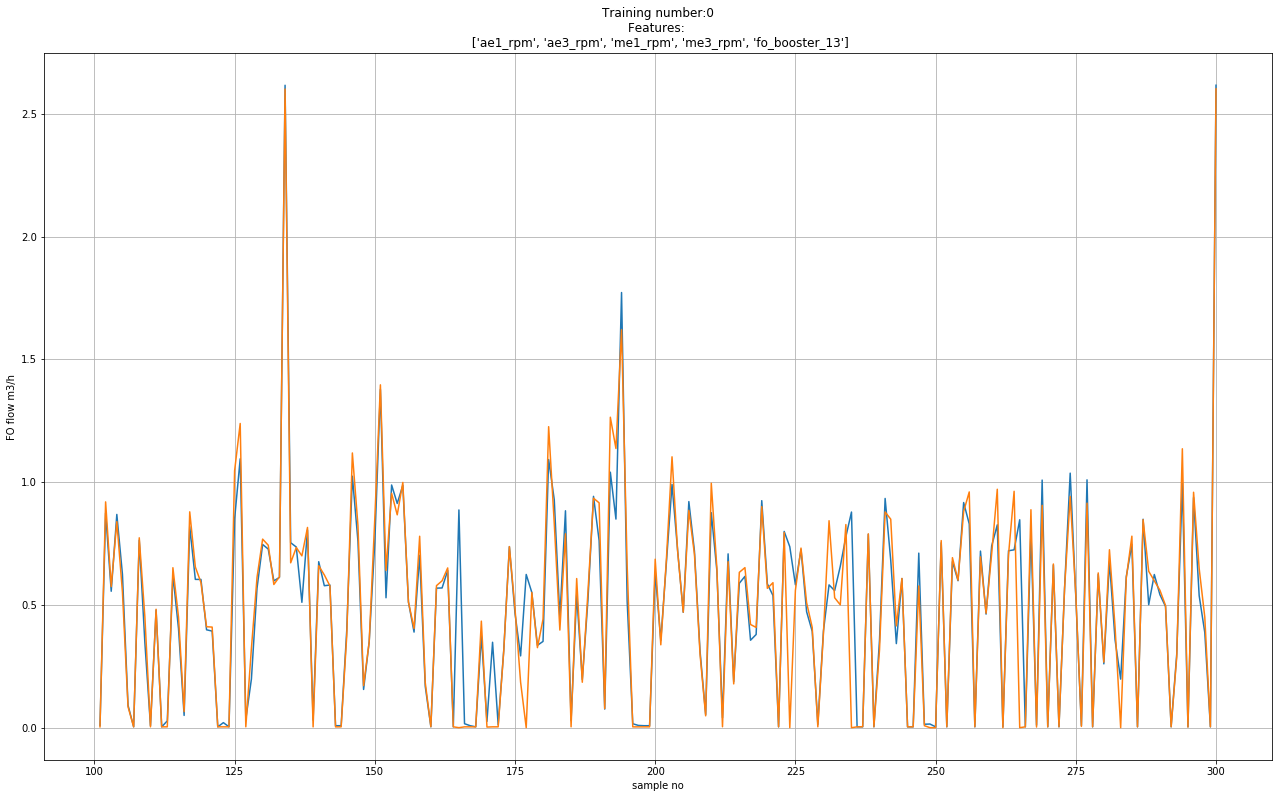

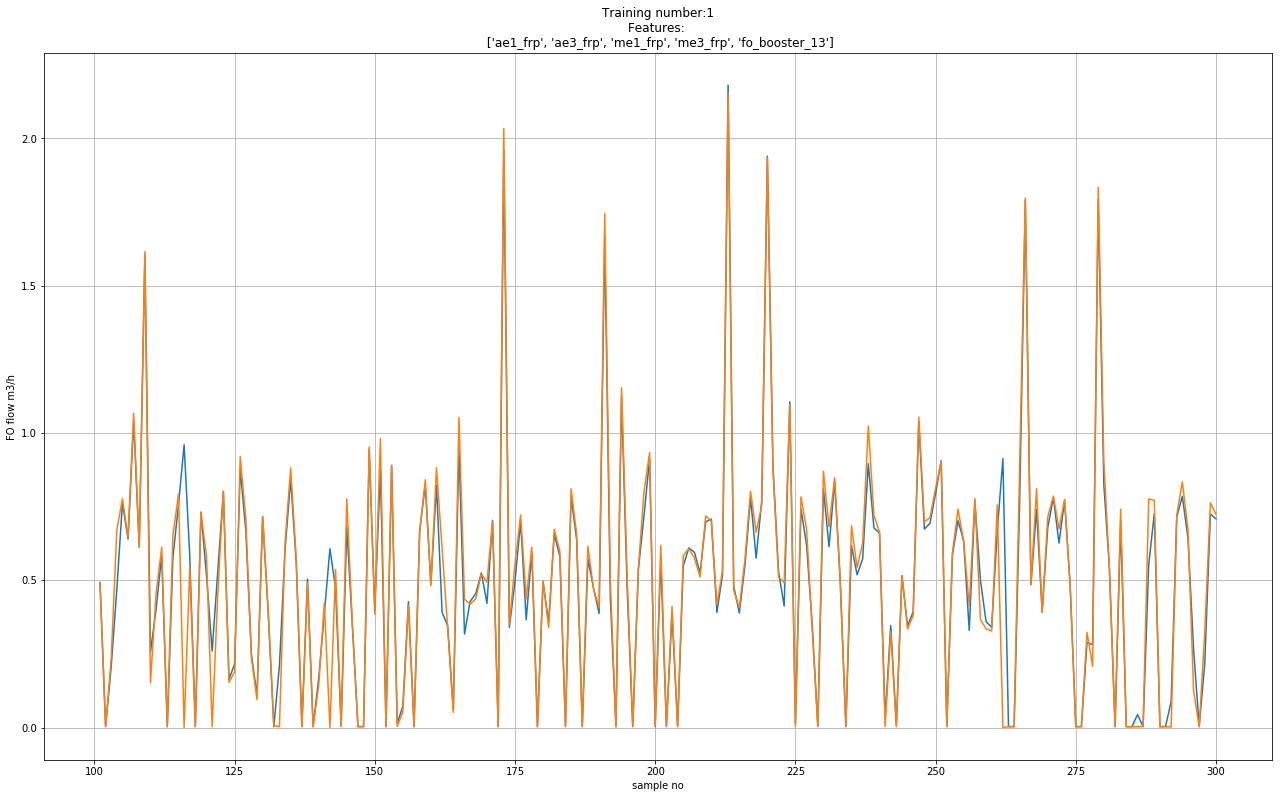

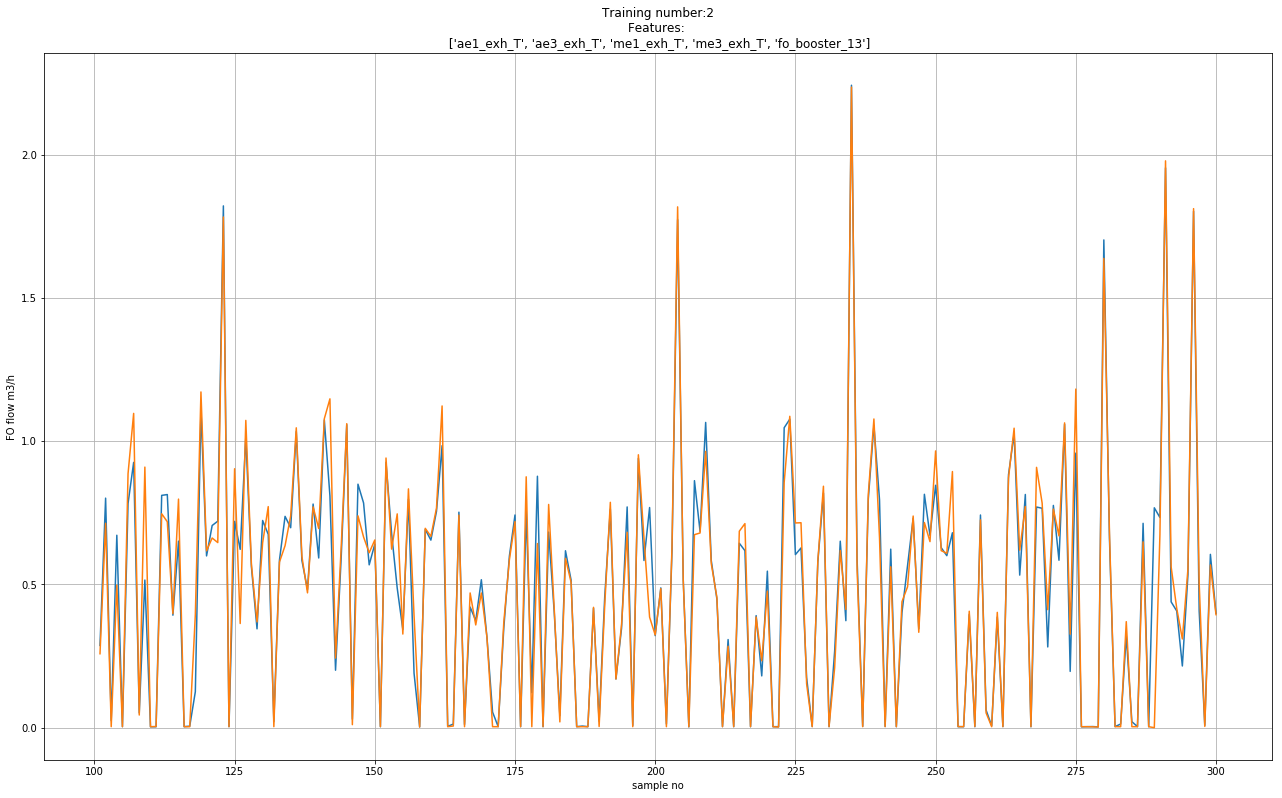

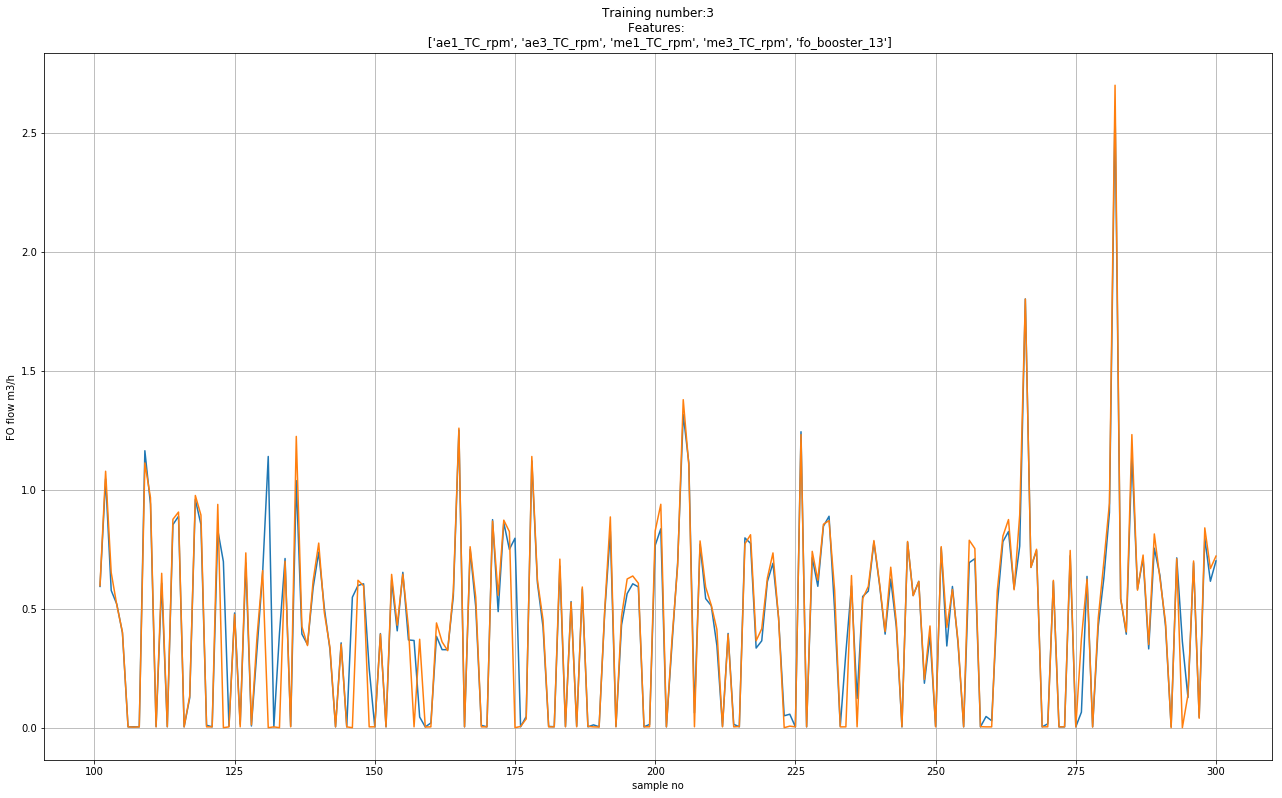

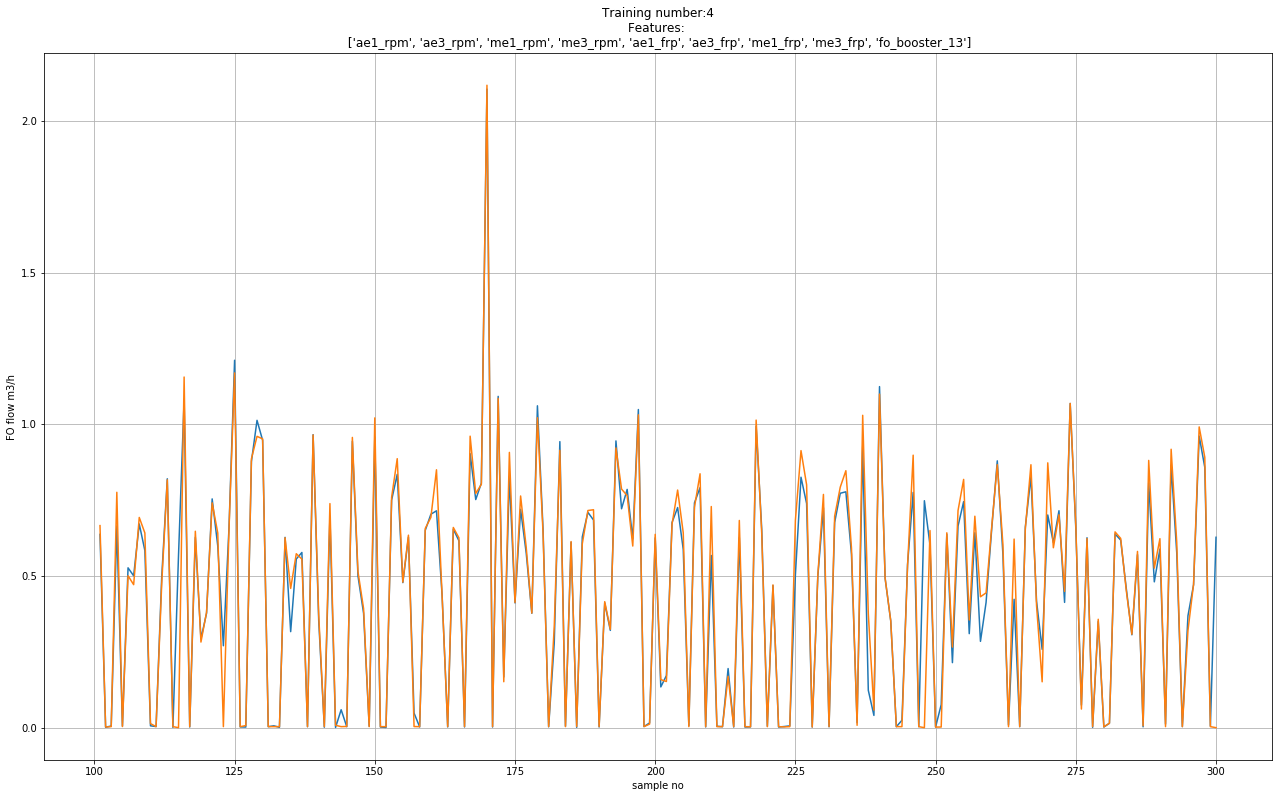

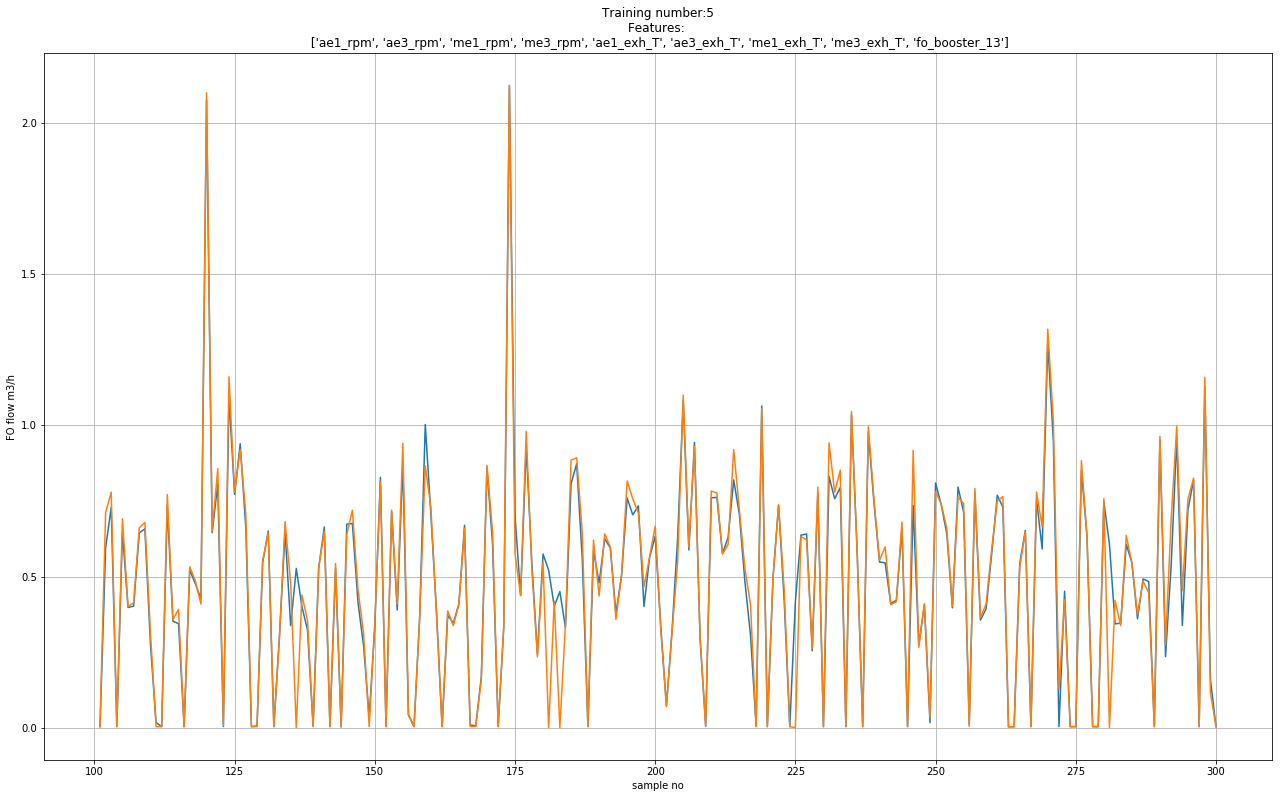

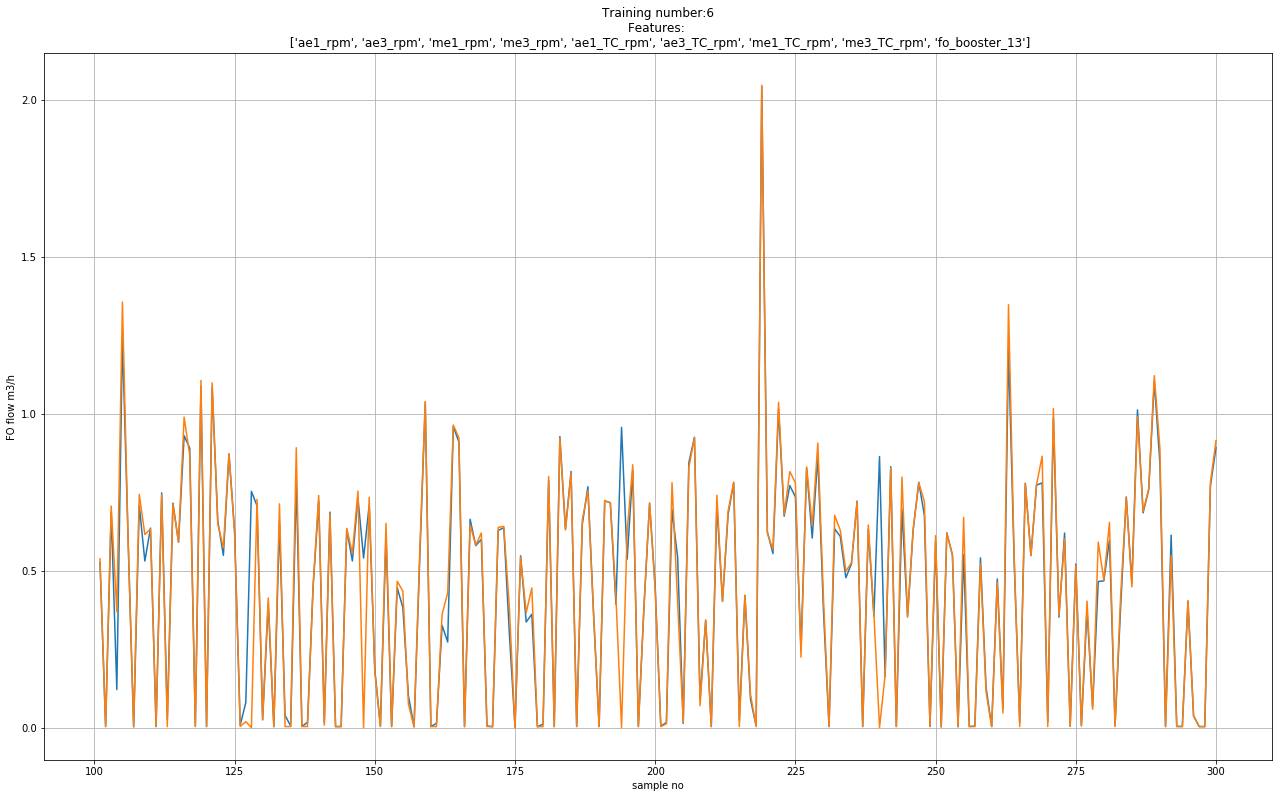

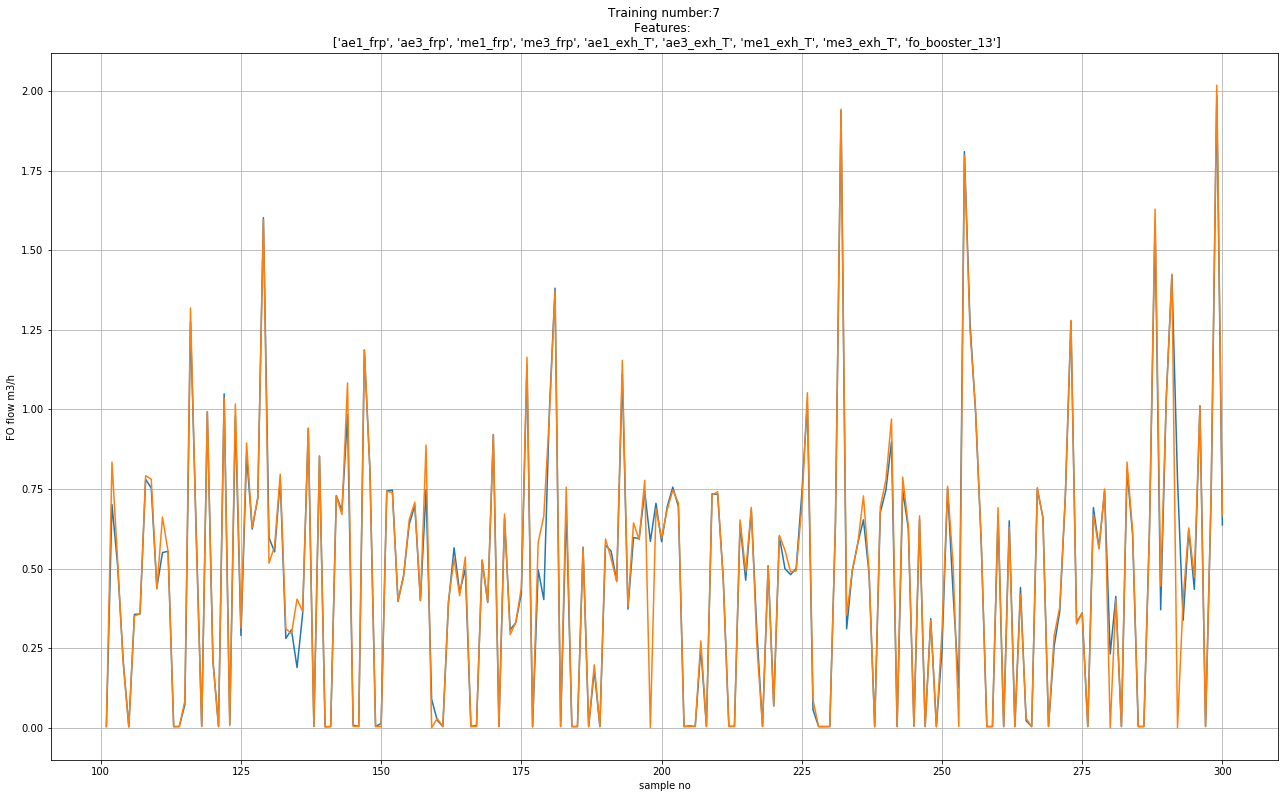

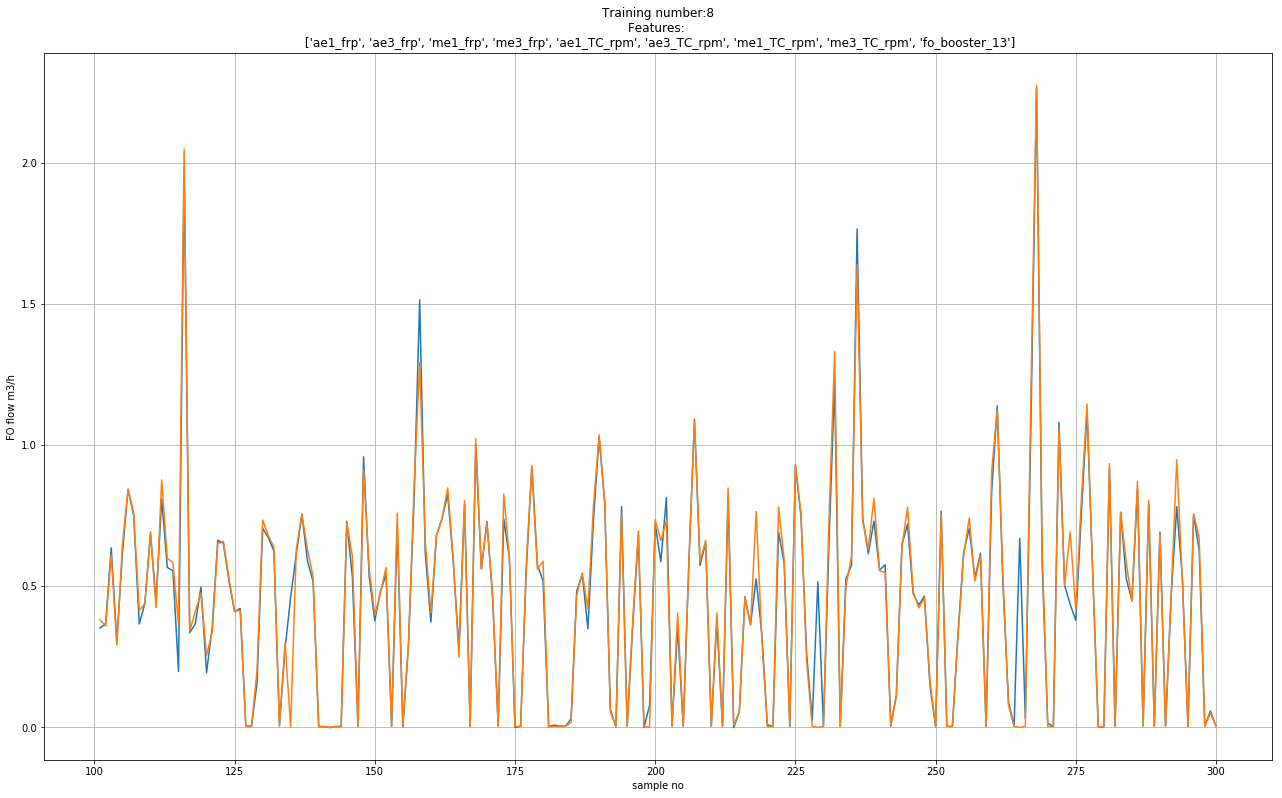

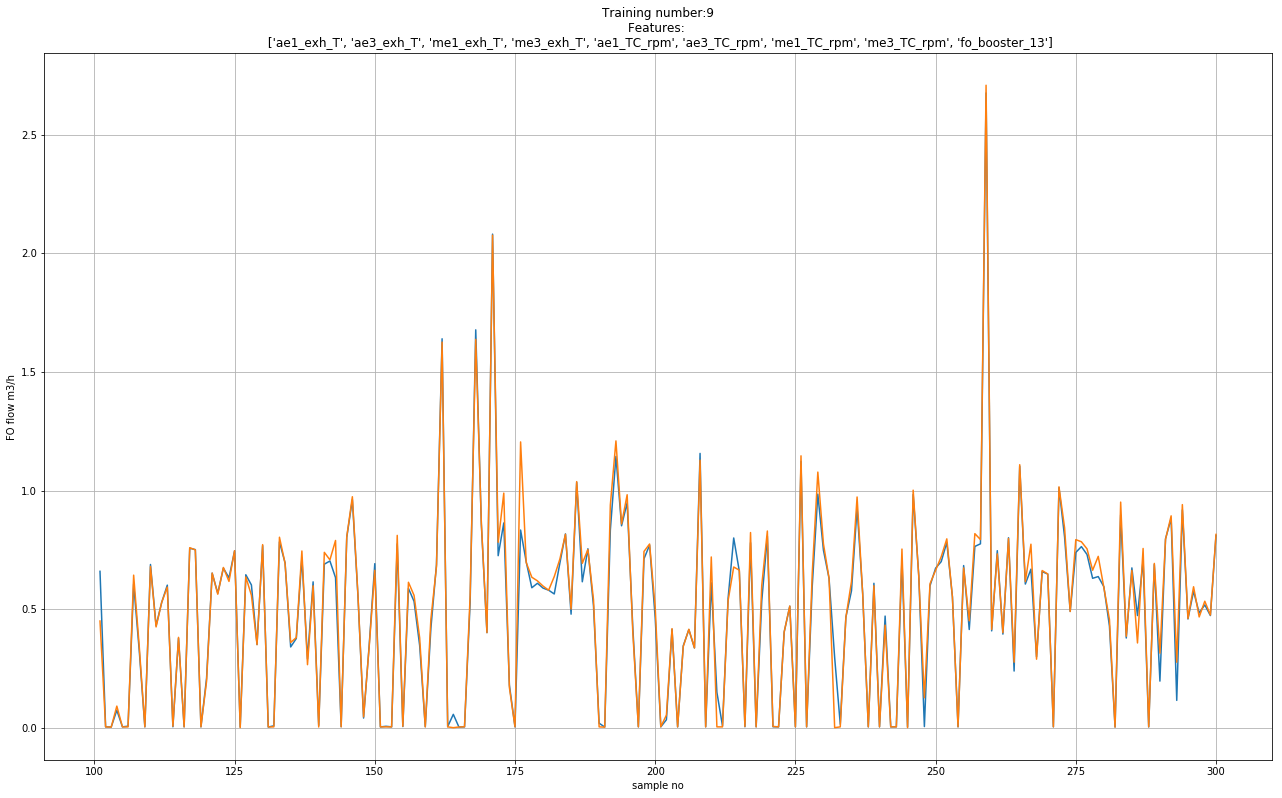

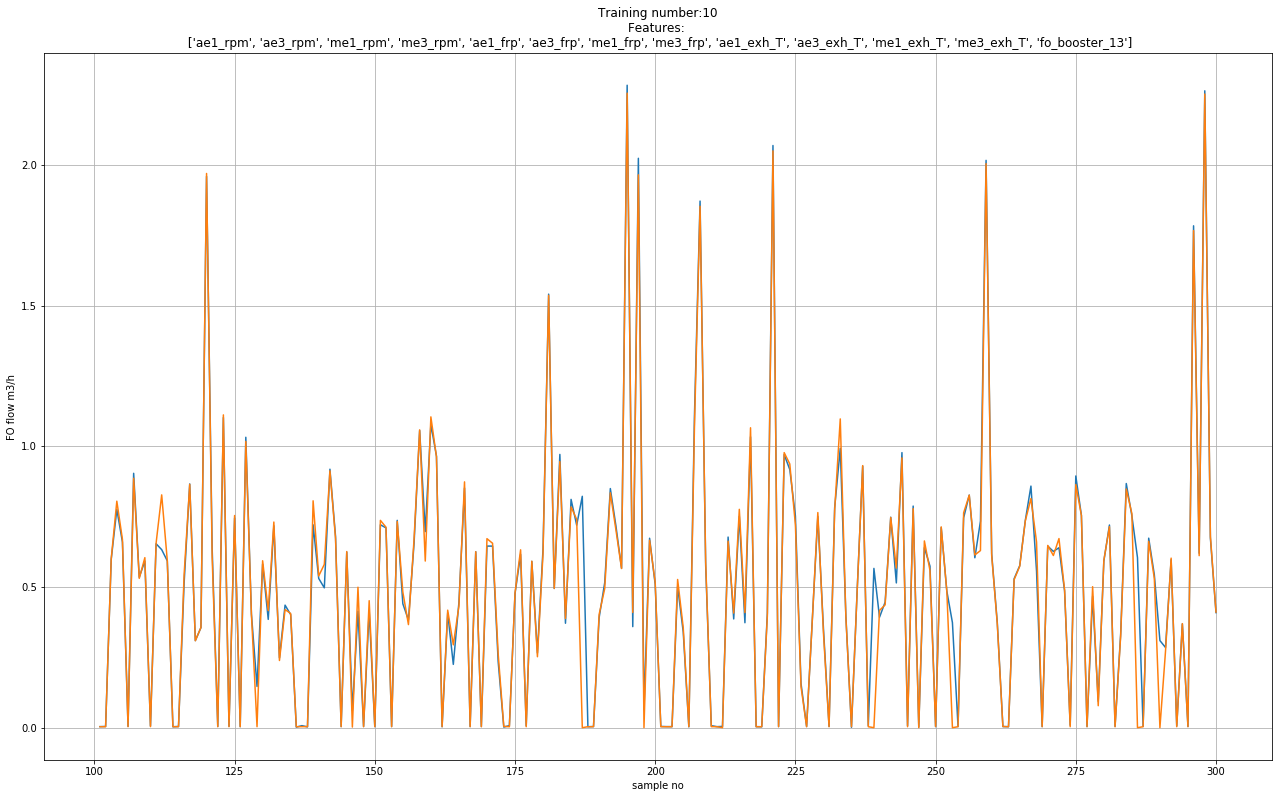

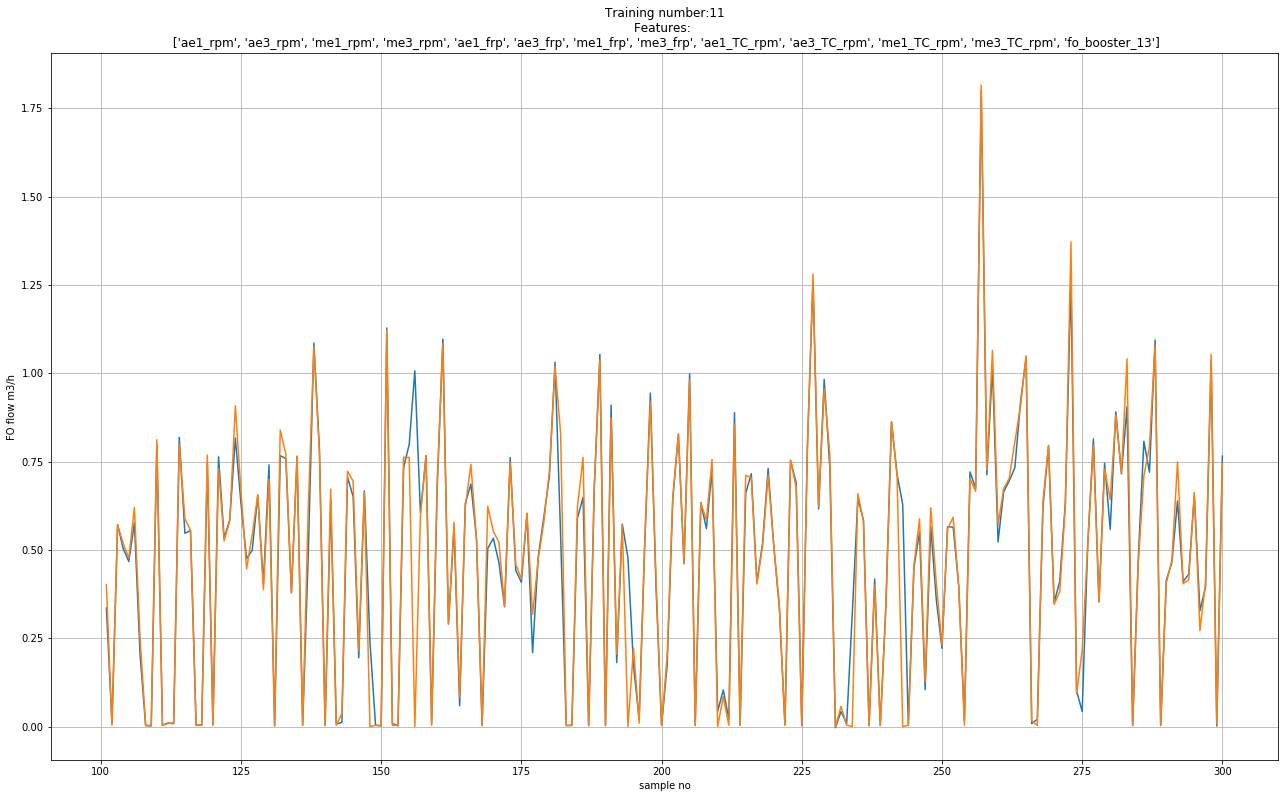

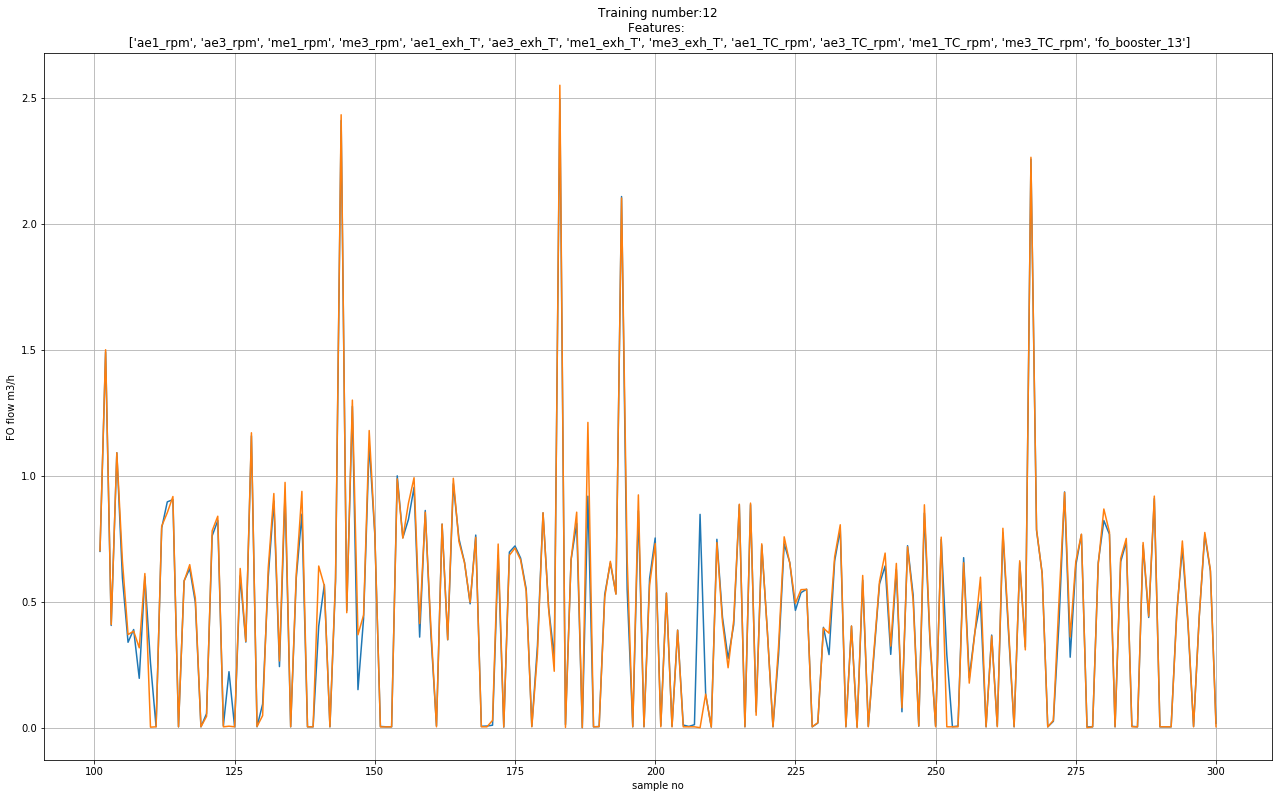

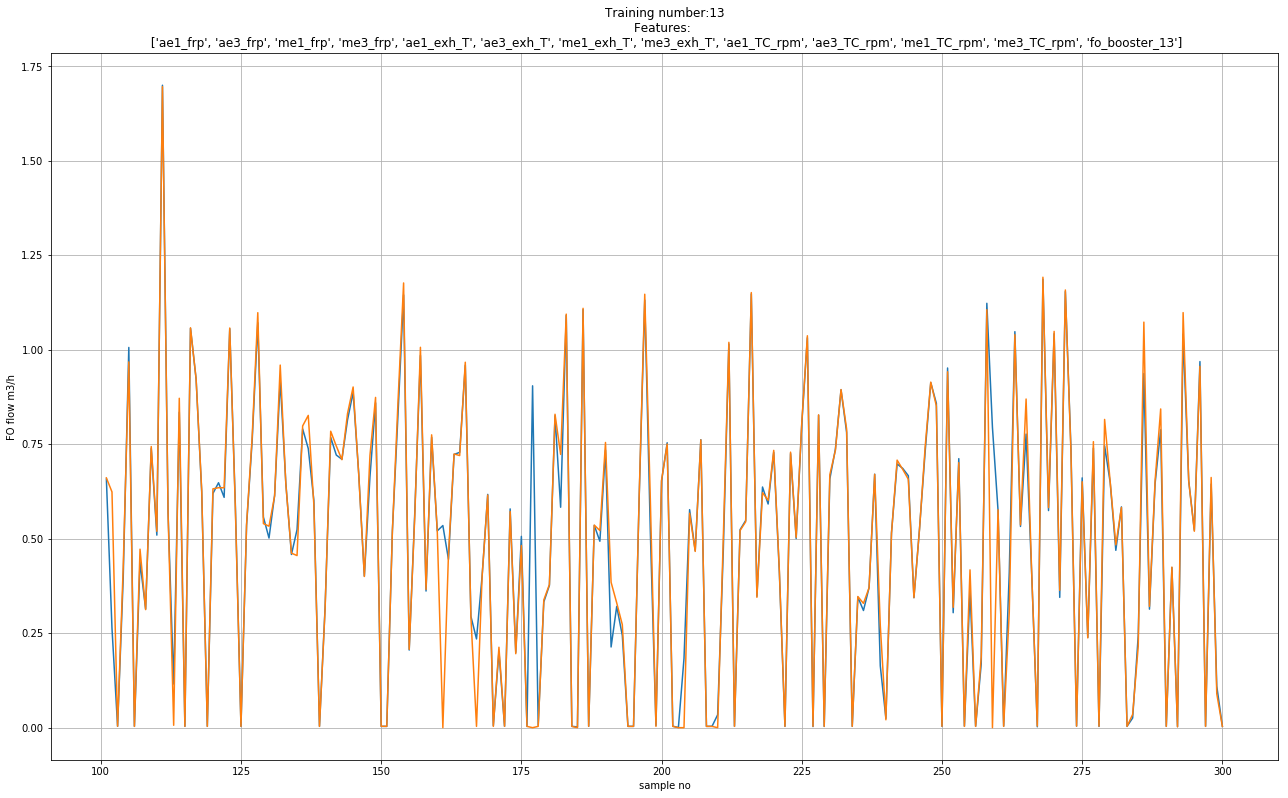

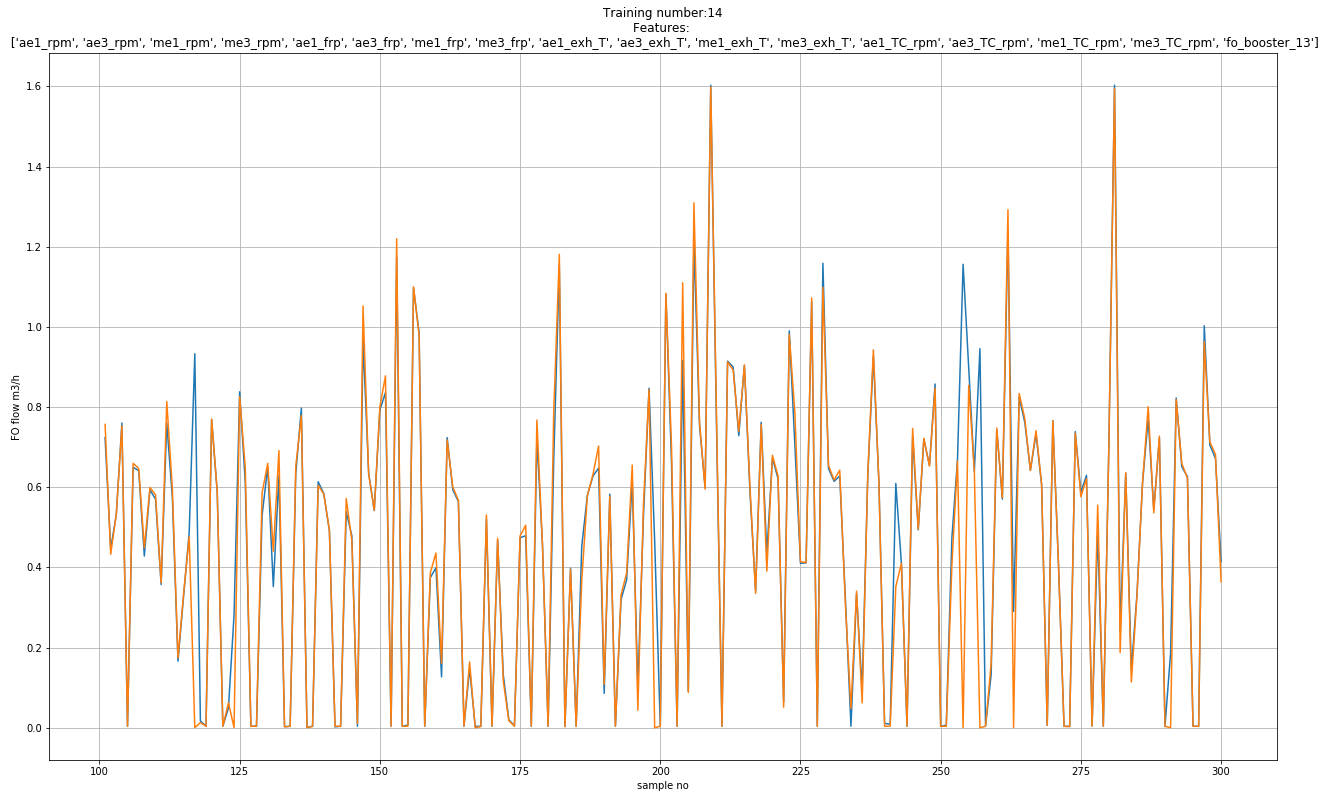

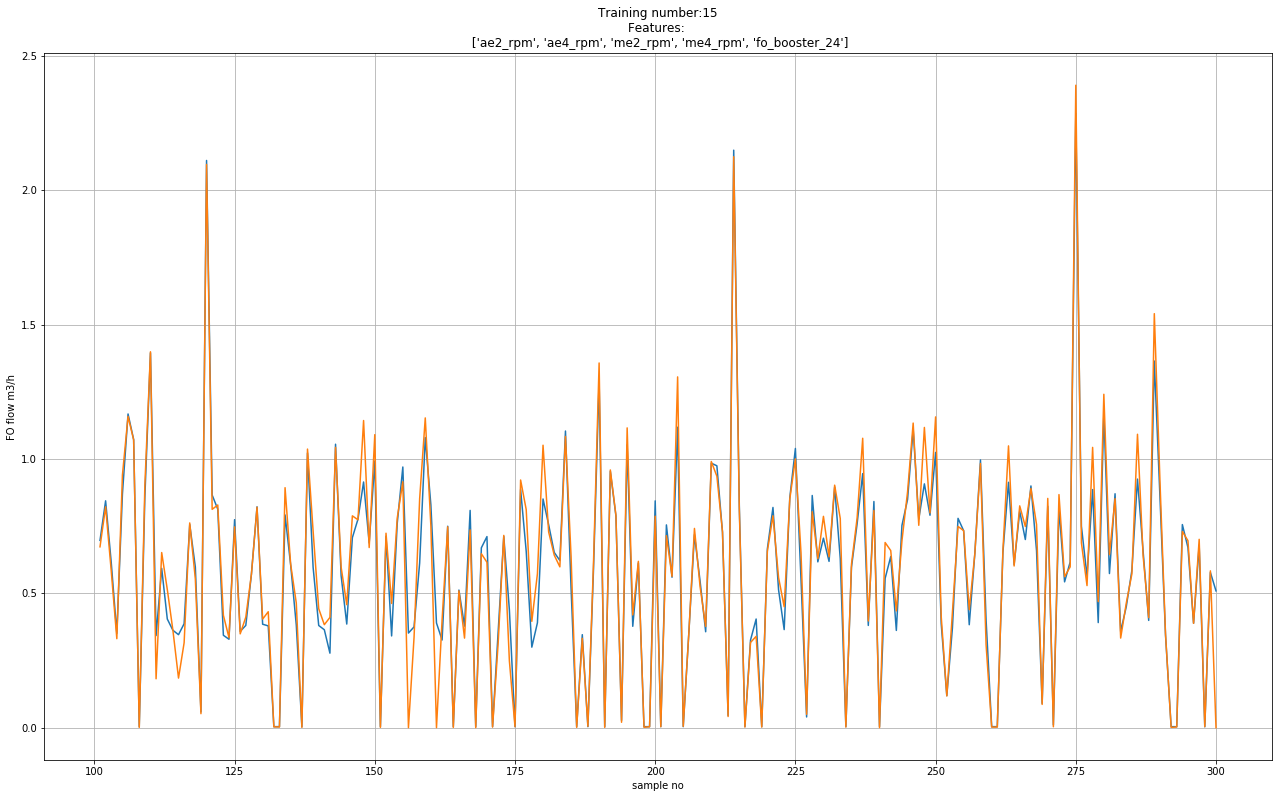

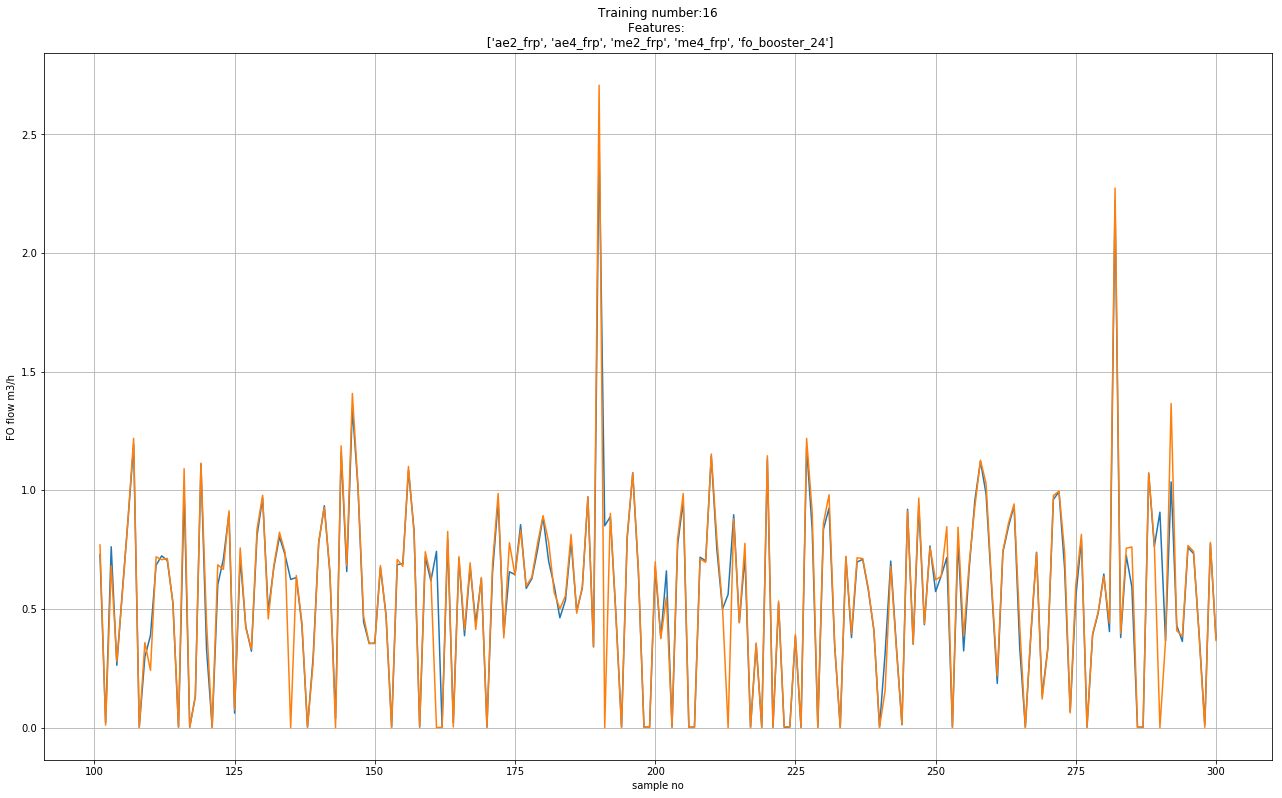

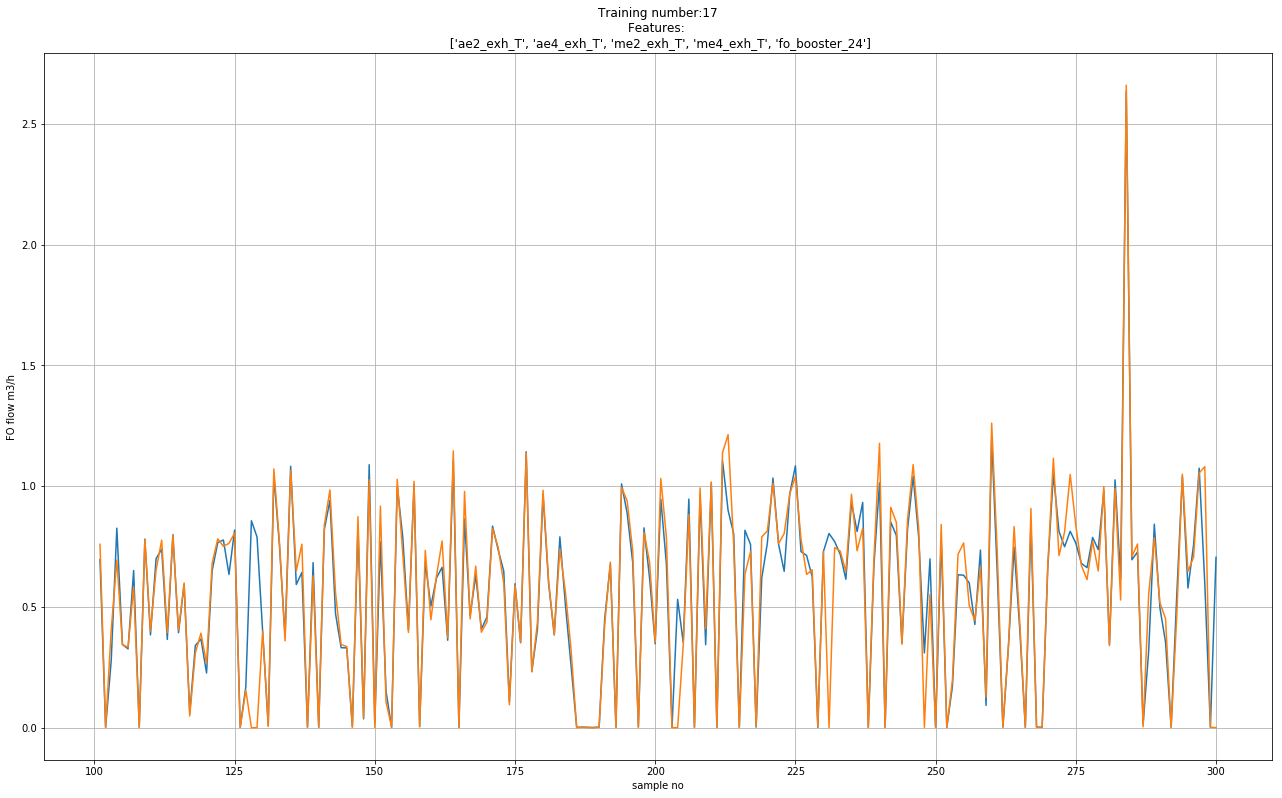

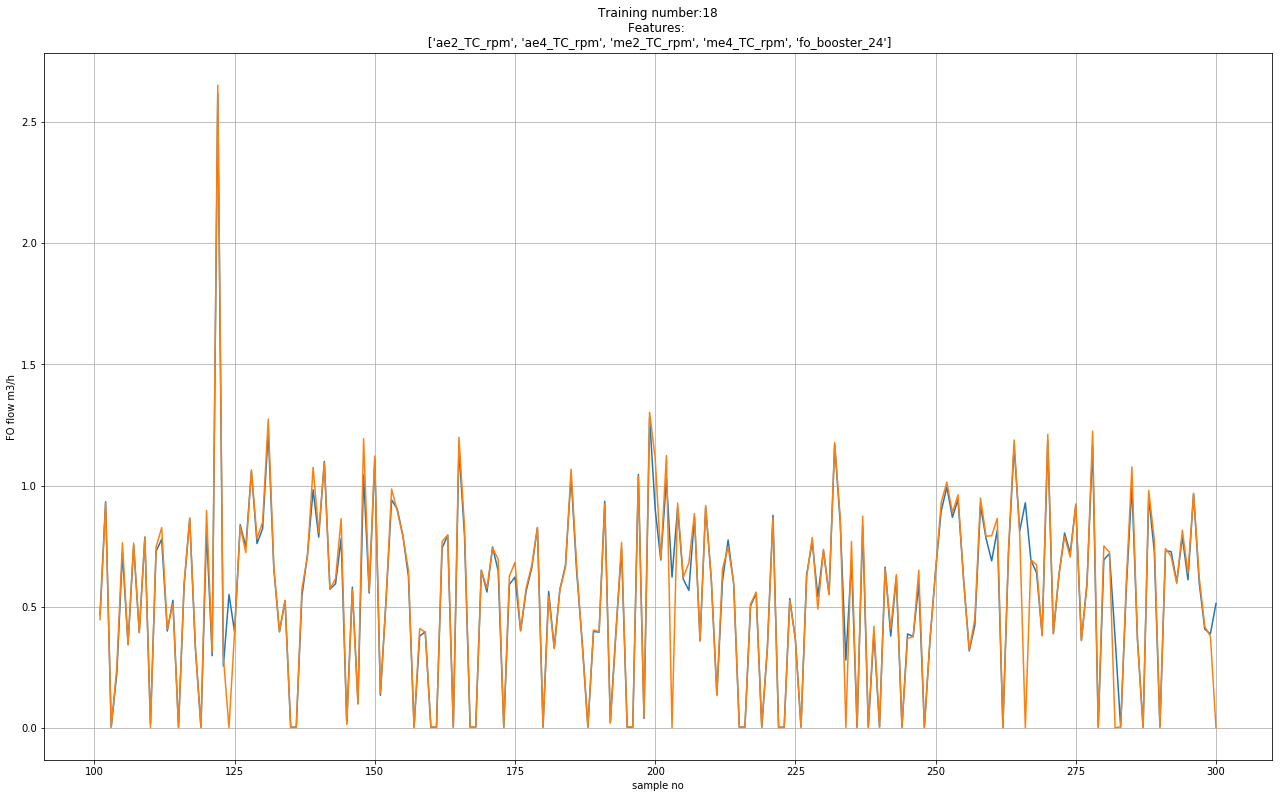

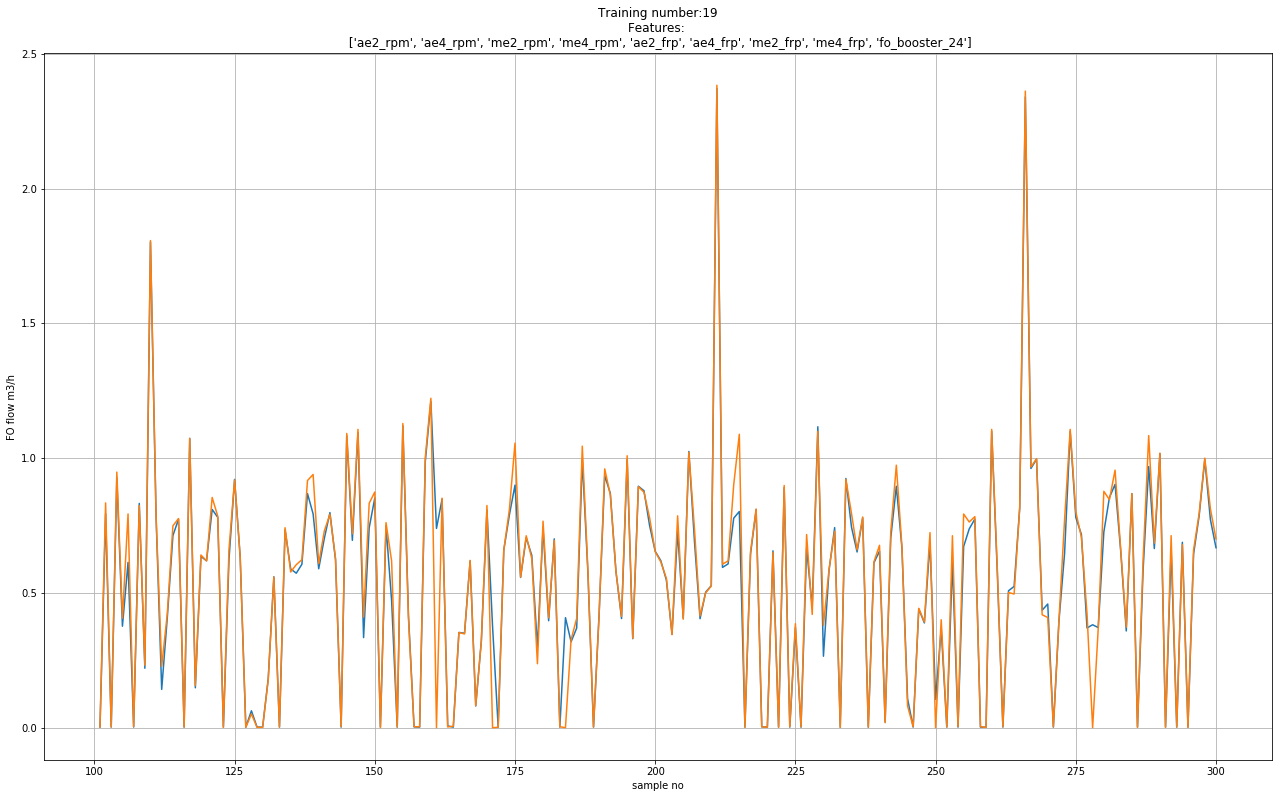

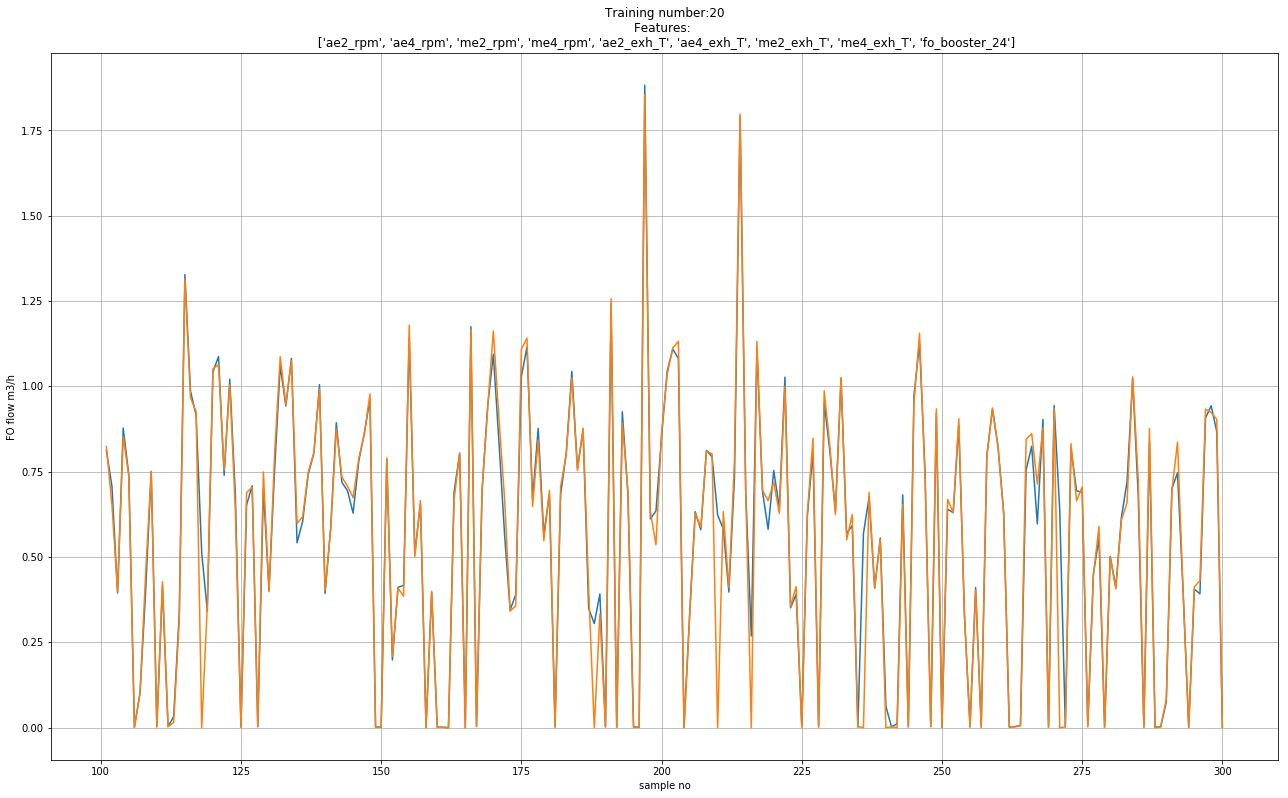

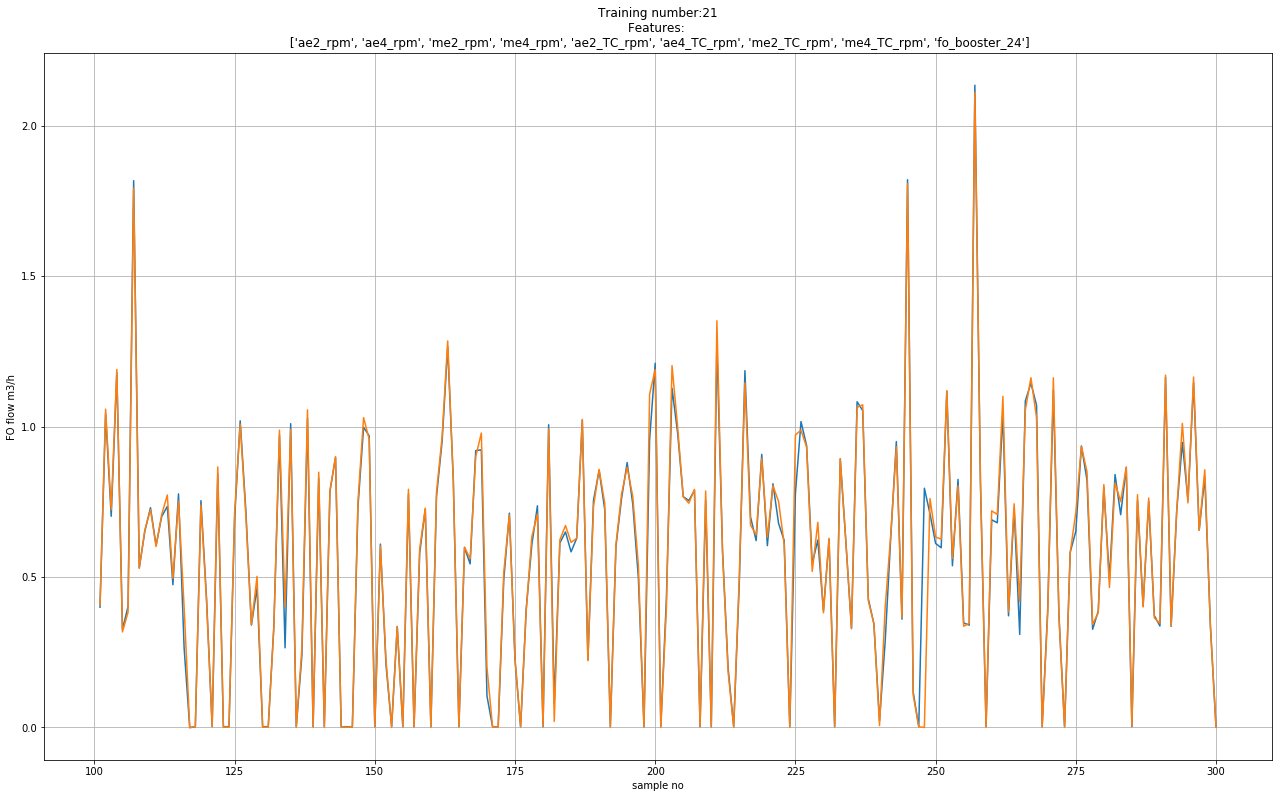

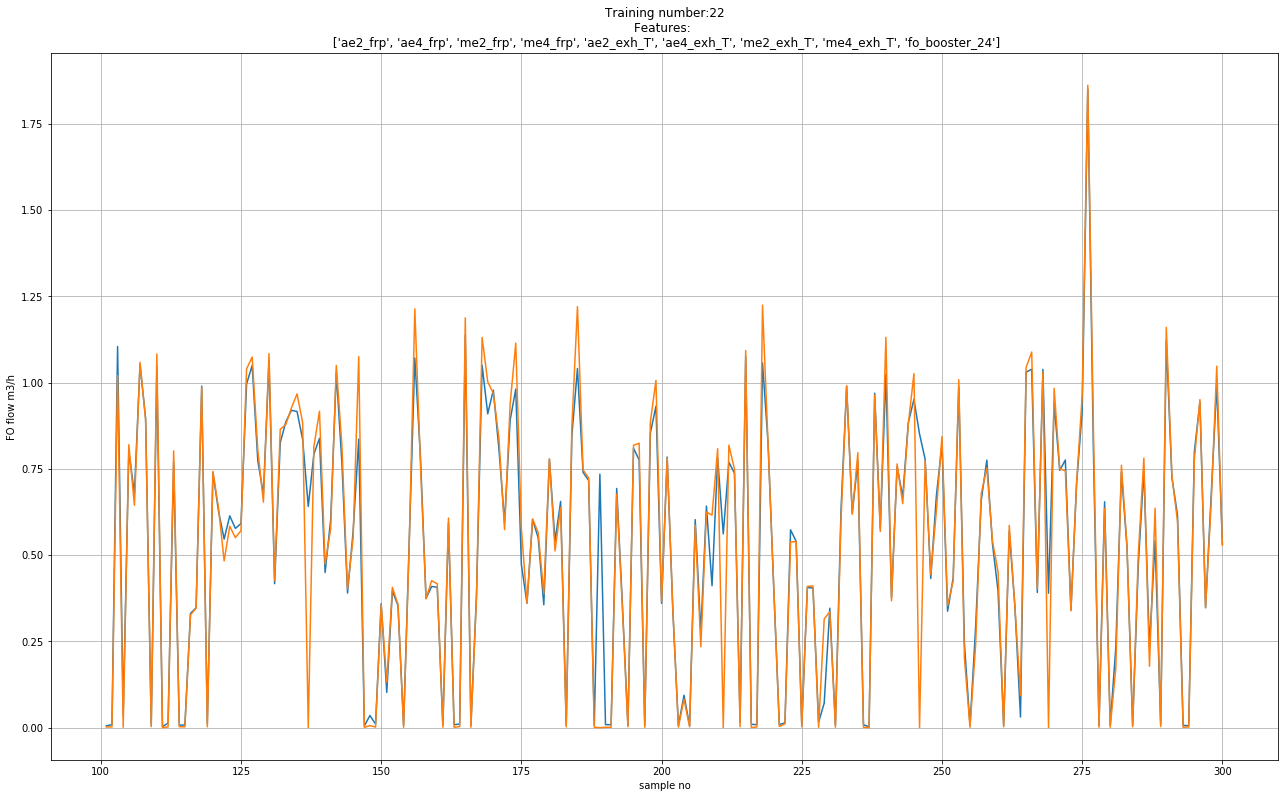

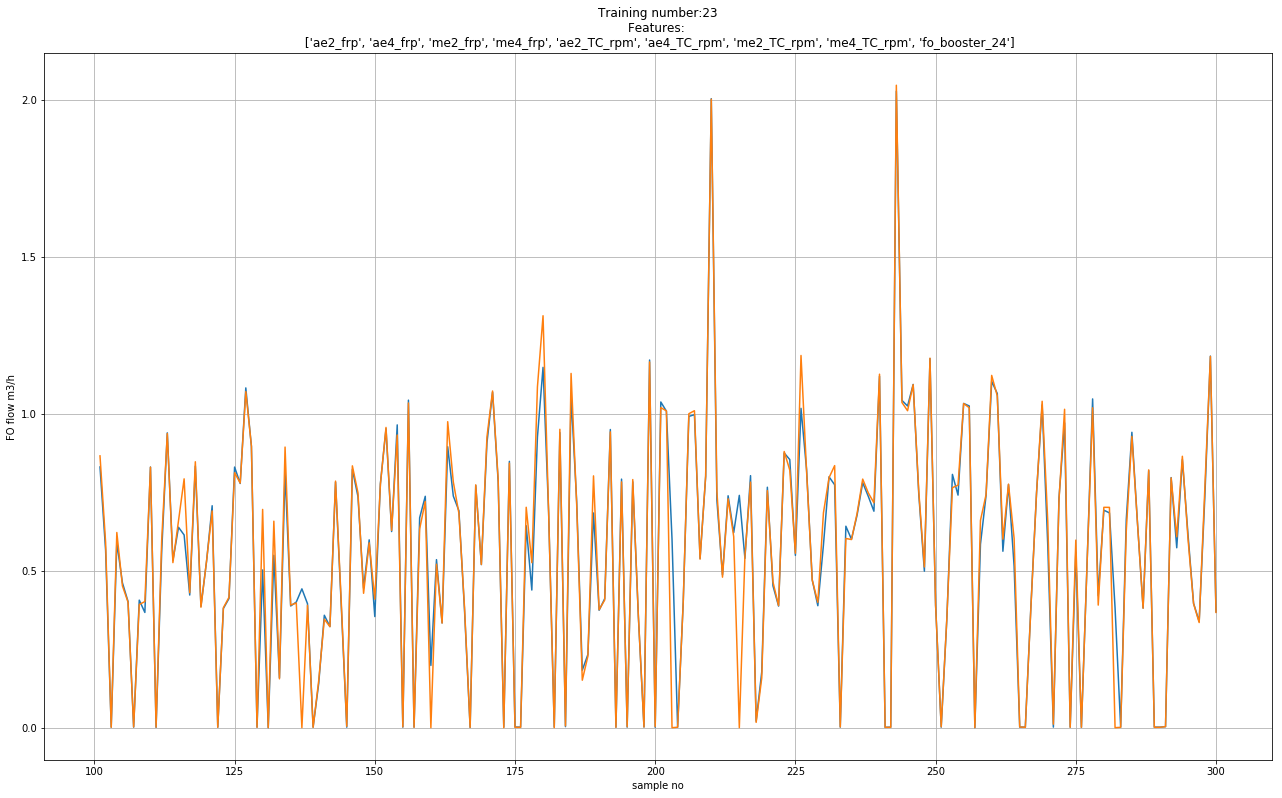

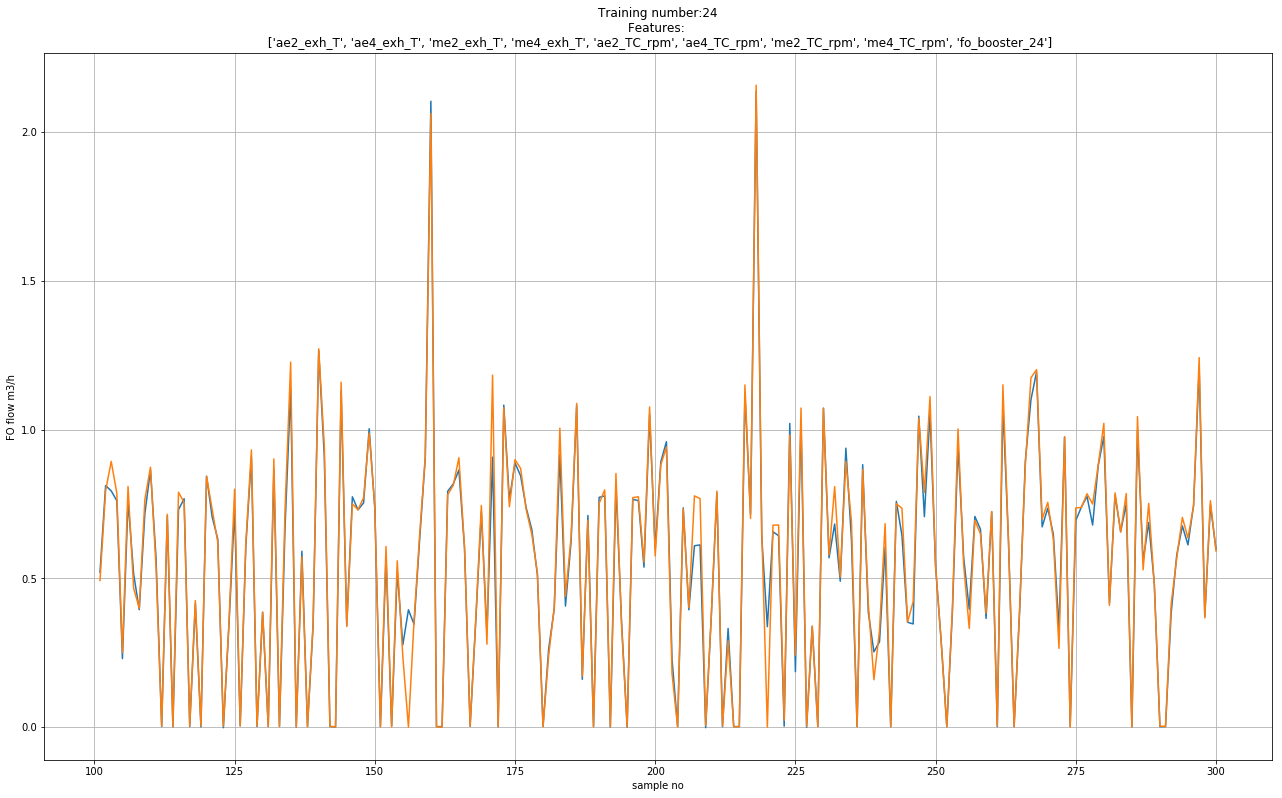

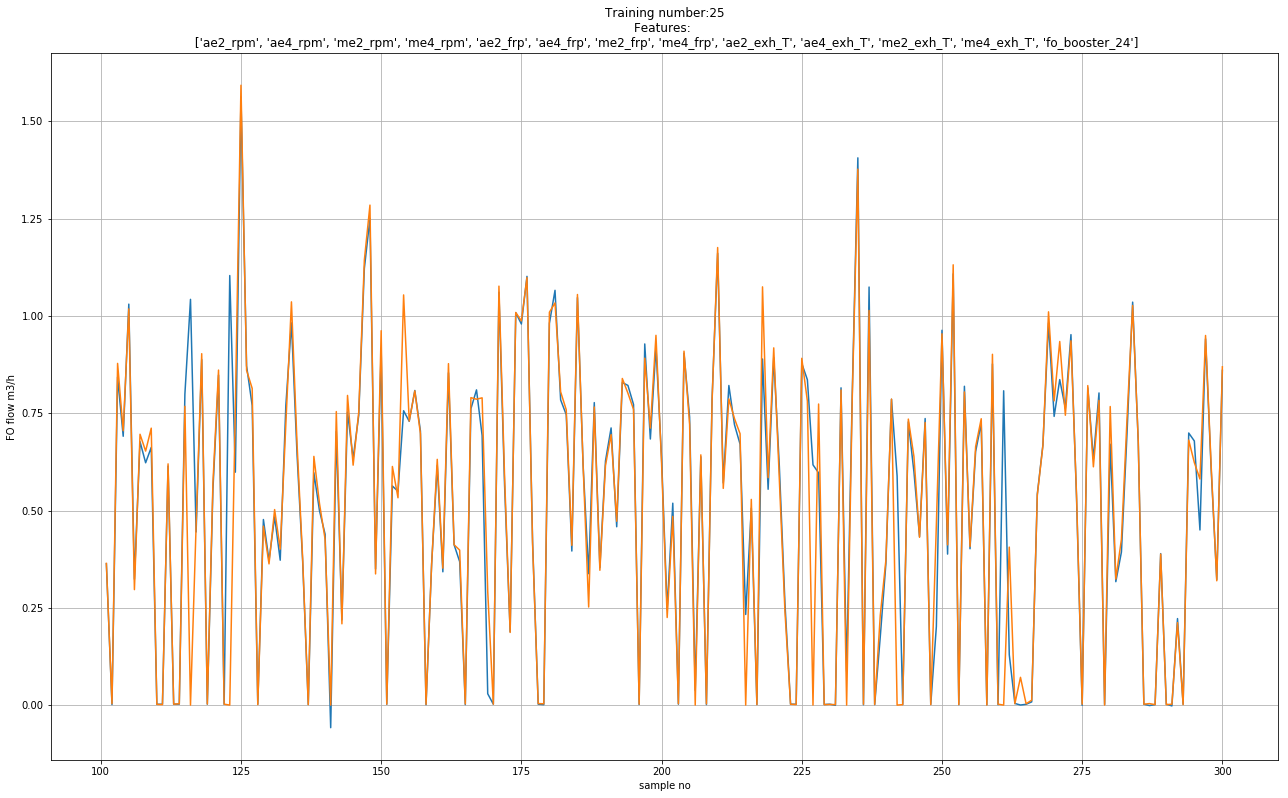

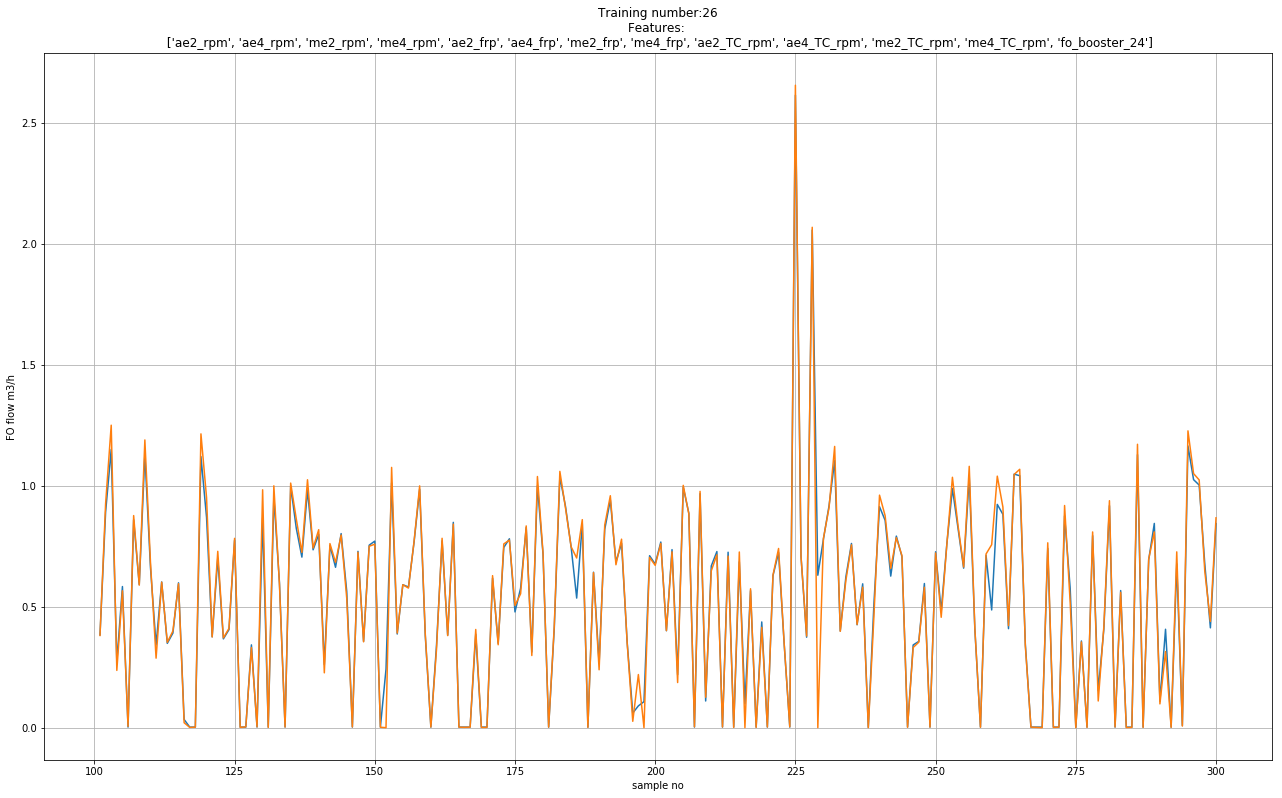

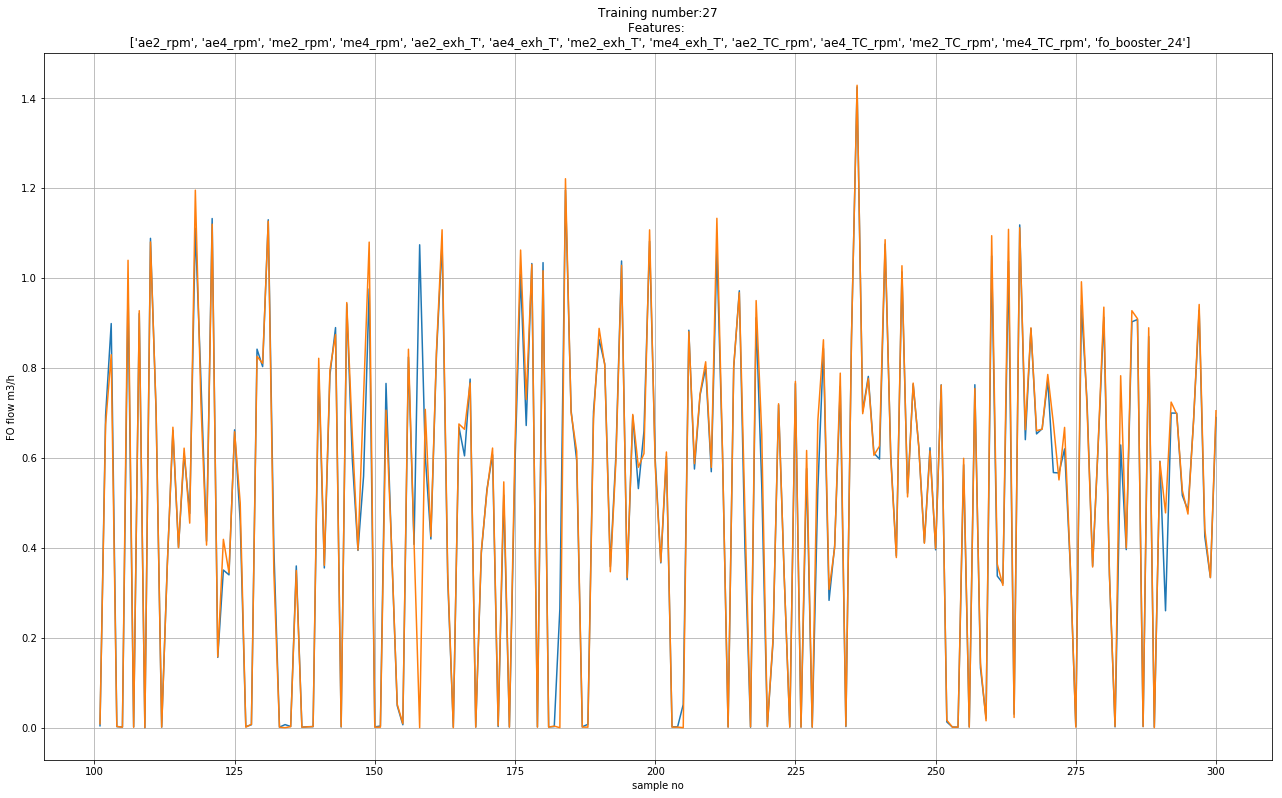

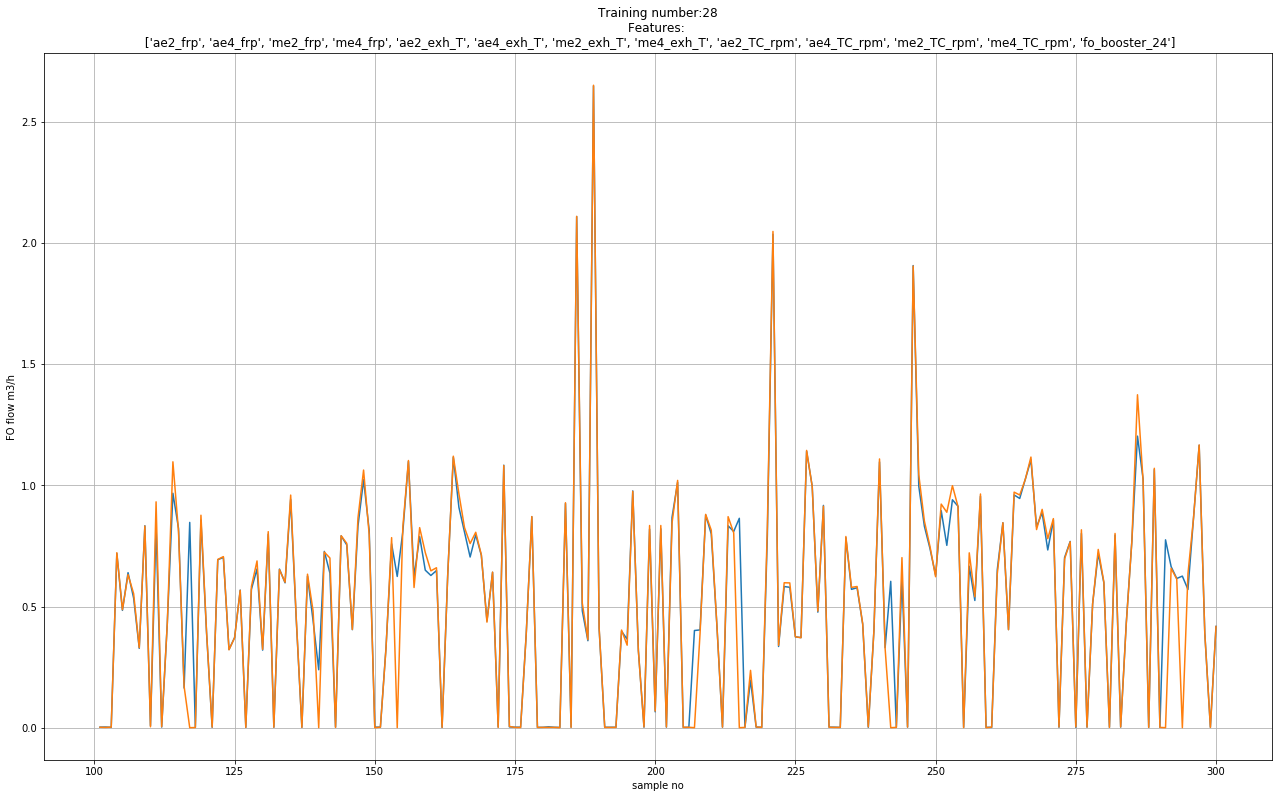

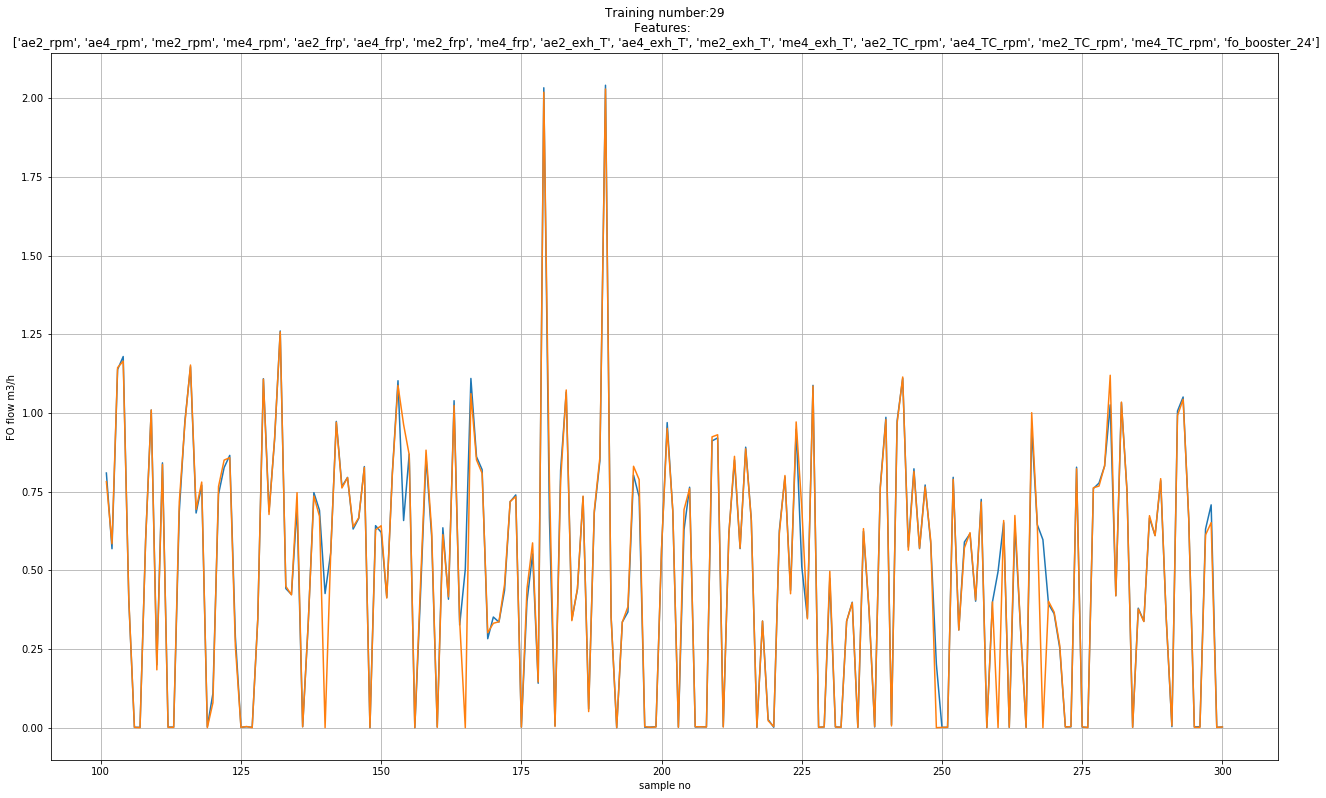

In [129]:
# Train model ... included in above.
# 

from sklearn.externals import joblib
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

gen = 1
cores = -1

# plotting setup

n1 = 100
sample_n = 200

seed = 42 # This is to get a reproduceability.




for test_no in range(len(test_features)):
    
    print('Test number: ', test_no, '\n')
    df_test = df[test_features[test_no]].dropna()
    X = np.array(df_test.drop(df_test.columns[len(df_test.columns)-1],axis=1))
    y = np.array(df_test[df_test.columns[len(df_test.columns)-1]])

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=seed)
    tpot = TPOTRegressor(generations=gen, population_size=50, verbosity=2, n_jobs=cores)
    tpot.fit(X_train, y_train.reshape(-1,))
    
    features_readable = list()
    for t in range(len(test_features[test_no])):
        features_readable.append(d[test_features[test_no][t]])

    x = linspace(n1+1,n1+sample_n,sample_n)
    fig, ax = plt.subplots()
    fig.set_size_inches(22, 13)
    plt.plot(x,tpot.predict(X_test)[n1:n1+sample_n])
    plt.plot(x,y_test[n1:n1+sample_n])

    ax.set(xlabel='sample no', ylabel='FO flow m3/h',
           title='Training number:' + str(test_no) + '\nFeatures: \n '+ str(features_readable))
    ax.grid()

    fig.savefig("results/test_no_" + str(test_no) + ".png")



Test number, linear model:  0 

0.800832052601


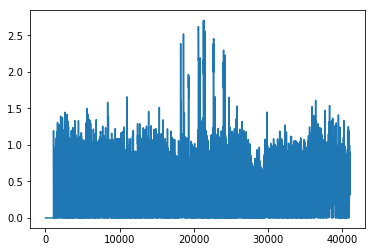

In [151]:
print('Test number, linear model: ', test_no, '\n')
test_no = 0
seed = 42

df_test = df[test_features[test_no]].dropna()
X = np.array(df_test.drop(df_test.columns[len(df_test.columns)-1],axis=1))
y = np.array(df_test[df_test.columns[len(df_test.columns)-1]])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=seed)

m_linear = sklearn.linear_model.LinearRegression(n_jobs=-1)
m_linear.fit(X_train, y_train.reshape(-1,))

print(m_linear.score(X_test,y_test))

#plt.plot(x,m_linear.predict(X)[n1:n1+sample_n])
#plt.plot(x,y[n1:n1+sample_n])
plt.plot(y)


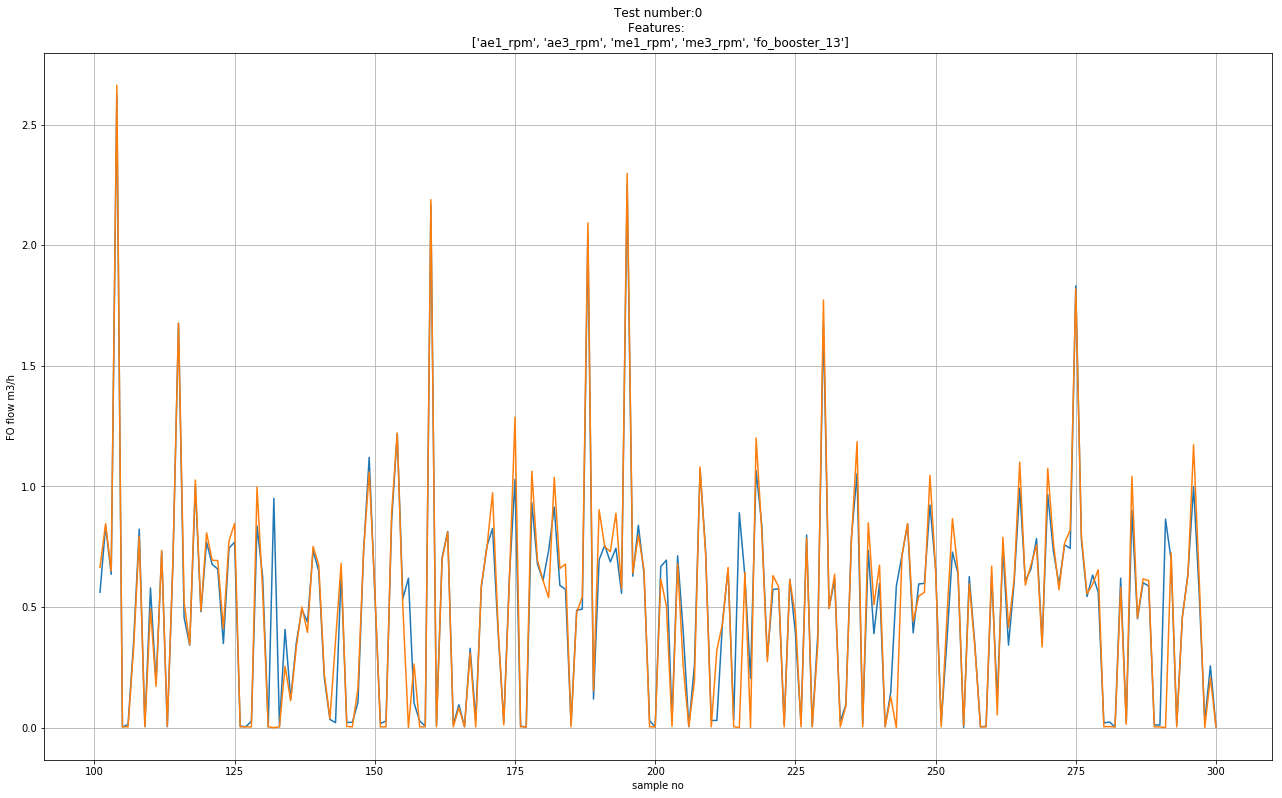

In [128]:
features_readable = list()
for t in range(len(test_features[test_no])):
    features_readable.append(d[test_features[test_no][t]])
    
x = linspace(n1+1,n1+sample_n,sample_n)
fig, ax = plt.subplots()
fig.set_size_inches(22, 13)
plt.plot(x,tpot.predict(X_test)[n1:n1+sample_n])
plt.plot(x,y_test[n1:n1+sample_n])

ax.set(xlabel='sample no', ylabel='FO flow m3/h',
       title='Training number:' + str(test_no) + '\nFeatures: \n '+ str(features_readable))
ax.grid()

fig.savefig("results/test_no_" + str(test_no) + ".png")

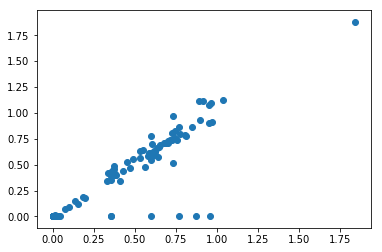

In [29]:
plt.scatter(tpot.predict(X_test)[100:200],y_test[100:200])

In [2]:
#More predictors

eng_13 = [d['ae1_rpm'],
          d['ae3_rpm'],
          d['me1_rpm'],
          d['me3_rpm'],
          d['ae1_frp'],
          d['ae3_frp'],
          d['me1_frp'],
          d['me3_frp'],
          d['ae1_exh_T'],
          d['ae3_exh_T'],
          d['me1_exh_T'],
          d['me3_exh_T'],
          d['fo_booster_13']
          ]

eng_24 = [d['ae2_rpm'],
          d['ae4_rpm'],
          d['me2_rpm'],
          d['me4_rpm'],
          d['ae2_frp'],
          d['ae4_frp'],
          d['me2_frp'],
          d['me4_frp'],
          d['ae2_exh_T'],
          d['ae4_exh_T'],
          d['me2_exh_T'],
          d['me4_exh_T'],
          d['fo_booster_24']
          ]

#%%

####
#### Training the first set with only rpm predictor
####

print('Features and predictions for training 2:\n\nEngine 1_3:')

for n in eng_13:
    print('- ',d[n])
print('\nEngine 2_4:')
for n in eng_24:
    print('- ',d[n])

print('\nDate: ',time.strftime('%y%m%d'))
print('Time: ',time.strftime('%H:%M:%S'))

Features and predictions for training 2:

Engine 1_3:
-  ae1_rpm
-  ae3_rpm
-  me1_rpm
-  me3_rpm
-  ae1_frp
-  ae3_frp
-  me1_frp
-  me3_frp
-  ae1_exh_T
-  ae3_exh_T
-  me1_exh_T
-  me3_exh_T
-  fo_booster_13

Engine 2_4:
-  ae2_rpm
-  ae4_rpm
-  me2_rpm
-  me4_rpm
-  ae2_frp
-  ae4_frp
-  me2_frp
-  me4_frp
-  ae2_exh_T
-  ae4_exh_T
-  me2_exh_T
-  me4_exh_T
-  fo_booster_24

Date:  180125
Time:  09:13:59


In [37]:

# We do not have the full time extent for the dataset, so we have to filter out.

date_begin = '2014-02-01'
date_end = '2014-12-16'


# The dataset is not complete overlapping in time with data from both the mass-flow meters and the
# the rest of the data. So we have to manually filter out the time interval which we are interested in.

    
#df_1_3[labels_1_3].plot()
#df_2_4[labels_2_4].plot()

df_1_3 = df[eng_13][date_begin:date_end].dropna()
df_2_4 = df[eng_24][date_begin:date_end].dropna()

for n in list(df_1_3):
    df_1_3[n][(df_1_3[n] < 0)] = 0

for n in list(df_2_4):
    df_2_4[n][(df_2_4[n] < 0)] = 0

In [38]:
# Train model
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

gen = 10
cores = -1

X = np.array(df_1_3.drop(labels=d['fo_booster_13'],axis=1))
y = np.array(df_1_3[d['fo_booster_13']])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)
tpot = TPOTRegressor(generations=gen, population_size=50, verbosity=2, n_jobs=cores)
tpot.fit(X_train, y_train.reshape(-1,))

Optimization Progress:  18%|█▊        | 100/550 [05:14<5:02:37, 40.35s/pipeline]

Generation 1 - Current best internal CV score: -0.0005150505377516242


Optimization Progress:  27%|██▋       | 150/550 [09:57<5:24:32, 48.68s/pipeline]

Generation 2 - Current best internal CV score: -0.0005150505377516242


Optimization Progress:  36%|███▋      | 200/550 [12:48<3:35:31, 36.95s/pipeline]

Generation 3 - Current best internal CV score: -0.0005025807327483556


Optimization Progress:  46%|████▌     | 251/550 [19:56<7:07:28, 85.78s/pipeline]  

Generation 4 - Current best internal CV score: -0.0004433178864024472


Optimization Progress:  55%|█████▌    | 303/550 [28:27<7:34:18, 110.36s/pipeline] 

Generation 5 - Current best internal CV score: -0.00043688187079889043


Optimization Progress:  64%|██████▍   | 353/550 [36:09<2:53:03, 52.71s/pipeline] 

Generation 6 - Current best internal CV score: -0.00043688187079889043


Optimization Progress:  73%|███████▎  | 404/550 [44:58<3:35:34, 88.59s/pipeline] 

Generation 7 - Current best internal CV score: -0.0004313508248079838


Optimization Progress:  83%|████████▎ | 454/550 [51:49<2:22:30, 89.07s/pipeline] 

Generation 8 - Current best internal CV score: -0.0004223173374471396


Optimization Progress:  92%|█████████▏| 504/550 [1:00:36<41:14, 53.79s/pipeline]

Generation 9 - Current best internal CV score: -0.0004223173374471396


Generation 10 - Current best internal CV score: -0.0004122473363683386

Best pipeline: RandomForestRegressor(ExtraTreesRegressor(ElasticNetCV(RidgeCV(RobustScaler(input_matrix)), l1_ratio=0.75, tol=1e-05), bootstrap=False, max_features=0.95, min_samples_leaf=1, min_samples_split=7, n_estimators=100), bootstrap=False, max_features=0.25, min_samples_leaf=1, min_samples_split=9, n_estimators=100)


TPOTRegressor(config_dict={'sklearn.linear_model.ElasticNetCV': {'l1_ratio': array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ]), 'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1]}, 'sklearn.ensemble.ExtraT....45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
        0.95,  1.  ])}}}},
       crossover_rate=0.1, cv=5, disable_update_check=False,
       early_stop=None, generations=10, max_eval_time_mins=5,
       max_time_mins=None, memory=None, mutation_rate=0.9, n_jobs=8,
       offspring_size=50, periodic_checkpoint_folder=None,
       population_size=50, random_state=None, scoring=None, subsample=1.0,
       verbosity=2, warm_start=False)

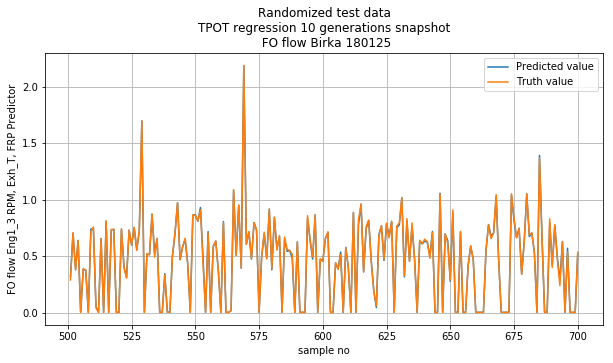

In [41]:

n1 = 500
sample_n = 200
x = linspace(n1+1,n1+sample_n,sample_n)

fig, ax = plt.subplots()

fig.set_size_inches(10, 5)

plt.plot(x,tpot.predict(X_test)[n1:n1+sample_n],label='Predicted value')
plt.plot(x,y_test[n1:n1+sample_n],label='Truth value')

ax.set(xlabel='sample no', ylabel='FO flow Eng1_3 RPM, Exh_T, FRP Predictor',
       title='Randomized test data\nTPOT regression 10 generations snapshot\n FO flow Birka 180125')
ax.grid()

plt.legend()

fig.savefig("tpot_eng13_rpm_exh_t_frp_pred_10gen.png",dpi=300)
plt.show()

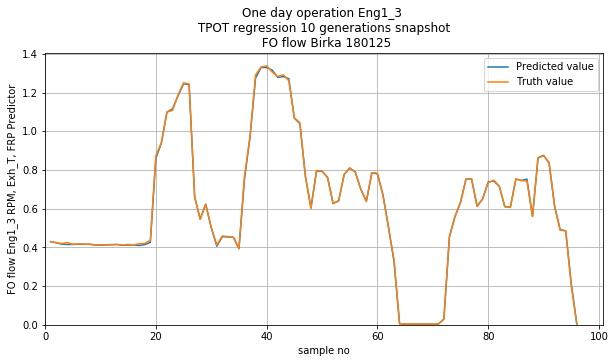

In [50]:

#Not randomized data. During a full day of operation.

n1 = 0
sample_n = 96
x = linspace(n1+1,n1+sample_n,sample_n)

fig, ax = plt.subplots()

fig.set_size_inches(10, 5)

plt.plot(x,tpot.predict(X)[n1:n1+sample_n],label='Predicted value')
plt.plot(x,y[n1:n1+sample_n],label='Truth value')

ax.set(xlabel='sample no', ylabel='FO flow Eng1_3 RPM, Exh_T, FRP Predictor',
       title='One day operation Eng1_3 \n TPOT regression 10 generations snapshot \n FO flow Birka 180125')
ax.grid()

plt.xlim(0)
plt.ylim(0)

plt.legend()

fig.savefig("tpot_eng13_op-data-rpm_exh_t_frp_pred_10gen.png",dpi=400)
plt.show()

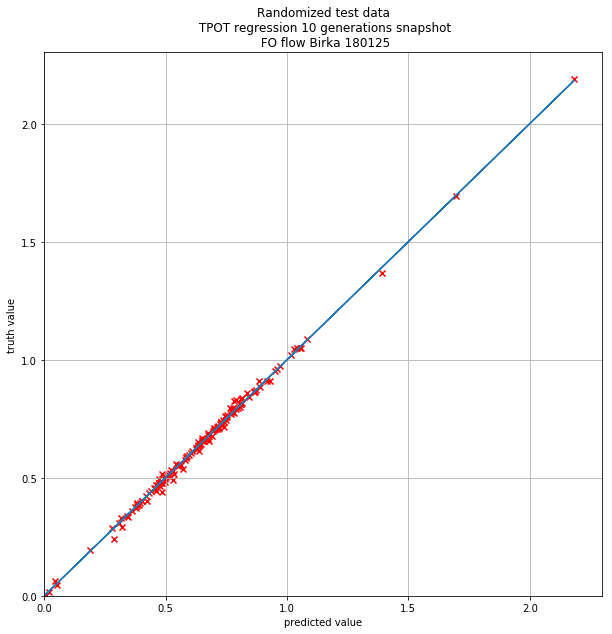

In [43]:

n1 = 500
sample_n = 200
x = linspace(n1+1,n1+sample_n,sample_n)

fig, ax = plt.subplots()

fig.set_size_inches(10, 10)

plt.scatter(tpot.predict(X_test)[n1:n1+sample_n],y_test[n1:n1+sample_n],color='r',marker='x')
plt.plot(tpot.predict(X_test)[n1:n1+sample_n],tpot.predict(X_test)[n1:n1+sample_n])

#plt.scatter(n1,n1+sample_n)

ax.set(xlabel='predicted value', ylabel='truth value',
       title='Randomized test data\n TPOT regression 10 generations snapshot\n FO flow Birka 180125')
ax.grid()

#plt.legend()
plt.xlim(0)
plt.ylim(0)

fig.savefig("tpot_eng13_scatter_rpm_exh_t_frp_pred_10gen.png",dpi=300)
plt.show()

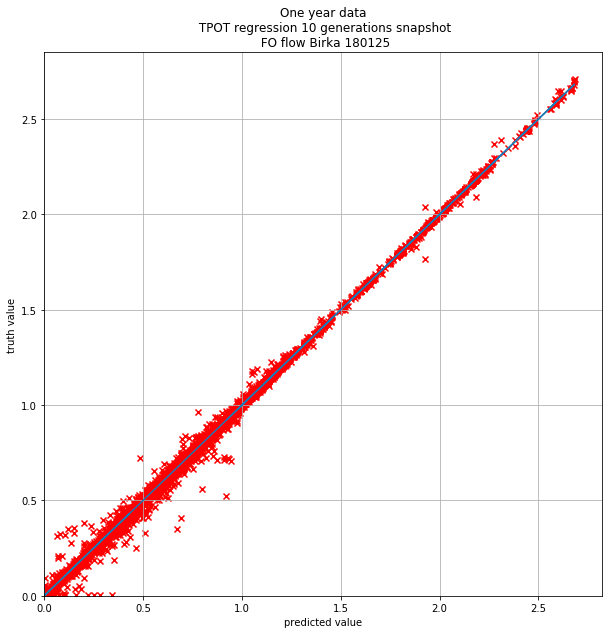

In [45]:


fig, ax = plt.subplots()

fig.set_size_inches(10, 10)

plt.scatter(tpot.predict(X),y,color='r',marker='x')
plt.plot(tpot.predict(X),tpot.predict(X))

#plt.scatter(n1,n1+sample_n)

ax.set(xlabel='predicted value', ylabel='truth value',
       title='One year data\n TPOT regression 10 generations snapshot\n FO flow Birka 180125')
ax.grid()

#plt.legend()
plt.xlim(0)
plt.ylim(0)

fig.savefig("tpot_eng13_all_scatter_rpm_exh_t_frp_pred_10gen.png",dpi=300)
plt.show()

In [47]:
tpot.export('gen10_eng13_180125.py')

True

In [65]:
tpot.score(X_test,y_test)

-0.00043115201403833437

In [66]:
print('MSE in % ', abs(tpot.score(X_test,y_test)/max(y)*100))

MSE in %  0.0159167150182


In [67]:
from sklearn.metrics import mean_squared_error
mean_squared_error(tpot.predict(X_test),y_test)

0.00043115201403833437

In [ ]:

for n in list(df_1_3):
    df_1_3[n][(df_1_3[n] < 0)] = 0

for n in list(df_2_4):
    df_2_4[n][(df_2_4[n] < 0)] = 0
    
df_1_3[labels_1_3].plot()
df_2_4[labels_2_4].plot()